# Titanic: Machine Learning from Disaster - Kaggle Copetitions
[<img height="5" width="800" src=http://www.loc.gov/teachers/classroommaterials/lessons/titanic/images/section_header.jpg>](https://chroniclingamerica.loc.gov/lccn/sn83030214/1912-04-16/ed-1/seq-1/)

__Introduction__:

Kaggle challenges us to learn data analysis and machine learning from the data the [Titanic shipwreck](https://youtu.be/zKoLEfgn4LI), and try predict survival and get familiar with ML basics.

So, this material is intended to cover most of the techniques of data analysis and ML in Python, than to properly compete in Kaggle. That is why it following the natural flow of ML and contains many texts and links regarding the techniques, made your conference and references easy. as it can be extended over time.

In this way the material can be used for consultation and apply the methods to other similar classification cases, but for its application in the competition, or even to a real case, it will be necessary to make some choices and changes.

__Competition Description__:

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, [Kaggle](https://www.kaggle.com/c/titanic) ask you to complete the analysis of what sorts of people were likely to survive. In particular, they ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

[<img src=https://www.tricurioso.com/wp-content/uploads/2018/06/historia-real-amor-titanic-tricurioso-1-655x400.jpg>](https://www.youtube.com/watch?v=05o7sOAjtXE)

## 1. Preparing environment and uploading data
You can dowload the data from my github repository or sig in/up on Kaggle [here](https://www.kaggle.com/c/3136/download-all).

### 1.1. Import Packages

In [1]:
import os
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

import numpy as np
import pandas as pd
import pylab 
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import ListedColormap
%matplotlib inline
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D

#from sklearn.feature_extraction import FeatureHasher
from scipy.stats import skew, norm, probplot, boxcox
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.special import boxcox1p
from sklearn.feature_selection import f_classif, chi2, SelectKBest, SelectFromModel
from boruta import BorutaPy
from rfpimp import *

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
import model_evaluation_utils as meu
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.ensemble import VotingClassifier
from sklearn.base import BaseEstimator, TransformerMixin, clone, ClassifierMixin
from itertools import combinations

### 1.2. Load Datastes
I start with load the datasets with pandas, and concatenade them.

In [2]:
train = pd.read_csv('train.csv') 

test = pd.read_csv('test.csv') 
Test_ID = test.PassengerId
test.insert(loc=1, column='Survived', value=-1)

data = pd.concat([train, test], ignore_index=True)

## 2. Exploratory Data Analysis (EDA) & Feature Engeniring
### 2.1. Take a First Look of our Data:
I created the function below to simplify the analysis of general characteristics of the data. Inspired on the str function of R, this function returns the types, counts, distinct, count nulls, missing ratio and uniques values of each field/feature.

If the study involve some supervised learning, this function can return the study of the correlation, for this we just need provide the independent variable to the pred parameter.

Also, if your return is stored in a variable you can evaluate it in more detail, specific of a field, or sort them from different perspectives

In [3]:
def rstr(df, pred=None): 
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: [x.unique()])
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_ration = (df.isnull().sum()/ obs) * 100
    skewness = df.skew()
    kurtosis = df.kurt() 
    print('Data shape:', df.shape)
    
    if pred is None:
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration', 'uniques', 'skewness', 'kurtosis']
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis], axis = 1)

    else:
        corr = df.corr()[pred]
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis, corr], axis = 1, sort=False)
        corr_col = 'corr '  + pred
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing_ration', 'uniques', 'skewness', 'kurtosis', corr_col ]
    
    str.columns = cols
    dtypes = str.types.value_counts()
    print('___________________________\nData types:\n',str.types.value_counts())
    print('___________________________')
    return str

In [4]:
details = rstr(data.loc[: ,'Survived' : 'Embarked'], 'Survived')
details.sort_values(by='corr Survived', ascending=False)

Data shape: (1309, 11)
___________________________
Data types:
 object     5
int64      4
float64    2
Name: types, dtype: int64
___________________________


,types,counts,distincts,nulls,missing_ration,uniques,skewness,kurtosis,corr Survived
Survived,int64,1309,3,0,0.000000,"[[0, 1, -1]]",0.097425,-1.263022,1.000000
Fare,float64,1308,282,1,0.076394,"[[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51...",4.367709,27.027986,0.081545
Parch,int64,1309,8,0,0.000000,"[[0, 1, 2, 5, 3, 4, 6, 9]]",3.669078,21.541079,0.028196
SibSp,int64,1309,7,0,0.000000,"[[1, 0, 3, 4, 2, 5, 8]]",3.844220,20.043251,0.012470
Age,float64,1046,99,263,20.091673,"[[22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0...",0.407675,0.146948,-0.049620
Pclass,int64,1309,3,0,0.000000,"[[3, 1, 2]]",-0.598647,-1.315079,-0.126769
Name,object,1309,1307,0,0.000000,"[[Braund, Mr. Owen Harris, Cumings, Mrs. John ...",NaN,NaN,NaN
Sex,object,1309,2,0,0.000000,"[[male, female]]",NaN,NaN,NaN
Ticket,object,1309,929,0,0.000000,"[[A/5 21171, PC 17599, STON/O2. 3101282, 11380...",NaN,NaN,NaN
Cabin,object,295,187,1014,77.463713,"[[nan, C85, C123, E46, G6, C103, D56, A6, C23 ...",NaN,NaN,NaN


__Data Dictionary__
- Survived: 0 = No, 1 = Yes. I use -1 to can separate test data from training data.
- Fare:     The passenger fare
- Parch:	# of parents / children aboard the Titanic  		
- SibSp:	# of siblings / spouses aboard the Titanic
- Age:      Age in years
- Pclass: 	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd  	
- Name:     Name of the passenger
- Sex:      Sex of the passenger male and female
- Ticket:	Ticket number
- Cabin:	Cabin number	
- Embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  

__The points of attention we have here are:__ 
- **Fare**: Kaggle affirm that is the passenger fare, but with some data inspection in group of Tickets we discover that is the total amount fare paid for a ticket, and the existence of tickets for a group of passengers.
- **Parch**: The dataset defines family relations in this way...
    - Parent = mother, father
    - Child = daughter, son, stepdaughter, stepson
    - Some children travelled only with a nanny, therefore parch=0 for them.
- **SibSP**: The dataset defines family relations in this way...
    - Sibling = brother, sister, stepbrother, stepsister
    - Spouse = husband, wife (mistresses and fiancés were ignored)
- **Age**: Have 20% of nulls, so we have to find a more efficient way of filling them out with just a single value, like the median for example.
- **Name**: is a categorical data with a high distincts values as expect. The first reaction is drop this column, but we can use it to training differents data engineering techniques, to see if we can get some valuable data. Besides that, notice that has two pairs of passengers with the same name?  
- **Ticket** Other categorical data, but in this case it have only 71% of distinct values and don't have nulls. So, it is possible that some passenger voyage in groups and use the same ticket. Beyond that, we can check to if we can extract other interesting thought form it.
- **Cabin**: the high number of disticnt values (187) and nulls (77.5%). 
     This is a categorical data of which I use to train different techniques to extract some information of value and null input, but with given the high rate of null the recommended would be to simplify the filling or even to exclude this attribute.



### 2.2. First see of some stats of Numeric Data
So, for the main statistics of our numeric data describe the function (like the summary of R)

In [5]:
print('Data is not balanced! Has {:2.2%} survives'.format(train.Survived.describe()[1]))
display(data.loc[: ,'Pclass' : 'Embarked'].describe().transpose())
print('Survived: [1] Survived; [0] Died; [-1] Test Data set:\n',data.Survived.value_counts())

Data is not balanced! Has 38.38% survives


,count,mean,std,min,25%,50%,75%,max
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


Survived: [1] Survived; [0] Died; [-1] Test Data set:
  0    549
-1    418
 1    342
Name: Survived, dtype: int64


### 2.3 EDA and Feature Enginiring by Feature
#### 2.3.1 Standard Data Visualization for Discret or Bining Data

In [6]:
def charts(feature, df):
    print('\n           ____________________________ Plots of', feature, 'per Survived and Dead: ____________________________')
    # Pie of all Data
    fig = plt.figure(figsize=(20,5))
    f1 = fig.add_subplot(131)
    cnt = df[feature].value_counts()
    g = plt.pie(cnt, labels=cnt.index, autopct='%1.1f%%', shadow=True, startangle=90)
    
    # Count Plot By Survived and Dead
    f = fig.add_subplot(132)
    g = sns.countplot(x=feature, hue='Survived', hue_order=[1,0], data=df, ax=f)

    # Percent stacked Plot
    survived = df[df['Survived']==1][feature].value_counts()
    dead = df[df['Survived']==0][feature].value_counts()
    df2 = pd.DataFrame([survived,dead])
    df2.index = ['Survived','Dead']
    df2 = df2.T
    df2 = df2.fillna(0)
    df2['Total'] = df2.Survived + df2.Dead
    df2.Survived = df2.Survived/df2.Total
    df2.Dead = df2.Dead/df2.Total
    df2.drop(['Total'], axis=1, inplace=True)
    f = fig.add_subplot(133)
    df2.plot(kind='bar', stacked=True, ax=f)
    del df2, g, f, cnt, dead, fig

#### 2.3.2. Tikect
<img align='right' width='300' src=https://cdn-03.belfasttelegraph.co.uk/news/northern-ireland/article36800435.ece/7f250/AUTOCROP/w620h342/bpanews_3761aca3-0819-42ed-8f9d-6698d826d0ff_1>

Since Ticket is a transaction and categorical data, the first insight is drop  this feature, but we may note that it has some hidden value information. At first look, safe few cases, we could affirms that:
 - families and group of persons that traveled together bought the same ticket.
 - People with alphanumerics Tickets has some special treatment (crew family, employees, VIP, free tickets, etc.) 
 
So, we start by a new feature creation to quantify the number of passengers by ticket, and associente this quantide to each passenger with the same ticket.


           ____________________________ Plots of qtd_same_ticket per Survived and Dead: ____________________________


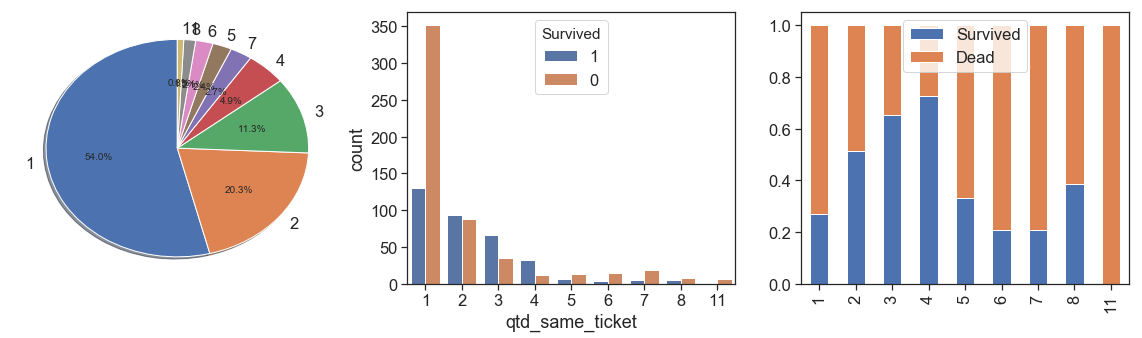

In [7]:
same_ticket = data.Ticket.value_counts()
data['qtd_same_ticket'] = data.Ticket.apply(lambda x: same_ticket[x])
del same_ticket
charts('qtd_same_ticket', data[data.Survived>=0])

As we can see above:
 - the majority (54%) bought only one ticket per passenger, and have lower survival rate than passengers that bought tickets for 2, 3, 4, 5 and 8 people.
 - the survival rate is growing between 1 and 4, dropped a lot at 5. From the bar chart we can see that after 5 the number of samples is too low (84 out of 891, 9.4%, 1/4 of this is 5), and this data is skewed with a long tail to right. We can reduce this tail by bining all data after 4 in the same ordinal, its better to prevent overfitig, but we lose some others interesting case, see the next bollet. As alternative we can apply a boxcoxP1 at this mesure.
 - The case of 11 people with same tikect probably is a huge family that all samples on the training data died. Let's ckek this below.

In [8]:
data[(data.qtd_same_ticket==11)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,qtd_same_ticket
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,11
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,11
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,11
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,11
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,11
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,11
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,11
1079,1080,-1,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S,11
1233,1234,-1,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S,11
1251,1252,-1,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S,11


We confirm our hypothesis, and we notice that Fare is not the price of each passenger, but the price of each ticket, its total amount. Since our data is per passenger, this information has some distortion, becouse only one passenger that bought a ticket alone of 69.55 pounds is different from 11 passenger that bought a special tiket, with discount for group, by 6.32 pounds per passenger. It sugest to create a new feature that represents the real fare by passenger.

Back to the quantity of persons with same ticket, if we keep this and the model can capture this pattern, you'll probably predict that the respective test samples also died! However, even if true, can be a sign of overfiting, because we only have 1.2% of these cases in the training samples.

In order to increase representativeness and lose the minimum of information, since we have only 44 (4.9%) training samples that bought tickets for 4 people and 101 (11.3%) of 3, we binning the quantity of 3 and 4 together as 3 (16,3%, ouver than 5 as 5 (84 samples). Let's see the results below.


           ____________________________ Plots of qtd_same_ticket_bin per Survived and Dead: ____________________________


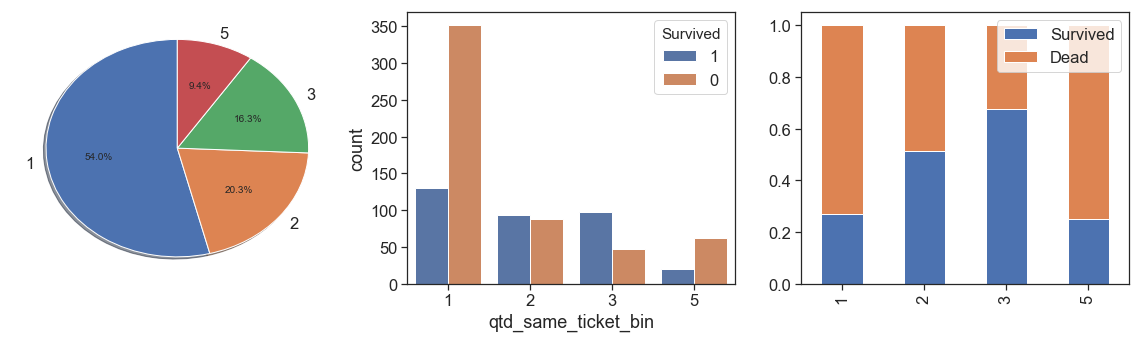

In [9]:
data['qtd_same_ticket_bin'] = data.qtd_same_ticket.apply(lambda x: 3 if (x>2 and x<5) else (5 if x>4 else x))
charts('qtd_same_ticket_bin', data[data.Survived>=0])

Other option, is create a binary feature that indicates if the passenger use a same ticket or not (not share his ticket)

Percent. survived from unique ticket: 27.03%
Percent. survived from same tickets: 51.71%

           ____________________________ Plots of same_tckt per Survived and Dead: ____________________________


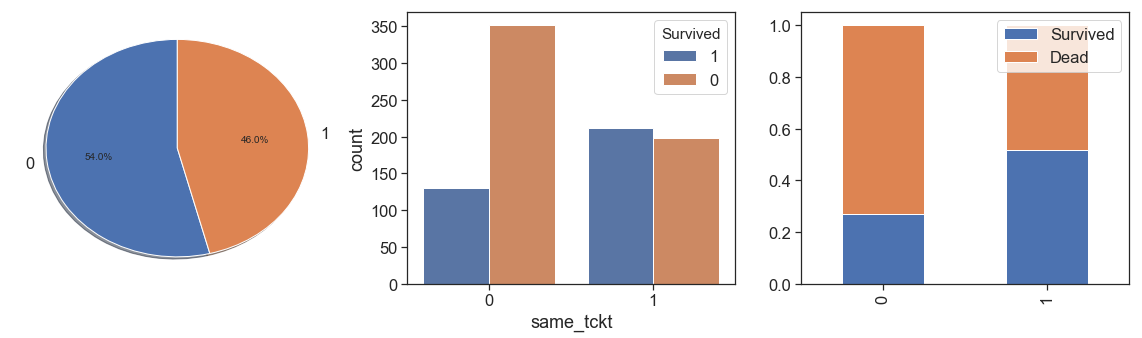

In [10]:
print('Percent. survived from unique ticket: {:3.2%}'.\
      format(data.Survived[(data.qtd_same_ticket==1) & (data.Survived>=0)].sum()/
             data.Survived[(data.qtd_same_ticket==1) & (data.Survived>=0)].count()))
print('Percent. survived from same tickets: {:3.2%}'.\
      format(data.Survived[(data.qtd_same_ticket>1) & (data.Survived>=0)].sum()/
             data.Survived[(data.qtd_same_ticket>1) & (data.Survived>=0)].count()))

data['same_tckt'] = data.qtd_same_ticket.apply(lambda x: 1 if (x> 1) else 0)
charts('same_tckt', data[data.Survived>=0])

In this case we lose information that the chances of survival increase from 1 to 4, and fall from 5. In addition, cases 1 and 0 of the two measures are exactly the same. Then we will not use this option, and go work on Fare.

Finnaly, we have one more information to extract directly from Ticket, and check the possible special treatment!

In [11]:
data.Ticket.str.findall('[A-z]').apply(lambda x: ''.join(map(str, x))).value_counts().head(7)

           957
PC          92
CA          68
A           39
SOTONOQ     24
STONO       21
WC          15
Name: Ticket, dtype: int64


           ____________________________ Plots of distinction_in_tikect per Survived and Dead: ____________________________


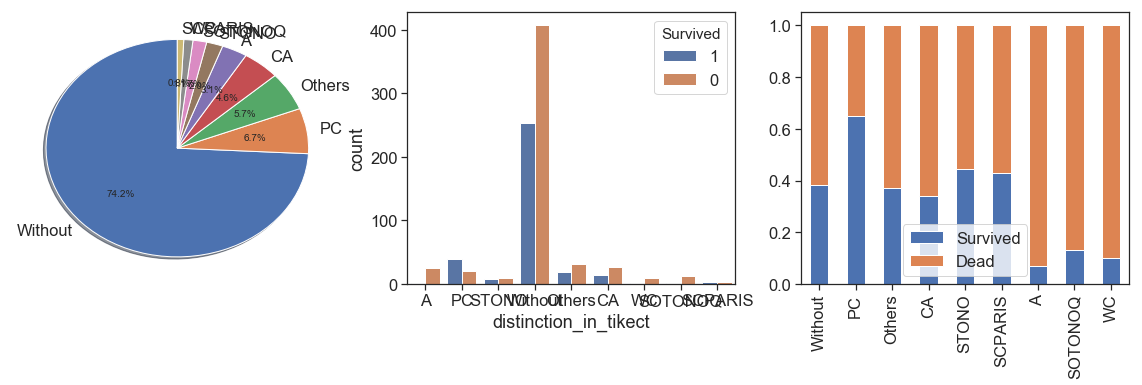

In [12]:
data['distinction_in_tikect'] =\
   (data.Ticket.str.findall('[A-z]').apply(lambda x: ''.join(map(str, x)).strip('[]')))

data.distinction_in_tikect = data.distinction_in_tikect.\
  apply(lambda y: 'Without' if y=='' else y if (y in ['PC', 'CA', 'A', 'SOTONOQ', 'STONO', 'WC', 'SCPARIS']) else 'Others')

charts('distinction_in_tikect', data[(data.Survived>=0)])

By the results, passengers with PC distinction in their tickets had best survival rate. Without, Others and CA is preat equal and can be grouped in one category and the we can do the same between STONO and SCAPARIS, and between A, SOTONOQ and WC.


           ____________________________ Plots of distinction_in_tikect per Survived and Dead: ____________________________


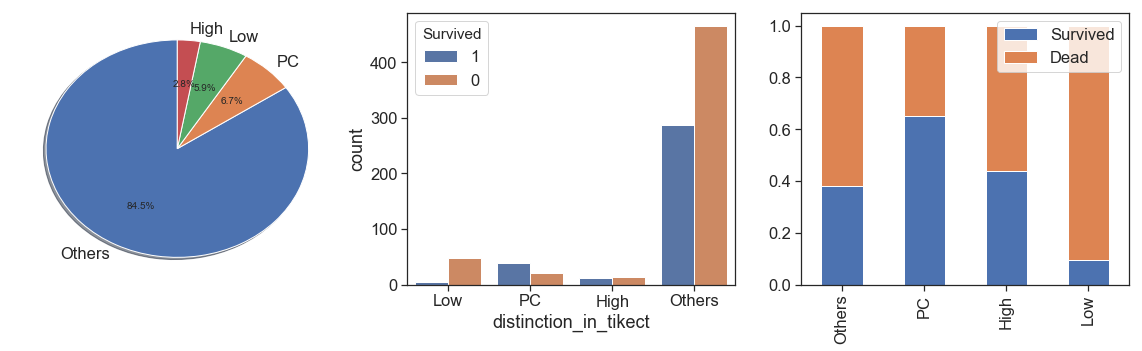

In [13]:
data.distinction_in_tikect = data.distinction_in_tikect.\
  apply(lambda y: 'Others' if (y in ['Without', 'Others', 'CA']) else\
        'Low' if (y in ['A', 'SOTONOQ', 'WC']) else\
        'High' if (y in ['STONO', 'SCPARIS']) else y)

charts('distinction_in_tikect', data[(data.Survived>=0)])

#### 2.3.3. Fare
First, we treat the unique null fare case, then we take a look of the distribution of Fare (remember that is the total amount Fare of the Ticket).

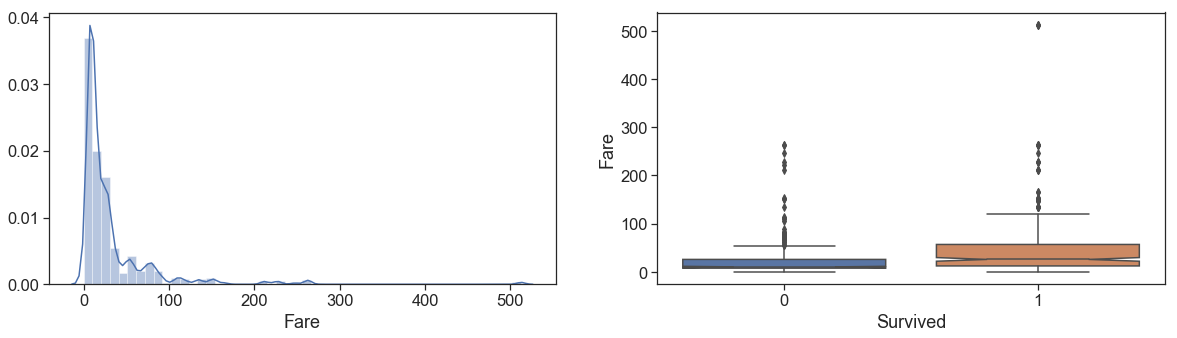

In [14]:
# Fill null with median of most likely type passenger
data.loc[data.Fare.isnull(), 'Fare'] = data.Fare[(data.Pclass==3) & (data.qtd_same_ticket==1) & (data.Age>60)].median()

fig = plt.figure(figsize=(20,5))
f = fig.add_subplot(121)
g = sns.distplot(data[(data.Survived>=0)].Fare)
f = fig.add_subplot(122)
g = sns.boxplot(y='Fare', x='Survived', data=data[data.Survived>=0], notch = True)

Let's take a look at how the fare per passenger is and how much it differs from the total

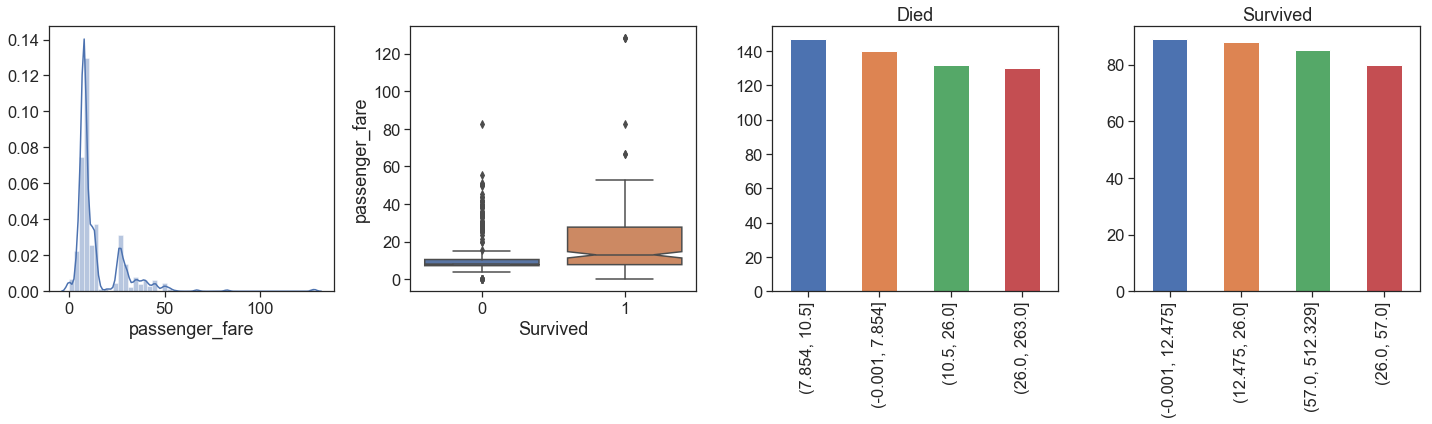

In [15]:
data['passenger_fare'] = data.Fare / data.qtd_same_ticket

fig = plt.figure(figsize=(20,6))
a = fig.add_subplot(141)
g = sns.distplot(data[(data.Survived>=0)].passenger_fare)
a = fig.add_subplot(142)
g = sns.boxplot(y='passenger_fare', x='Survived', data=data[data.Survived>=0], notch = True)
a = fig.add_subplot(143)
g = pd.qcut(data.Fare[(data.Survived==0)], q=[.0, .25, .50, .75, 1.00]).value_counts().plot(kind='bar', ax=a, title='Died')
a = fig.add_subplot(144)
g = pd.qcut(data.Fare[(data.Survived>0)], q=[.0, .25, .50, .75, 1.00]).value_counts().plot(kind='bar', ax=a, title='Survived')
plt.tight_layout(); plt.show()

<img align='right' width='500' src=https://i2.wp.com/www.hoaxorfact.com/wp-content/uploads/2015/06/Titanic-Ticket.jpg>
From the comparison, we can see that:
 - the distributions are not exactly the same, with two spouts slightly apart on passager fare.
 - Class and how much paid per passager make differences!<p>
   Although the number of survivors among the quartiles is approximately the same as expected, when we look at passenger fares, it is more apparent that the mortality rate is higher in the lower Fares, since the top of Q4 died is at the same height as the median plus a confidence interval of the fare paid by survivors. 
 - the number of outliers is lower in the fare per passenger, especially among survivors.<p>
   We can not rule out these outliers if there are cases of the same type in the test data set. In addition, these differences in values may be due to probably first class with additional fees for certain exclusives and cargo. 

Below, you can see that the largest outlier all survival in the train data set, and has one case (1235 Passenger Id, 
the matriarch of one son and two companions) to predict. Among all outlier cases of survivors, we see that all cases are first class, and different from the largets outlier, 27% actually died, and we have 18 cases to predict.

In [16]:
print('Passengers with higets passenger fare:')
display(data[data.passenger_fare>120])
print('\nSurivived of passenger fare more than 50:\n',
    pd.pivot_table(data.loc[data.passenger_fare>50, ['Pclass', 'Survived']], aggfunc=np.count_nonzero, 
                       columns=['Survived'] , index=['Pclass']))

Passengers with higets passenger fare:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,qtd_same_ticket,qtd_same_ticket_bin,same_tckt,distinction_in_tikect,passenger_fare
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,4,3,1,PC,128.0823
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,4,3,1,PC,128.0823
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,4,3,1,PC,128.0823
1234,1235,-1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,4,3,1,PC,128.0823



Surivived of passenger fare more than 50:
 Survived  -1   0   1
Pclass              
1         18   4  22


Note that if we leave this way, if the model succeeds in capturing this pattern of largest outlier we are again thinking of a model that is at risk of ouverfiting (0.03% of cases).

#### 2.3.4. Pclass
<img align='left' width='500' src=https://www.encyclopedia-titanica.org/files/1/figure-one-side-view.gif>

Notwithstanding the fact that class 3 presents greater magnitude, as we see with Fare by passenger, we notice that survival rate is greater with greater fare by passenger. Its make to think that has some social economic discriminal. It is confirmed when we saw the data distribution over the classes, and see the percent bar has a clearer aggressive decreasing survival rate through the first to the third classes.


           ____________________________ Plots of Pclass per Survived and Dead: ____________________________


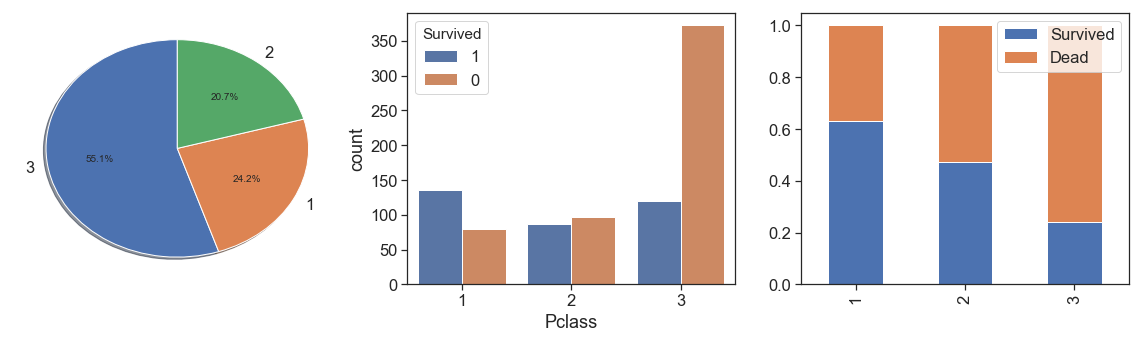

In [17]:
charts('Pclass', data[(data.Survived>=0)])

#### 2.3.5. SibSp 
<img src=https://www.encyclopedia-titanica.org/files/titanic_relatives/images/titanic-xl.jpg>


           ____________________________ Plots of SibSp per Survived and Dead: ____________________________


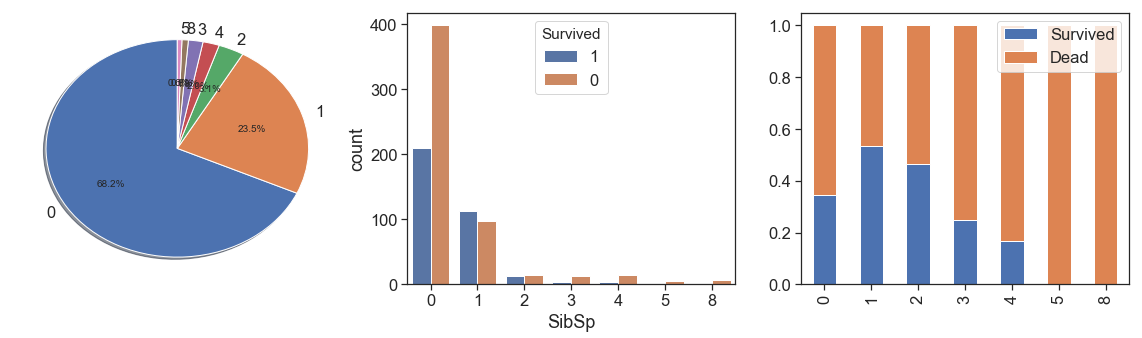

In [18]:
charts('SibSp', data[(data.Survived>=0)])

Since more than 2 siblings has too few cases and lowest survival rate, we can aggreagate all this case into unique bin in order to increase representativeness and lose the minimum of information.


           ____________________________ Plots of SibSp_bin per Survived and Dead: ____________________________


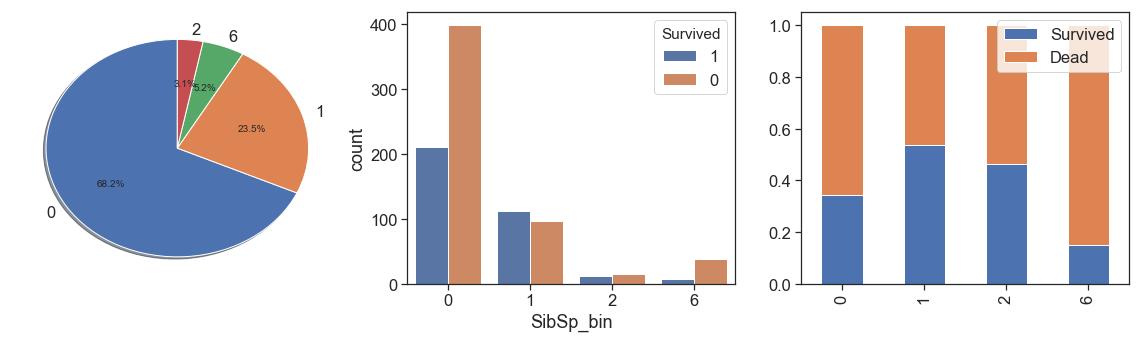

In [19]:
data['SibSp_bin'] = data.SibSp.apply(lambda x: 6 if x > 2 else x)
charts('SibSp_bin', data[(data.Survived>=0)])

#### 2.3.6. Parch
<img src=http://2.bp.blogspot.com/-X2iJcXp0bUY/U6yg71B6wjI/AAAAAAAAAYc/npacw-Zm_c8/s1600/titanic+anderssons.jpg>


           ____________________________ Plots of Parch per Survived and Dead: ____________________________


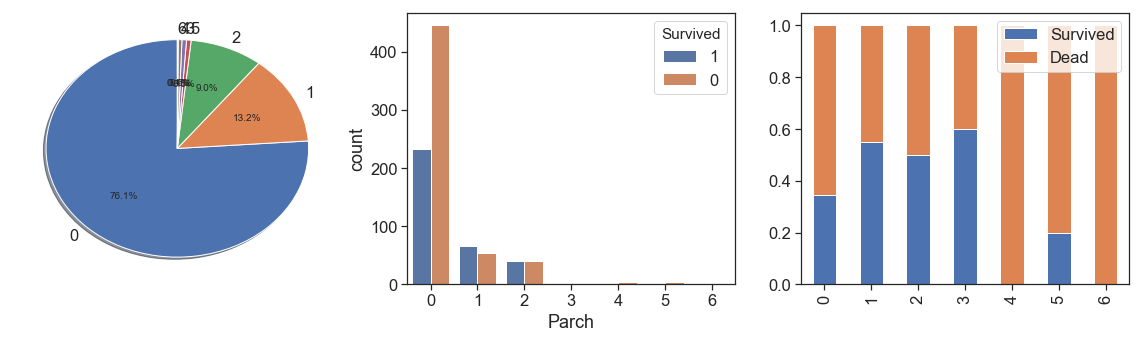

In [20]:
charts('Parch', data[data.Survived>=0])

As we did with siblings, we will aggregate the Parchs cases with more than 3, even with the highest survival rate with 3 Parchs.


           ____________________________ Plots of Parch_bin per Survived and Dead: ____________________________


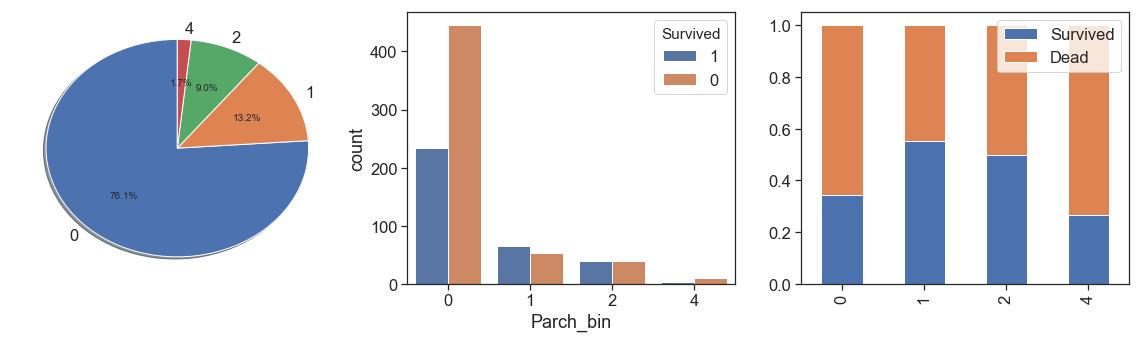

In [21]:
data['Parch_bin'] = data.Parch.apply(lambda x: x if x< 3 else 4)
charts('Parch_bin', data[(data.Survived>=0)])

#### 2.3.7.  Sex
As everybody knows, in that case women has more significant survival rate than men.


           ____________________________ Plots of Sex per Survived and Dead: ____________________________


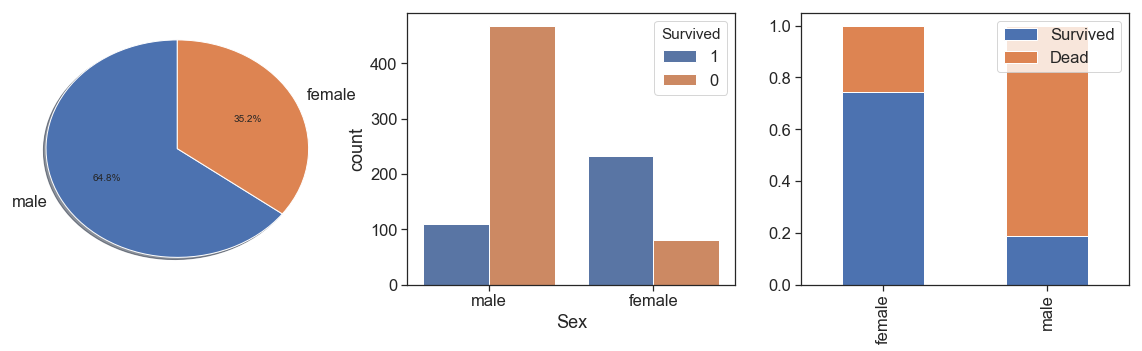

In [22]:
charts('Sex', data[(data.Survived>=0)])

#### 2.3.8. Embarked
<img  align='left' width="350" src=http://www.paullee.com/titanic/jf2012goof_pics/pt1vlcsnap-00007.jpg>

First, we check the 2 embarked null cases to find the most likely pattern to considerate to fill with the respective mode.

 In sequence, we take a look at the Embarked data.  As we can see, the passengers that embarked from Cherbourg had best survival rates and most of the passengers embarked from Southampton and had the worst survival rate.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,qtd_same_ticket,qtd_same_ticket_bin,same_tckt,distinction_in_tikect,passenger_fare,SibSp_bin,Parch_bin
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,2,2,1,Others,40.0,0,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,2,2,1,Others,40.0,0,0



           ____________________________ Plots of Embarked per Survived and Dead: ____________________________


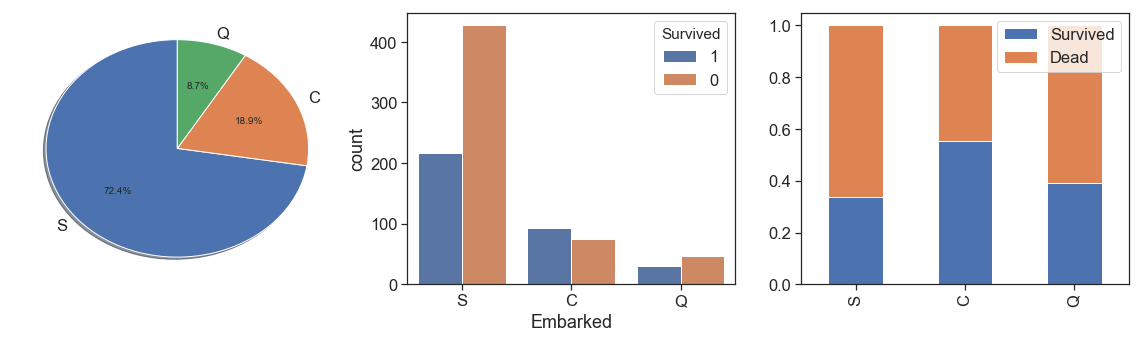

In [23]:
display(data[data.Embarked.isnull()])
data.loc[data.Embarked=='NA', 'Embarked'] = data[(data.Cabin.str.match('B2')>0) & (data.Pclass==1)].Embarked.mode()[0]
charts('Embarked', data[(data.Survived>=0)])

#### 2.3.9. Name
<img height="5" width="800" src=http://www.titanic.ie/images/banner-img1.jpg>
Name feature has too much variance and is not significant, but has some value information to extracts and checks, like:

- Personal Titles
- Existence of nicknames
- Existence of references to another person
- Family names

Personal_Titles,Kid,Miss,Mr,Mrs,Royalty,Technical
Survived,,,,,,
-1,42.0,156.0,480.0,148.0,NaN,10.0
0,17.0,55.0,436.0,26.0,2.0,13.0
1,46.0,258.0,162.0,202.0,6.0,10.0



           ____________________________ Plots of Personal_Titles per Survived and Dead: ____________________________


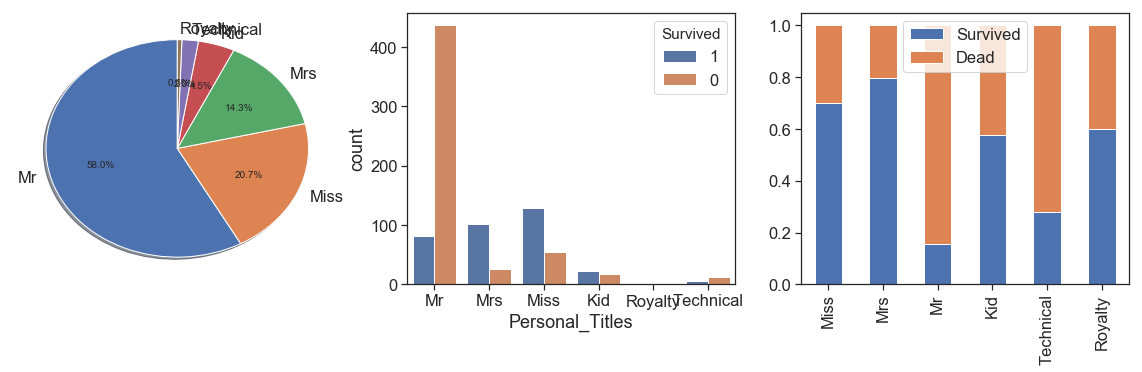

In [24]:
def Personal_Titles(df):
    df['Personal_Titles'] = df.Name.str.findall('Mrs\.|Mr\.|Miss\.|Maste[r]|Dr\.|Lady\.|Countess\.|'
                                                +'Sir\.|Rev\.|Don\.|Major\.|Col\.|Jonkheer\.|'
                                                + 'Capt\.|Ms\.|Mme\.|Mlle\.').apply(lambda x: ''.join(map(str, x)).strip('[]'))

    df.Personal_Titles[df.Personal_Titles=='Mrs.'] = 'Mrs'
    df.Personal_Titles[df.Personal_Titles=='Mr.'] = 'Mr'
    df.Personal_Titles[df.Personal_Titles=='Miss.'] = 'Miss'
    df.Personal_Titles[df.Personal_Titles==''] = df[df.Personal_Titles==''].Sex.apply(lambda x: 'Mr' if (x=='male') else 'Mrs')
    df.Personal_Titles[df.Personal_Titles=='Mme.'] = 'Mrs' 
    df.Personal_Titles[df.Personal_Titles=='Ms.'] = 'Mrs'
    df.Personal_Titles[df.Personal_Titles=='Lady.'] = 'Royalty'
    df.Personal_Titles[df.Personal_Titles=='Mlle.'] = 'Miss'
    df.Personal_Titles[(df.Personal_Titles=='Miss.') & (df.Age>-1) & (df.Age<15)] = 'Kid' 
    df.Personal_Titles[df.Personal_Titles=='Master'] = 'Kid'
    df.Personal_Titles[df.Personal_Titles=='Don.'] = 'Royalty'
    df.Personal_Titles[df.Personal_Titles=='Jonkheer.'] = 'Royalty'
    df.Personal_Titles[df.Personal_Titles=='Capt.'] = 'Technical'
    df.Personal_Titles[df.Personal_Titles=='Rev.'] = 'Technical'
    df.Personal_Titles[df.Personal_Titles=='Sir.'] = 'Royalty'
    df.Personal_Titles[df.Personal_Titles=='Countess.'] = 'Royalty'
    df.Personal_Titles[df.Personal_Titles=='Major.'] = 'Technical'
    df.Personal_Titles[df.Personal_Titles=='Col.'] = 'Technical'
    df.Personal_Titles[df.Personal_Titles=='Dr.'] = 'Technical'

Personal_Titles(data)
display(pd.pivot_table(data[['Personal_Titles', 'Survived']], aggfunc=np.count_nonzero, 
                       columns=['Survived'] , index=['Personal_Titles']).T)

charts('Personal_Titles', data[(data.Survived>=0)])

As you can see above, I opted to add some titles, but at first keep 2 small sets (Technical and Royalty), Because there are interesting survival rate variations. 

Next, we identify the names with mentions to other people or with nicknames and create a boolean feature.


           ____________________________ Plots of distinction_in_name per Survived and Dead: ____________________________


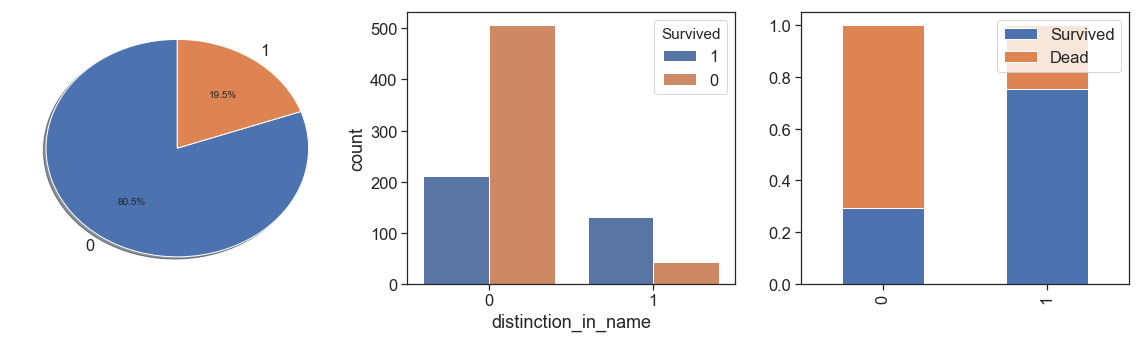

In [25]:
data['distinction_in_name'] =\
   ((data.Name.str.findall('\(').apply(lambda x: ''.join(map(str, x)).strip('[]'))=='(')
    | (data.Name.str.findall(r'"[A-z"]*"').apply(lambda x: ''.join(map(str, x)).strip('""'))!=''))

data.distinction_in_name = data.distinction_in_name.apply(lambda x: 1 if x else 0)

charts('distinction_in_name', data[(data.Survived>=0)])

It is interesting to note that those who have some type of reference or distinction in their names had a higher survival rate.

Next, we find 872 family surnames in this dataset. Even adding loners in a single category, we have 229 with more than one member. It's a hauge categoriacal data to work, and it is to much sparse. The most of then has too few samples to really has significates to allmost of algoritimes, whiout risk to occours overfiting. In addition, there are 18 surnames cases with more than one member exclusively in the test data set.

So, we create this feature with aggregation of unique member into one category and use this at models that could work on it to ckeck if we get better results. Alternatively, we can use dimensionality reduction methods.

In [26]:
print('Total of differents surnames aboard:',
      ((data.Name.str.findall(r'[A-z]*\,').apply(lambda x: ''.join(map(str, x)).strip(','))).value_counts()>1).shape[0])
print('More then one persons aboard with smae surnames:',
      ((data.Name.str.findall(r'[A-z]*\,').apply(lambda x: ''.join(map(str, x)).strip(','))).value_counts()>1).sum())

surnames = (data.Name.str.findall(r'[A-z]*\,').apply(lambda x: ''.join(map(str, x)).strip(','))).value_counts()

data['surname'] = (data.Name.str.findall(r'[A-z]*\,').\
 apply(lambda x: ''.join(map(str, x)).strip(','))).apply(lambda x: x if surnames.get_value(x)>1 else 'Alone')

test_surnames = set(data.surname[data.Survived>=0].unique().tolist())
print('Surnames with more than one member aboard that happens only in the test data set:', 
      240-len(test_surnames))

train_surnames = set(data.surname[data.Survived<0].unique().tolist())
print('Surnames with more than one member aboard that happens only in the train data set:', 
      240-len(train_surnames))

both_surnames = test_surnames.intersection(train_surnames)

data.surname = data.surname.apply(lambda x : x if test_surnames.issuperset(set([x])) else 'Exclude')

del surnames, both_surnames, test_surnames, train_surnames

Total of differents surnames aboard: 872
More then one persons aboard with smae surnames: 239
Surnames with more than one member aboard that happens only in the test data set: 18
Surnames with more than one member aboard that happens only in the train data set: 76


#### 2.3.10. Cabin
This information has to many nulls, but when it exist we can know what is the [deck](https://www.encyclopedia-titanica.org/titanic-deckplans/) of the passenger, and some distinguish passengers from the same class.
<img height="5" width="800" src=http://www.paullee.com/titanic/flood_pics/Titanic_side_d_deck.PNG>
Let's start applying the same cabin to null cases where there are samples with cabins for the same ticket.

In [27]:
CabinByTicket = data.loc[~data.Cabin.isnull(), ['Ticket', 'Cabin']].groupby(by='Ticket').agg(min)
before = data.Cabin.isnull().sum()
data.loc[data.Cabin.isnull(), 'Cabin'] = data.loc[data.Cabin.isnull(), 'Ticket'].\
   apply(lambda x: CabinByTicket[CabinByTicket.index==x].min())
print('Cabin nulls reduced:', (before - data.Cabin.isnull().sum()))
del CabinByTicket, before

Cabin nulls reduced: 16


In [28]:
data.Cabin[data.Cabin.isnull()] = 'N999'
data['Cabin_Letter'] = data.Cabin.str.findall('[^a-z]\d\d*')
data['Cabin_Number'] = data.apply(lambda x: 0 if len(str(x.Cabin))== 1 else np.int(np.int(x.Cabin_Letter[0][1:])/10), axis=1)
data.Cabin_Letter = data.apply(lambda x: x.Cabin if len(str(x.Cabin))== 1 else x.Cabin_Letter[0][0], axis=1)

display(data[['Fare', 'Cabin_Letter']].groupby(['Cabin_Letter']).agg([np.median, np.mean, np.count_nonzero, np.max, np.min]))

Fare                                             
                median        mean count_nonzero      amax     amin
Cabin_Letter                                                       
A             35.07710   41.244314          21.0   81.8583   0.0000
B             84.38335  131.484438          65.0  512.3292   0.0000
C             90.00000  112.161300         104.0  263.0000  25.7000
D             52.55420   53.007339          46.0  113.2750  12.8750
E             51.86250   49.557091          47.0  134.5000   7.2292
F             19.50000   22.303571          14.0   39.0000   7.7500
G             10.46250   11.291667           9.0   16.7000   7.6500
N             10.50000   16.861973         985.0  133.6500   0.0000
T             35.50000   35.500000           1.0   35.5000  35.5000

Does't exist Cabin T in test dataset. This passenger is from first class and his passenger fare is the same from others 5 first class passengers. So, changed to 'C' to made same distribution between the six.

In [29]:
display(data[data.Cabin=='T'])

display(data.Cabin_Letter[data.passenger_fare==35.5].value_counts())

data.Cabin_Letter[data.Cabin_Letter=='T'] = 'C'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,same_tckt,distinction_in_tikect,passenger_fare,SibSp_bin,Parch_bin,Personal_Titles,distinction_in_name,surname,Cabin_Letter,Cabin_Number
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,...,0,Others,35.5,0,0,Mr,0,Alone,T,0


A    2
B    2
C    1
T    1
Name: Cabin_Letter, dtype: int64

Fill Cabins letters NAs of third class with most common patterns of the same passenger fare range with one or lessen possible cases.

In [30]:
data.loc[(data.passenger_fare<6.237) & (data.passenger_fare>=0.0) & (data.Pclass==3) & (data.Cabin=='N999'), 'Cabin_Letter'] =\
  data[(data.passenger_fare<6.237) & (data.passenger_fare>=0.0) & (data.Pclass==3) & (data.Cabin!='N999')].Cabin_Letter.mode()[0]
data.loc[(data.passenger_fare<6.237) & (data.passenger_fare>=0.0) & (data.Pclass==3) & (data.Cabin=='N999'), 'Cabin_Number'] =\
  data[(data.passenger_fare<6.237) & (data.passenger_fare>=0.0) & (data.Pclass==3) & (data.Cabin!='N999')].Cabin_Number.mode()[0]

data.loc[(data.passenger_fare<7.225) & (data.passenger_fare>=6.237) & (data.Pclass==3) & (data.Cabin=='N999'), 'Cabin_Letter'] =\
  data[(data.passenger_fare<7.225) & (data.passenger_fare>=6.237) & (data.Pclass==3) & (data.Cabin!='N999')].Cabin_Letter.mode()[0]
data.loc[(data.passenger_fare<7.225) & (data.passenger_fare>=6.237) & (data.Pclass==3) & (data.Cabin=='N999'), 'Cabin_Number'] =\
  data[(data.passenger_fare<7.225) & (data.passenger_fare>=6.237) & (data.Pclass==3) & (data.Cabin!='N999')].Cabin_Number.mode()[0]

data.loc[(data.passenger_fare<7.65) & (data.passenger_fare>=7.225) & (data.Pclass==3) & (data.Cabin=='N999'), 'Cabin_Letter'] =\
  data[(data.passenger_fare<7.65) & (data.passenger_fare>=7.225) & (data.Pclass==3) & (data.Cabin!='N999')].Cabin_Letter.mode()[0]
data.loc[(data.passenger_fare<7.65) & (data.passenger_fare>=7.225) & (data.Pclass==3) & (data.Cabin=='N999'), 'Cabin_Number'] =\
  data[(data.passenger_fare<7.65) & (data.passenger_fare>=7.225) & (data.Pclass==3) & (data.Cabin!='N999')].Cabin_Number.min()

data.loc[(data.passenger_fare<7.75) & (data.passenger_fare>=7.65) & (data.Pclass==3) & (data.Cabin=='N999'), 'Cabin_Letter'] =\
  data[(data.passenger_fare<7.75) & (data.passenger_fare>=7.65) & (data.Pclass==3) & (data.Cabin!='N999')].Cabin_Letter.mode()[0]
data.loc[(data.passenger_fare<7.75) & (data.passenger_fare>=7.65) & (data.Pclass==3) & (data.Cabin=='N999'), 'Cabin_Number'] =\
  data[(data.passenger_fare<7.75) & (data.passenger_fare>=7.65) & (data.Pclass==3) & (data.Cabin!='N999')].Cabin_Number.min()

data.loc[(data.passenger_fare<8.0) & (data.passenger_fare>=7.75) & (data.Pclass==3) & (data.Cabin=='N999'), 'Cabin_Letter'] =\
  data[(data.passenger_fare<8.0) & (data.passenger_fare>=7.75) & (data.Pclass==3) & (data.Cabin!='N999')].Cabin_Letter.mode()[0]
data.loc[(data.passenger_fare<8.0) & (data.passenger_fare>=7.75) & (data.Pclass==3) & (data.Cabin=='N999'), 'Cabin_Number'] =\
  data[(data.passenger_fare<8.0) & (data.passenger_fare>=7.75) & (data.Pclass==3) & (data.Cabin!='N999')].Cabin_Number.min()

data.loc[(data.passenger_fare>=8.0) & (data.Pclass==3) & (data.Cabin=='N999'), 'Cabin_Letter'] =\
  data[(data.passenger_fare>=8.0) & (data.Pclass==3) & (data.Cabin!='N999')].Cabin_Letter.mode()[0]
data.loc[(data.passenger_fare>=8.0) & (data.Pclass==3) & (data.Cabin=='N999'), 'Cabin_Number'] =\
  data[(data.passenger_fare>=8.0) & (data.Pclass==3) & (data.Cabin!='N999')].Cabin_Number.mode()[0]

Fill Cabins letters NAs of second class with most common patterns of the same passanger fare range with one or lessen possible cases.

In [31]:
data.loc[(data.passenger_fare>=0) & (data.passenger_fare<8.59) & (data.Pclass==2) & (data.Cabin=='N999'), 'Cabin_Letter'] =\
    data[(data.passenger_fare>=0) & (data.passenger_fare<8.59) & (data.Pclass==2) & (data.Cabin!='N999')].Cabin_Letter.mode()[0]
data.loc[(data.passenger_fare>=0) & (data.passenger_fare<8.59) & (data.Pclass==2) & (data.Cabin=='N999'), 'Cabin_Number'] =\
    data[(data.passenger_fare>=0) & (data.passenger_fare<8.59) & (data.Pclass==2) & (data.Cabin!='N999')].Cabin_Number.mode()[0]

data.loc[(data.passenger_fare>=8.59) & (data.passenger_fare<10.5) & (data.Pclass==2) & (data.Cabin=='N999'), 'Cabin_Letter'] =\
    data[(data.passenger_fare>=8.59) & (data.passenger_fare<10.5) & (data.Pclass==2) & (data.Cabin!='N999')].Cabin_Letter.mode()[0]
data.loc[(data.passenger_fare>=8.59) & (data.passenger_fare<10.5) & (data.Pclass==2) & (data.Cabin=='N999'), 'Cabin_Number'] =\
    data[(data.passenger_fare>=8.59) & (data.passenger_fare<10.5) & (data.Pclass==2) & (data.Cabin!='N999')].Cabin_Number.mode()[0]

data.loc[(data.passenger_fare>=10.5) & (data.passenger_fare<10.501) & (data.Pclass==2) & (data.Cabin=='N999'), 'Cabin_Letter'] =\
    data[(data.passenger_fare>=10.5) & (data.passenger_fare<10.501) & (data.Pclass==2) & (data.Cabin!='N999')].Cabin_Letter.mode()[0]
data.loc[(data.passenger_fare>=10.5) & (data.passenger_fare<10.501) & (data.Pclass==2) & (data.Cabin=='N999'), 'Cabin_Number'] =\
    data[(data.passenger_fare>=10.5) & (data.passenger_fare<10.501) & (data.Pclass==2) & (data.Cabin!='N999')].Cabin_Number.mode()[0]

data.loc[(data.passenger_fare>=10.501) & (data.passenger_fare<12.5) & (data.Pclass==2) & (data.Cabin=='N999'), 'Cabin_Letter'] =\
    data[(data.passenger_fare>=10.501) & (data.passenger_fare<12.5) & (data.Pclass==2) & (data.Cabin!='N999')].Cabin_Letter.mode()[0]
data.loc[(data.passenger_fare>=10.501) & (data.passenger_fare<12.5) & (data.Pclass==2) & (data.Cabin=='N999'), 'Cabin_Number'] =\
    data[(data.passenger_fare>=10.501) & (data.passenger_fare<12.5) & (data.Pclass==2) & (data.Cabin!='N999')].Cabin_Number.mode()[0]

data.loc[(data.passenger_fare>=12.5) & (data.passenger_fare<13.) & (data.Pclass==2) & (data.Cabin=='N999'), 'Cabin_Letter'] =\
    data[(data.passenger_fare>=12.5) & (data.passenger_fare<13.) & (data.Pclass==2) & (data.Cabin!='N999')].Cabin_Letter.mode()[0]
data.loc[(data.passenger_fare>=12.5) & (data.passenger_fare<13.) & (data.Pclass==2) & (data.Cabin=='N999'), 'Cabin_Number'] =\
    data[(data.passenger_fare>=12.5) & (data.passenger_fare<13.) & (data.Pclass==2) & (data.Cabin!='N999')].Cabin_Number.mode()[0]

data.loc[(data.passenger_fare>=13.) & (data.passenger_fare<13.1) & (data.Pclass==2) & (data.Cabin=='N999'), 'Cabin_Letter'] =\
    data[(data.passenger_fare>=13.) & (data.passenger_fare<13.1) & (data.Pclass==2) & (data.Cabin!='N999')].Cabin_Letter.mode()[0]
data.loc[(data.passenger_fare>=13.) & (data.passenger_fare<13.1) & (data.Pclass==2) & (data.Cabin=='N999'), 'Cabin_Number'] =\
    data[(data.passenger_fare>=13.) & (data.passenger_fare<13.1) & (data.Pclass==2) & (data.Cabin!='N999')].Cabin_Number.mode()[0]

data.loc[(data.passenger_fare>=13.1) & (data.Pclass==2) & (data.Cabin=='N999'), 'Cabin_Letter'] =\
    data[(data.passenger_fare>=13.1) & (data.Pclass==2) & (data.Cabin!='N999')].Cabin_Letter.mode()[0]
data.loc[(data.passenger_fare>=13.1) & (data.Pclass==2) & (data.Cabin=='N999'), 'Cabin_Number'] =\
    data[(data.passenger_fare>=13.1) & (data.Pclass==2) & (data.Cabin!='N999')].Cabin_Number.mode()[0]


Fill Cabins letters NAs of first class with most common patterns of the same passanger fare range with one or lessen possible cases.

In [32]:
data.loc[(data.passenger_fare==0) & (data.Pclass==1) & (data.Cabin=='N999'), 'Cabin_Letter'] =\
    data[(data.passenger_fare==0) & (data.Pclass==1) & (data.Cabin!='N999')].Cabin_Letter.mode()[0]
data.loc[(data.passenger_fare==0) & (data.Pclass==1) & (data.Cabin=='N999'), 'Cabin_Number'] =\
    data[(data.passenger_fare==0) & (data.Pclass==1) & (data.Cabin!='N999')].Cabin_Number.mode()[0]

data.loc[(data.passenger_fare>0) & (data.passenger_fare<=19.69) & (data.Pclass==1) & (data.Cabin=='N999'), 'Cabin_Letter'] =\
    data[(data.passenger_fare>0) & (data.passenger_fare<=19.69) & (data.Pclass==1) & (data.Cabin!='N999')].Cabin_Letter.mode()[0]
data.loc[(data.passenger_fare>0) & (data.passenger_fare<=19.69) & (data.Pclass==1) & (data.Cabin=='N999'), 'Cabin_Number'] =\
    data[(data.passenger_fare>0) & (data.passenger_fare<=19.69) & (data.Pclass==1) & (data.Cabin!='N999')].Cabin_Number.mode()[0]

data.loc[(data.passenger_fare>19.69) & (data.passenger_fare<=23.374) & (data.Pclass==1) & (data.Cabin=='N999'), 'Cabin_Letter'] =\
    data[(data.passenger_fare>19.69) & (data.passenger_fare<=23.374) & (data.Pclass==1) & (data.Cabin!='N999')].Cabin_Letter.mode()[0]
data.loc[(data.passenger_fare>19.69) & (data.passenger_fare<=23.374) & (data.Pclass==1) & (data.Cabin=='N999'), 'Cabin_Number'] =\
    data[(data.passenger_fare>19.69) & (data.passenger_fare<=23.374) & (data.Pclass==1) & (data.Cabin!='N999')].Cabin_Number.mode()[0]

data.loc[(data.passenger_fare>23.374) & (data.passenger_fare<=25.25) & (data.Pclass==1) & (data.Cabin=='N999'), 'Cabin_Letter'] =\
    data[(data.passenger_fare>23.374) & (data.passenger_fare<=25.25) & (data.Pclass==1) & (data.Cabin!='N999')].Cabin_Letter.mode()[0]
data.loc[(data.passenger_fare>23.374) & (data.passenger_fare<=25.25) & (data.Pclass==1) & (data.Cabin=='N999'), 'Cabin_Number'] =\
    data[(data.passenger_fare>23.374) & (data.passenger_fare<=25.25) & (data.Pclass==1) & (data.Cabin!='N999')].Cabin_Number.mode()[0]

data.loc[(data.passenger_fare>25.69) & (data.passenger_fare<=25.929) & (data.Pclass==1) & (data.Cabin=='N999'), 'Cabin_Letter'] =\
    data[(data.passenger_fare>25.69) & (data.passenger_fare<=25.929) & (data.Pclass==1) & (data.Cabin!='N999')].Cabin_Letter.mode()[0]
data.loc[(data.passenger_fare>25.69) & (data.passenger_fare<=25.929) & (data.Pclass==1) & (data.Cabin=='N999'), 'Cabin_Number'] =\
    data[(data.passenger_fare>25.69) & (data.passenger_fare<=25.929) & (data.Pclass==1) & (data.Cabin!='N999')].Cabin_Number.mode()[0]

data.loc[(data.passenger_fare>25.99) & (data.passenger_fare<=26.) & (data.Pclass==1) & (data.Cabin=='N999'), 'Cabin_Letter'] =\
    data[(data.passenger_fare>25.99) & (data.passenger_fare<=26.) & (data.Pclass==1) & (data.Cabin!='N999')].Cabin_Letter.mode()[0]
data.loc[(data.passenger_fare>25.99) & (data.passenger_fare<=26.) & (data.Pclass==1) & (data.Cabin=='N999'), 'Cabin_Number'] =\
    data[(data.passenger_fare>25.99) & (data.passenger_fare<=26.) & (data.Pclass==1) & (data.Cabin!='N999')].Cabin_Number.mode()[0]

data.loc[(data.passenger_fare>26.549) & (data.passenger_fare<=26.55) & (data.Pclass==1) & (data.Cabin=='N999'), 'Cabin_Letter'] =\
    data[(data.passenger_fare>26.549) & (data.passenger_fare<=26.55) & (data.Pclass==1) & (data.Cabin!='N999')].Cabin_Letter.mode()[0]
data.loc[(data.passenger_fare>26.549) & (data.passenger_fare<=26.55) & (data.Pclass==1) & (data.Cabin=='N999'), 'Cabin_Number'] =\
    data[(data.passenger_fare>26.549) & (data.passenger_fare<=26.55) & (data.Pclass==1) & (data.Cabin!='N999')].Cabin_Number.mode()[0]

data.loc[(data.passenger_fare>27.4) & (data.passenger_fare<=27.5) & (data.Pclass==1) & (data.Cabin=='N999'), 'Cabin_Letter'] =\
    data[(data.passenger_fare>27.4) & (data.passenger_fare<=27.5) & (data.Pclass==1) & (data.Cabin!='N999')].Cabin_Letter.mode()[0]
data.loc[(data.passenger_fare>27.4) & (data.passenger_fare<=27.5) & (data.Pclass==1) & (data.Cabin=='N999'), 'Cabin_Number'] =\
    data[(data.passenger_fare>27.4) & (data.passenger_fare<=27.5) & (data.Pclass==1) & (data.Cabin!='N999')].Cabin_Number.mode()[0]

data.loc[(data.passenger_fare>27.7207) & (data.passenger_fare<=27.7208) & (data.Pclass==1) & (data.Cabin=='N999'), 'Cabin_Letter'] =\
    data[(data.passenger_fare>27.7207) & (data.passenger_fare<=27.7208) & (data.Pclass==1) & (data.Cabin!='N999')].Cabin_Letter.mode()[0]
data.loc[(data.passenger_fare>27.7207) & (data.passenger_fare<=27.7208) & (data.Pclass==1) & (data.Cabin=='N999'), 'Cabin_Number'] =\
    data[(data.passenger_fare>27.7207) & (data.passenger_fare<=27.7208) & (data.Pclass==1) & (data.Cabin!='N999')].Cabin_Number.mode()[0]

data.loc[(data.passenger_fare>29.69) & (data.passenger_fare<=29.7) & (data.Pclass==1) & (data.Cabin=='N999'), 'Cabin_Letter'] =\
    data[(data.passenger_fare>29.69) & (data.passenger_fare<=29.7) & (data.Pclass==1) & (data.Cabin!='N999')].Cabin_Letter.mode()[0]
data.loc[(data.passenger_fare>29.69) & (data.passenger_fare<=29.7) & (data.Pclass==1) & (data.Cabin=='N999'), 'Cabin_Number'] =\
    data[(data.passenger_fare>29.69) & (data.passenger_fare<=29.7) & (data.Pclass==1) & (data.Cabin!='N999')].Cabin_Number.mode()[0]

data.loc[(data.passenger_fare>30.49) & (data.passenger_fare<=30.5) & (data.Pclass==1) & (data.Cabin=='N999'), 'Cabin_Letter'] =\
    data[(data.passenger_fare>30.49) & (data.passenger_fare<=30.5) & (data.Pclass==1) & (data.Cabin!='N999')].Cabin_Letter.mode()[0]
data.loc[(data.passenger_fare>30.49) & (data.passenger_fare<=30.5) & (data.Pclass==1) & (data.Cabin=='N999'), 'Cabin_Number'] =\
    data[(data.passenger_fare>30.49) & (data.passenger_fare<=30.5) & (data.Pclass==1) & (data.Cabin!='N999')].Cabin_Number.mode()[0]

data.loc[(data.passenger_fare>30.6) & (data.passenger_fare<=30.7) & (data.Pclass==1) & (data.Cabin=='N999'), 'Cabin_Letter'] =\
    data[(data.passenger_fare>30.6) & (data.passenger_fare<=30.7) & (data.Pclass==1) & (data.Cabin!='N999')].Cabin_Letter.mode()[0]
data.loc[(data.passenger_fare>30.6) & (data.passenger_fare<=30.7) & (data.Pclass==1) & (data.Cabin=='N999'), 'Cabin_Number'] =\
    data[(data.passenger_fare>30.6) & (data.passenger_fare<=30.7) & (data.Pclass==1) & (data.Cabin!='N999')].Cabin_Number.mode()[0]

data.loc[(data.passenger_fare>31.67) & (data.passenger_fare<=31.684) & (data.Pclass==1) & (data.Cabin=='N999'), 'Cabin_Letter'] =\
    data[(data.passenger_fare>31.67) & (data.passenger_fare<=31.684) & (data.Pclass==1) & (data.Cabin!='N999')].Cabin_Letter.mode()[0]
data.loc[(data.passenger_fare>31.67) & (data.passenger_fare<=31.684) & (data.Pclass==1) & (data.Cabin=='N999'), 'Cabin_Number'] =\
    data[(data.passenger_fare>31.67) & (data.passenger_fare<=31.684) & (data.Pclass==1) & (data.Cabin!='N999')].Cabin_Number.mode()[0]

data.loc[(data.passenger_fare>39.599) & (data.passenger_fare<=39.6) & (data.Pclass==1) & (data.Cabin=='N999'), 'Cabin_Letter'] =\
    data[(data.passenger_fare>39.599) & (data.passenger_fare<=39.6) & (data.Pclass==1) & (data.Cabin!='N999')].Cabin_Letter.mode()[0]
data.loc[(data.passenger_fare>39.599) & (data.passenger_fare<=39.6) & (data.Pclass==1) & (data.Cabin=='N999'), 'Cabin_Number'] =\
    data[(data.passenger_fare>39.599) & (data.passenger_fare<=39.6) & (data.Pclass==1) & (data.Cabin!='N999')].Cabin_Number.mode()[0]

data.loc[(data.passenger_fare>41) & (data.passenger_fare<=41.2) & (data.Pclass==1) & (data.Cabin=='N999'), 'Cabin_Letter'] =\
    data[(data.passenger_fare>41) & (data.passenger_fare<=41.2) & (data.Pclass==1) & (data.Cabin!='N999')].Cabin_Letter.mode()[0]
data.loc[(data.passenger_fare>41) & (data.passenger_fare<=41.2) & (data.Pclass==1) & (data.Cabin=='N999'), 'Cabin_Number'] =\
    data[(data.passenger_fare>41) & (data.passenger_fare<=41.2) & (data.Pclass==1) & (data.Cabin!='N999')].Cabin_Number.mode()[0]

data.loc[(data.passenger_fare>45.49) & (data.passenger_fare<=45.51) & (data.Pclass==1) & (data.Cabin=='N999'), 'Cabin_Letter'] =\
    data[(data.passenger_fare>45.49) & (data.passenger_fare<=45.51) & (data.Pclass==1) & (data.Cabin!='N999')].Cabin_Letter.mode()[0]
data.loc[(data.passenger_fare>45.49) & (data.passenger_fare<=45.51) & (data.Pclass==1) & (data.Cabin=='N999'), 'Cabin_Number'] =\
    data[(data.passenger_fare>45.49) & (data.passenger_fare<=45.51) & (data.Pclass==1) & (data.Cabin!='N999')].Cabin_Number.mode()[0]

data.loc[(data.passenger_fare>49.5) & (data.passenger_fare<=49.51) & (data.Pclass==1) & (data.Cabin=='N999'), 'Cabin_Letter'] =\
    data[(data.passenger_fare>49.5) & (data.passenger_fare<=49.51) & (data.Pclass==1) & (data.Cabin!='N999')].Cabin_Letter.mode()[0]
data.loc[(data.passenger_fare>49.5) & (data.passenger_fare<=49.51) & (data.Pclass==1) & (data.Cabin=='N999'), 'Cabin_Number'] =\
    data[(data.passenger_fare>49.5) & (data.passenger_fare<=49.51) & (data.Pclass==1) & (data.Cabin!='N999')].Cabin_Number.mode()[0]

data.loc[(data.passenger_fare>65) & (data.passenger_fare<=70) & (data.Pclass==1) & (data.Cabin=='N999'), 'Cabin_Letter'] =\
    data[(data.passenger_fare>65) & (data.passenger_fare<=70) & (data.Pclass==1) & (data.Cabin!='N999')].Cabin_Letter.mode()[0]
data.loc[(data.passenger_fare>65) & (data.passenger_fare<=70) & (data.Pclass==1) & (data.Cabin=='N999'), 'Cabin_Number'] =\
    data[(data.passenger_fare>65) & (data.passenger_fare<=70) & (data.Pclass==1) & (data.Cabin!='N999')].Cabin_Number.mode()[0]

See below that we conquist a good results after filling nulls, but we need attention since they have too many nulls originally. In addition, the cabin may actually have made more difference in the deaths caused by the impact and not so much among those who drowned.


           ____________________________ Plots of Cabin_Letter per Survived and Dead: ____________________________


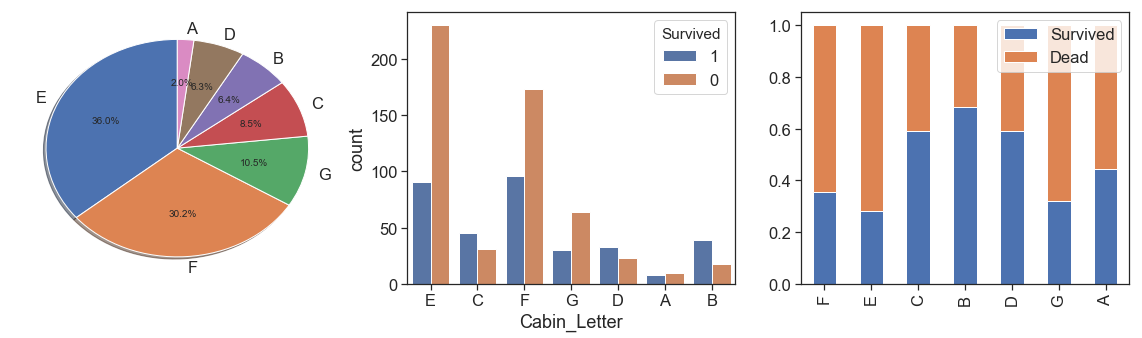

In [33]:
charts('Cabin_Letter', data[(data.Survived>=0)])

#### 2.3.11. Rescue of family relationships
<img  align='right' width="350" src=http://www3.sympatico.ca/rmmayette/images/FamillePC.jpg>

After some work, we notice that is difficult to understand SibSp and Patch isolated, and is difficult to extract directly families relationships from this data without a closer look.

So, in that configuration we not have clearly families relationships, and this information is primary to use for apply ages to ages with null with better distribution and accuracy.

Let's start to rescue:

The first treatment, I discovered when check the results and noticed that I didn't apply any relationship to a one case. Look the details below, we can see that is a case of a family with more than one ticket and the son has no age. So, I just manually applied this one case as a son, since the others menber the father and the mother, and the son has the pattern 0 in SibSp and Parch 2

In [34]:
display(data[data.Name.str.findall('Bourke').apply(lambda x: ''.join(map(str, x)).strip('[]'))=='Bourke'])
family_w_age = data.Ticket[(data.Parch>0) & (data.SibSp>0) & (data.Age==-1)].unique().tolist()
data[data.Ticket.isin(family_w_age)].sort_values('Ticket')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,same_tckt,distinction_in_tikect,passenger_fare,SibSp_bin,Parch_bin,Personal_Titles,distinction_in_name,surname,Cabin_Letter,Cabin_Number
188,189,0,3,"Bourke, Mr. John",male,40.0,1,1,364849,15.50,...,1,Others,7.75,1,1,Mr,0,Bourke,F,3
593,594,0,3,"Bourke, Miss. Mary",female,NaN,0,2,364848,7.75,...,0,Others,7.75,0,2,Miss,0,Bourke,F,3
657,658,0,3,"Bourke, Mrs. John (Catherine)",female,32.0,1,1,364849,15.50,...,1,Others,7.75,1,1,Mrs,1,Bourke,F,3


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,same_tckt,distinction_in_tikect,passenger_fare,SibSp_bin,Parch_bin,Personal_Titles,distinction_in_name,surname,Cabin_Letter,Cabin_Number



           ____________________________ Plots of sons per Survived and Dead: ____________________________


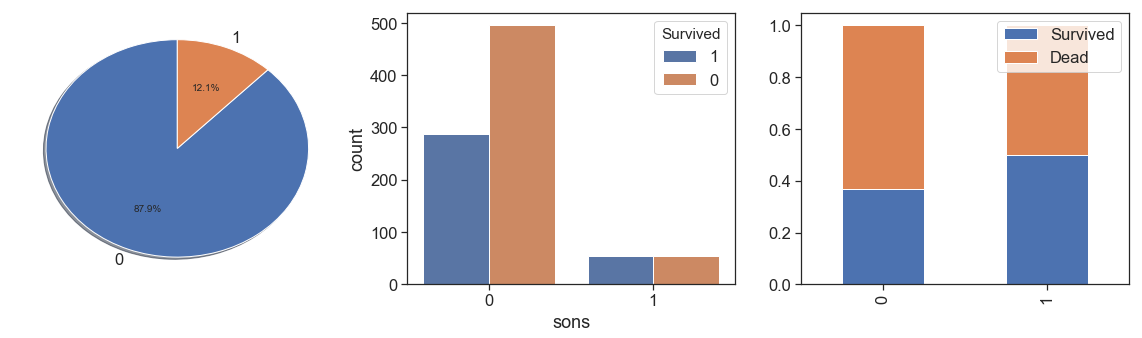

In [35]:
data['sons'] = data.apply(lambda x : \
                          1 if ((x.Ticket in (['2661', '2668', 'A/5. 851', '4133'])) & (x.SibSp>0)) else 0, axis=1)

data.sons += data.apply(lambda x : \
                        1 if ((x.Ticket in (['CA. 2343'])) & (x.SibSp>1)) else 0, axis=1)


data.sons += data.apply(lambda x : \
                        1 if ((x.Ticket in (['W./C. 6607'])) & (x.Personal_Titles not in (['Mr', 'Mrs']))) else 0, axis=1)

data.sons += data.apply(lambda x: 1 if ((x.Parch>0) & (x.Age>=0) & (x.Age<20)) else 0, axis=1)
data.sons.loc[data.PassengerId==594] = 1 # Sun with diferente pattern (family with two tickets)
data.sons.loc[data.PassengerId==1252] = 1 # Case of 'CA. 2343' and last rule
data.sons.loc[data.PassengerId==1084] = 1 # Case of 'A/5. 851' and last rule
data.sons.loc[data.PassengerId==1231] = 1 # Case of 'A/5. 851' and last rule

charts('sons', data[(data.Survived>=0)])

We observe that has only 12.1% of sons, and their had better survival rate than others. 

Next, we rescue the parents, and check cases where we have both (mother and father), and cases where we have only one aboard.


           ____________________________ Plots of parents per Survived and Dead: ____________________________


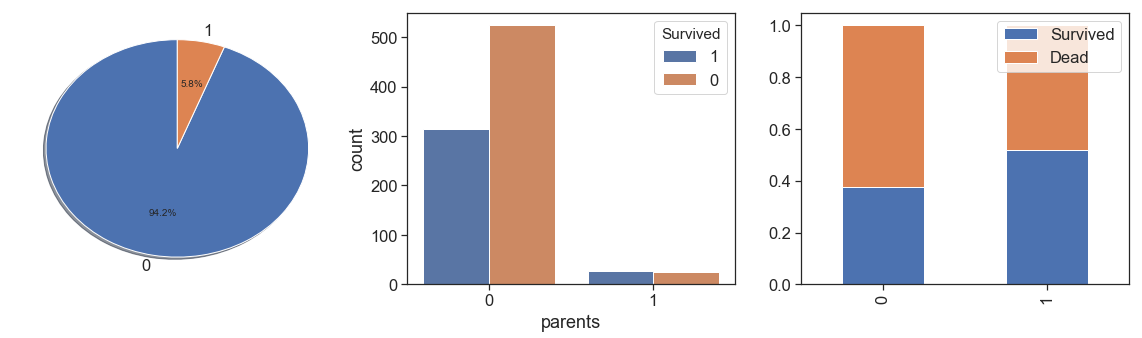

In [36]:
data['parents'] = data.apply(lambda x : \
                              1 if ((x.Ticket in (['2661', '2668', 'A/5. 851', '4133'])) & (x.SibSp==0)) else 0, axis=1)

data.parents += data.apply(lambda x : \
                              1 if ((x.Ticket in (['CA. 2343'])) & (x.SibSp==1)) else 0, axis=1)

data.parents += data.apply(lambda x : 1 if ((x.Ticket in (['W./C. 6607'])) & (x.Personal_Titles in (['Mr', 'Mrs']))) \
                                else 0, axis=1)

# Identify parents and care nulls ages
data.parents += data.apply(lambda x: 1 if ((x.Parch>0) & (x.SibSp>0) & (x.Age>19) & (x.Age<=45) ) else 0, axis=1)
charts('parents', data[(data.Survived>=0)])


           ____________________________ Plots of parent_alone per Survived and Dead: ____________________________


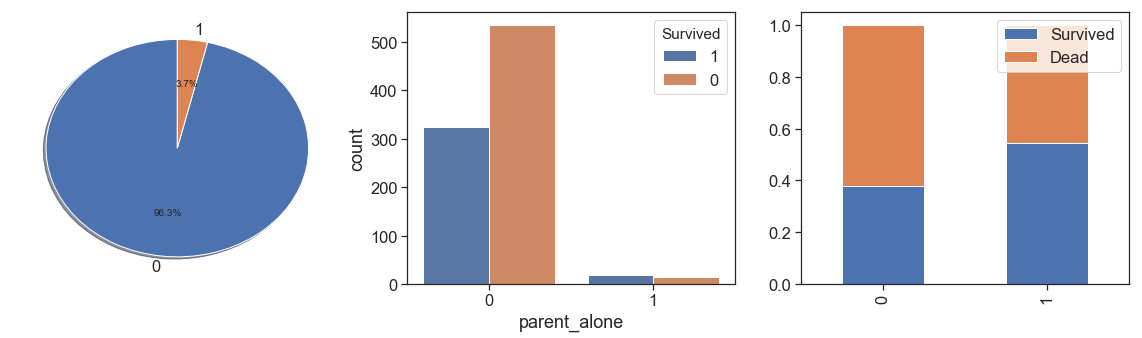

In [37]:
data['parent_alone'] = data.apply(lambda x: 1 if ((x.Parch>0) & (x.SibSp==0) & (x.Age>19) & (x.Age<=45) ) else 0, axis=1)
charts('parent_alone', data[(data.Survived>=0)])

We can notice that the both cases are to similar and it is not significant to has this two information separately. 

Before I put them together, as I had learned in assembling the sons, I made a visual inspection and discovered some cases os sons and parents that required different rules for assigning them. As I did visually and this is not a rule for a pipeline, I proceeded with the settings manually.


           ____________________________ Plots of parents per Survived and Dead: ____________________________


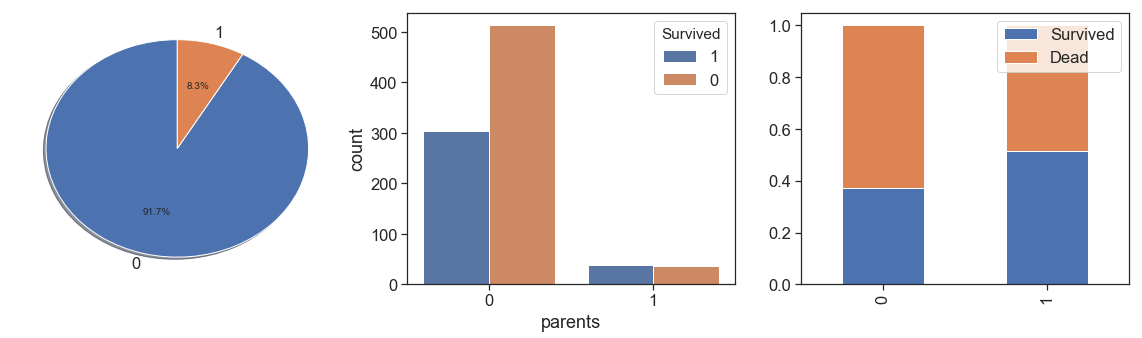

In [38]:
t_p_alone = data.Ticket[data.parent_alone==1].tolist()

data[data.Ticket.isin(t_p_alone)].sort_values('Ticket')[96:]

data.parent_alone.loc[data.PassengerId==141] = 1

data.parent_alone.loc[data.PassengerId==541] = 0
data.sons.loc[data.PassengerId==541] = 1

data.parent_alone.loc[data.PassengerId==1078] = 0
data.sons.loc[data.PassengerId==1078] = 1

data.parent_alone.loc[data.PassengerId==98] = 0
data.sons.loc[data.PassengerId==98] = 1

data.parent_alone.loc[data.PassengerId==680] = 0
data.sons.loc[data.PassengerId==680] = 1

data.parent_alone.loc[data.PassengerId==915] = 0
data.sons.loc[data.PassengerId==915] = 1

data.parent_alone.loc[data.PassengerId==333] = 0
data.sons.loc[data.PassengerId==333] = 1

data.parent_alone.loc[data.PassengerId==119] = 0
data.sons[data.PassengerId==119] = 1

data.parent_alone.loc[data.PassengerId==319] = 0
data.sons.loc[data.PassengerId==319] = 1

data.parent_alone.loc[data.PassengerId==103] = 0
data.sons.loc[data.PassengerId==103] = 1

data.parents.loc[data.PassengerId==154] = 0
data.sons.loc[data.PassengerId==1084] = 1

data.parents.loc[data.PassengerId==581] = 0
data.sons.loc[data.PassengerId==581] = 1

data.parent_alone.loc[data.PassengerId==881] = 0
data.sons.loc[data.PassengerId==881] = 1

data.parent_alone.loc[data.PassengerId==1294] = 0
data.sons.loc[data.PassengerId==1294] = 1

data.parent_alone.loc[data.PassengerId==378] = 0
data.sons.loc[data.PassengerId==378] = 1

data.parent_alone.loc[data.PassengerId==167] = 1
data.parent_alone.loc[data.PassengerId==357] = 0
data.sons.loc[data.PassengerId==357] = 1

data.parent_alone.loc[data.PassengerId==918] = 0
data.sons.loc[data.PassengerId==918] = 1

data.parent_alone.loc[data.PassengerId==1042] = 0
data.sons.loc[data.PassengerId==1042] = 1

data.parent_alone.loc[data.PassengerId==540] = 0
data.sons.loc[data.PassengerId==540] = 1

data.parents += data.parent_alone 
charts('parents', data[(data.Survived>=0)])

Next, we rescue the grandparents and grandparents alone. We found the same situations with less cases and decided put all parents and grandparents in one feature and leave to age distinguish them.


           ____________________________ Plots of grandparents per Survived and Dead: ____________________________


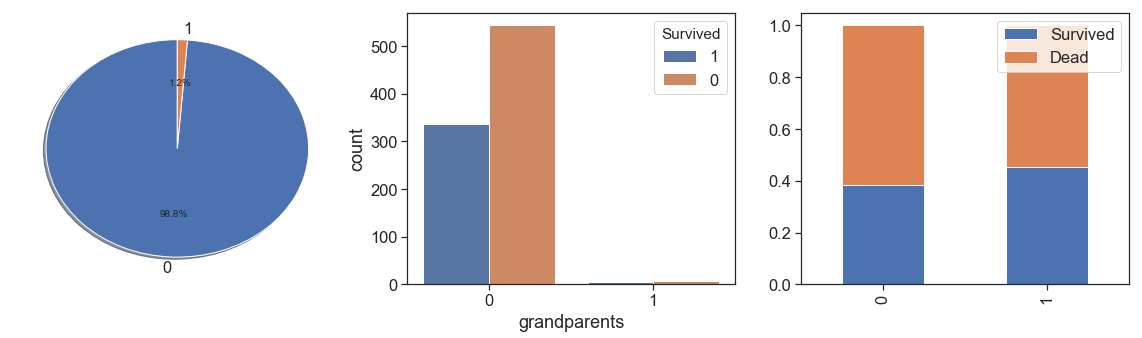

In [39]:
data['grandparents'] = data.apply(lambda x: 1 if ((x.Parch>0) & (x.SibSp>0) & (x.Age>19) & (x.Age>45) ) else 0, axis=1)
charts('grandparents', data[(data.Survived>=0)])


           ____________________________ Plots of grandparent_alone per Survived and Dead: ____________________________


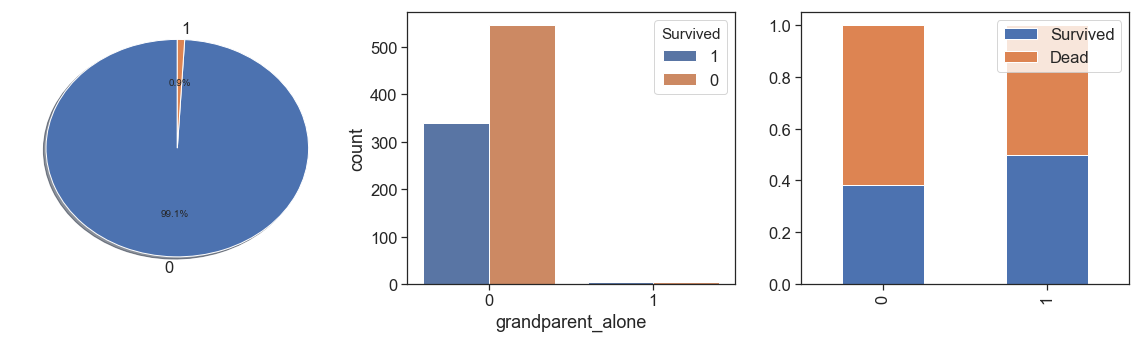

In [40]:
data['grandparent_alone'] = data.apply(lambda x: 1 if ((x.Parch>0) & (x.SibSp==0) & (x.Age>45) ) else 0, axis=1)
charts('grandparent_alone', data[(data.Survived>=0)])


           ____________________________ Plots of parents per Survived and Dead: ____________________________


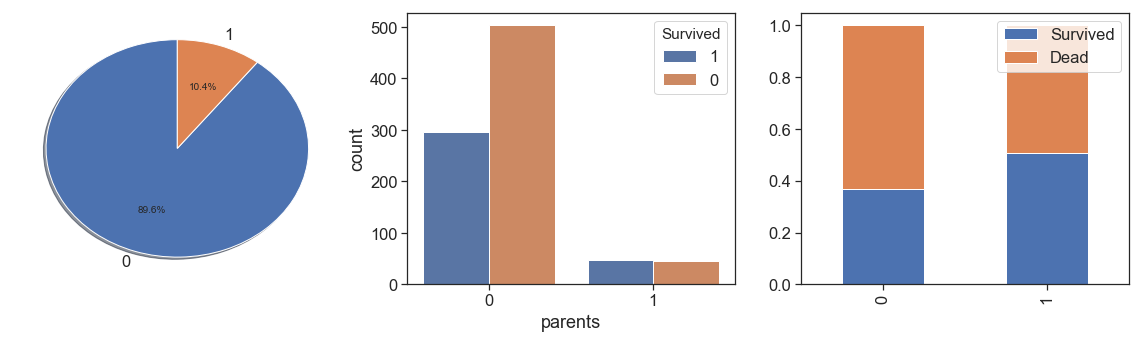

In [41]:
data.parents += data.grandparent_alone + data.grandparents
charts('parents', data[(data.Survived>=0)])

Next, we indetify the relatives aboard


           ____________________________ Plots of relatives per Survived and Dead: ____________________________


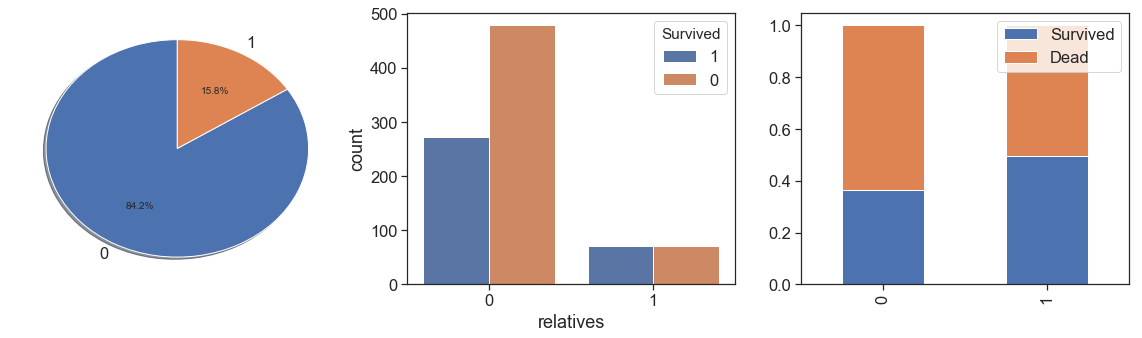

In [42]:
data['relatives'] = data.apply(lambda x: 1 if ((x.SibSp>0) & (x.Parch==0)) else 0, axis=1)
charts('relatives', data[(data.Survived>=0)])

And then, the companions, persons who traveled with a family but do not have family relationship with them.


           ____________________________ Plots of companions per Survived and Dead: ____________________________


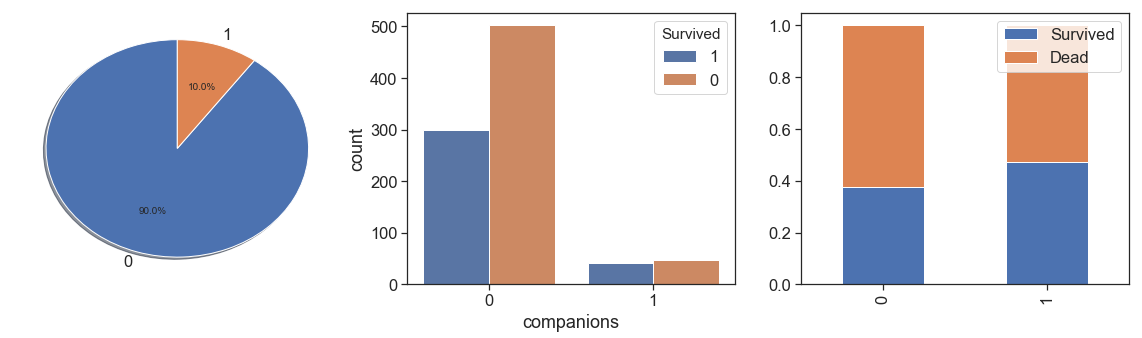

In [43]:
data['companions'] = data.apply(lambda x: 1 if ((x.SibSp==0) & (x.Parch==0) & (x.same_tckt==1)) else 0, axis=1)
charts('companions', data[(data.Survived>=0)])

Finally, we rescue the passengers that traveled alone.


           ____________________________ Plots of alone per Survived and Dead: ____________________________


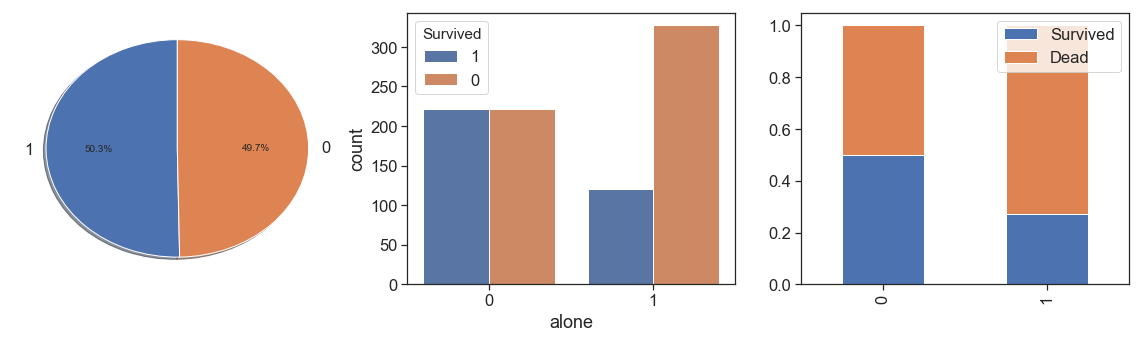

In [44]:
data['alone'] = data.apply(lambda x: 1 if ((x.SibSp==0) & (x.Parch==0) & (x.same_tckt==0)) else 0, axis=1)
charts('alone', data[(data.Survived>=0)])

As we can see, people with a family relationship, even if only as companions, had better survival rates and very close, than people who traveled alone.

Now we can work on issues of nulls ages and then on own information of age.

#### 2.3.12. Age
<img width='300' align='right' src=https://upload.wikimedia.org/wikipedia/commons/thumb/a/a2/Titanic_lifeboat.jpg/250px-Titanic_lifeboat.jpg>

We start with the numbers of nulls case by survived to remenber that is too high. 

Then, we polt the distributions of Ages, to check how is fit into the normal and see the distortions when apply a unique value (zero) to the nulls cases.

Next, we made the scatter plot of Ages and siblings, and see hat age decreases with the increase in the number of siblings, but with a great range

Survived without Age:


 0    125
-1     86
 1     52
Name: Survived, dtype: int64

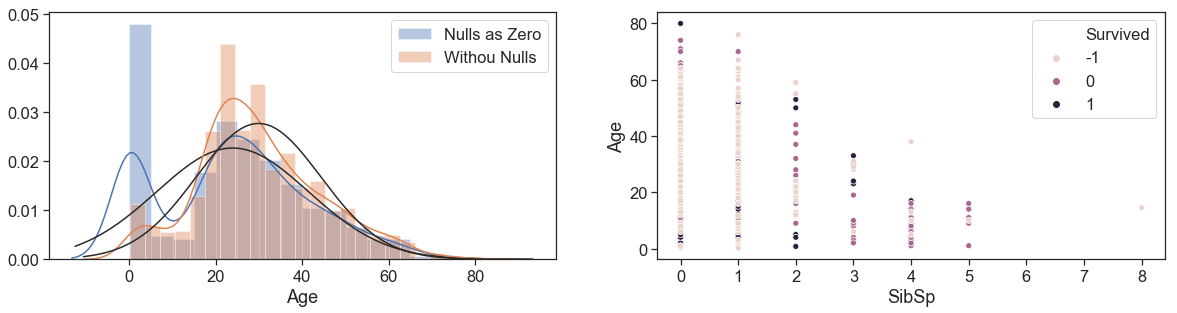

In [45]:
fig = plt.figure(figsize=(20, 10))
fig1 = fig.add_subplot(221)
g = sns.distplot(data.Age.fillna(0), fit=norm, label='Nulls as Zero')
g = sns.distplot(data[~data.Age.isnull()].Age, fit=norm, label='Withou Nulls')
plt.legend(loc='upper right')
print('Survived without Age:')
display(data[data.Age.isnull()].Survived.value_counts())
fig2 = fig.add_subplot(222)
g = sns.scatterplot(data = data[(~data.Age.isnull())], y='Age', x='SibSp',  hue='Survived')

From the tables below, we can see that our eforce to get Personal Titles and rescue family relationships produce better medians to apply on nulls ages.

In [46]:
print('Mean and median ages by siblings:')
data.loc[data.Age.isnull(), 'Age'] = -1
display(data.loc[(data.Age>=0), ['SibSp', 'Age']].groupby('SibSp').agg([np.mean, np.median]).T)

print('\nMedian ages by Personal_Titles:')
Ages = { 'Age' : {'median'}}
display(data[data.Age>=0][['Age', 'Personal_Titles', 'parents', 'grandparents', 'sons', 'relatives', 'companions', 'alone']].\
        groupby('Personal_Titles').agg(Ages).T)

print('\nMedian ages by Personal Titles and Family Relationships:')
display(pd.pivot_table(data[data.Age>=0][['Age', 'Personal_Titles', 'parents', 'grandparents', 
                                          'sons', 'relatives', 'companions','alone']],
                       aggfunc=np.median, 
                       index=['parents', 'grandparents', 'sons', 'relatives', 'companions', 'alone'] , 
                       columns=['Personal_Titles']))

print('\nNulls ages by Personal Titles and Family Relationships:')
display(data[data.Age<0][['Personal_Titles', 'parents', 'grandparents', 'sons', 'relatives', 'companions', 'alone']].\
        groupby('Personal_Titles').agg([sum]))

Mean and median ages by siblings:


SibSp               0          1          2        3         4          5  \
Age mean    30.921766  31.058071  23.569444  16.3125  8.772727  10.166667   
    median  28.000000  30.000000  21.500000  14.5000  7.000000  10.500000   

SibSp          8  
Age mean    14.5  
    median  14.5


Median ages by Personal_Titles:


,Personal_Titles,Kid,Miss,Mr,Mrs,Royalty,Technical
Age,median,4.0,22.0,29.0,35.0,40.0,49.5



Median ages by Personal Titles and Family Relationships:


Age                     \
Personal_Titles                                        Kid  Miss     Mr   Mrs   
parents grandparents sons relatives companions alone                            
0       0            0    0         0          1       NaN  23.0  28.75  36.0   
                                    1          0       NaN  30.0  28.00  40.0   
                          1         0          0      12.0  23.0  30.00  33.0   
                     1    0         0          0       4.0   8.5  18.00  19.0   
1       0            0    0         0          0       NaN  24.0  38.00  35.5   
        1            0    0         0          0       NaN   NaN  56.00  50.0   

                                                                        
Personal_Titles                                      Royalty Technical  
parents grandparents sons relatives companions alone                    
0       0            0    0         0          1        39.0      50.0  
                                    1          0        33.0       NaN  
                          1         0          0        48.5      48.5  
                     1    0         0          0         NaN       NaN  
1       0            0    0         0          0         NaN      29.0  
        1            0    0         0          0         NaN      61.5


Nulls ages by Personal Titles and Family Relationships:


,parents,grandparents,sons,relatives,companions,alone
,sum,sum,sum,sum,sum,sum
Personal_Titles,,,,,,
Kid,0,0,8,0,0,1
Miss,0,0,10,7,3,30
Mr,2,0,3,16,20,135
Mrs,7,0,0,11,3,7
Technical,0,0,0,0,0,1


So, we apply to the nulls ages the respectively median of same personal title and same family relationship, but before,  we create a binary feature to maintain the information of the presence of nulls.

In [47]:
data['Without_Age'] = data.Age.apply(lambda x: 0 if x>0 else 1)

data.Age.loc[(data.Age<0) & (data.companions==1) & (data.Personal_Titles=='Miss')] = \
   data.Age[(data.Age>=0) & (data.companions==1) & (data.Personal_Titles=='Miss')].median()

data.Age.loc[(data.Age<0) & (data.companions==1) & (data.Personal_Titles=='Mr')] = \
   data.Age[(data.Age>=0) & (data.companions==1) & (data.Personal_Titles=='Mr')].median()

data.Age.loc[(data.Age<0) & (data.companions==1) & (data.Personal_Titles=='Mrs')] = \
   data.Age[(data.Age>=0) & (data.companions==1) & (data.Personal_Titles=='Mrs')].median()

data.Age.loc[(data.Age<0) & (data.alone==1) & (data.Personal_Titles=='Kid')] = \
   data.Age[(data.Age>=0) & (data.alone==1) & (data.Personal_Titles=='Kid')].median()

data.Age.loc[(data.Age<0) & (data.alone==1) & (data.Personal_Titles=='Technical')] = \
   data.Age[(data.Age>=0) & (data.alone==1) & (data.Personal_Titles=='Technical')].median()

data.Age.loc[(data.Age<0) & (data.alone==1) & (data.Personal_Titles=='Miss')] = \
   data.Age[(data.Age>=0) & (data.alone==1) & (data.Personal_Titles=='Miss')].median()

data.Age.loc[(data.Age<0) & (data.alone==1) & (data.Personal_Titles=='Mr')] = \
   data.Age[(data.Age>=0) & (data.alone==1) & (data.Personal_Titles=='Mr')].median()

data.Age.loc[(data.Age<0) & (data.alone==1) & (data.Personal_Titles=='Mrs')] = \
   data.Age[(data.Age>=0) & (data.alone==1) & (data.Personal_Titles=='Mrs')].median()

data.Age.loc[(data.Age<0) & (data.parents==1) & (data.Personal_Titles=='Mr')] = \
   data.Age[(data.Age>=0) & (data.parents==1) & (data.Personal_Titles=='Mr')].median()

data.Age.loc[(data.Age<0) & (data.parents==1) & (data.Personal_Titles=='Mrs')] = \
   data.Age[(data.Age>=0) & (data.parents==1) & (data.Personal_Titles=='Mrs')].median()

data.Age.loc[(data.Age<0) & (data.sons==1) & (data.Personal_Titles=='Kid')] = \
   data.Age[(data.Age>=0) & (data.Personal_Titles=='Kid')].median()
data.Age.loc[(data.Age.isnull()) & (data.sons==1) & (data.Personal_Titles=='Kid')] = \
   data.Age[(data.Age>=0) & (data.Personal_Titles=='Kid')].median()

data.Age.loc[(data.Age<0) & (data.sons==1) & (data.Personal_Titles=='Miss')] = \
   data.Age[(data.Age>=0) & (data.sons==1) & (data.Personal_Titles=='Miss')].median()

data.Age.loc[(data.Age<0) & (data.sons==1) & (data.Personal_Titles=='Mr')] = \
   data.Age[(data.Age>=0) & (data.sons==1) & (data.Personal_Titles=='Mr')].median()

data.Age.loc[(data.Age<0) & (data.sons==1) & (data.Personal_Titles=='Mrs')] = \
   data.Age[(data.Age>=0) & (data.sons==1) & (data.Personal_Titles=='Mrs')].median()

data.Age.loc[(data.Age<0) & (data.relatives==1) & (data.Personal_Titles=='Miss')] = \
   data.Age[(data.Age>=0) & (data.relatives==1) & (data.Personal_Titles=='Miss')].median()

data.Age.loc[(data.Age<0) & (data.relatives==1) & (data.Personal_Titles=='Mr')] = \
   data.Age[(data.Age>=0) & (data.sons==1) & (data.Personal_Titles=='Mr')].median()

data.Age.loc[(data.Age<0) & (data.relatives==1) & (data.Personal_Titles=='Mrs')] = \
   data.Age[(data.Age>=0) & (data.relatives==1) & (data.Personal_Titles=='Mrs')].median()


Finally, we check how age distribution lines after fill the nulls.

Age correlation with survived: -0.04046792444732172


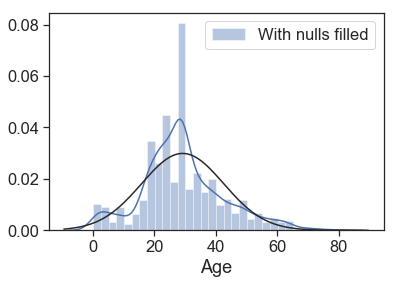

In [48]:
print('Age correlation with survived:',data.corr()['Survived'].Age)
g = sns.distplot(data.Age, fit=norm, label='With nulls filled')
plt.legend(loc='upper right')
plt.show()

To have better understanding of age, its proportion and its relation to survival ration, we binin it as follow

In [49]:
def binningAge(df):
    # Binning Age based on custom ranges
    bin_ranges = [0, 1.7, 8, 15, 18, 25, 55, 65, 100] 
    bin_names = [0, 1, 2, 3, 4, 5, 6, 7]
    df['Age_bin_custom_range'] = pd.cut(np.array(df.Age), bins=bin_ranges)
    df['Age_bin_custom_label'] = pd.cut(np.array(df.Age), bins=bin_ranges, labels=bin_names)
    return df

data = binningAge(data)
display(data[['Age', 'Age_bin_custom_range', 'Age_bin_custom_label']].sample(5))
display(pd.pivot_table(data[['Age_bin_custom_range', 'Survived']], aggfunc=np.count_nonzero, 
                       index=['Survived'] , columns=['Age_bin_custom_range']))

,Age,Age_bin_custom_range,Age_bin_custom_label
1070,64.00,"(55.0, 65.0]",6
64,28.75,"(25.0, 55.0]",5
872,33.00,"(25.0, 55.0]",5
519,32.00,"(25.0, 55.0]",5
10,4.00,"(1.7, 8.0]",1


Age_bin_custom_range,"(0.0, 1.7]","(1.7, 8.0]","(8.0, 15.0]","(15.0, 18.0]","(18.0, 25.0]","(25.0, 55.0]","(55.0, 65.0]","(65.0, 100.0]"
Survived,,,,,,,,
-1,16,28,30,58,200,466,34,4
0,2,18,24,46,114,317,21,7
1,24,52,28,44,146,366,22,2



           ____________________________ Plots of Age_bin_custom_label per Survived and Dead: ____________________________


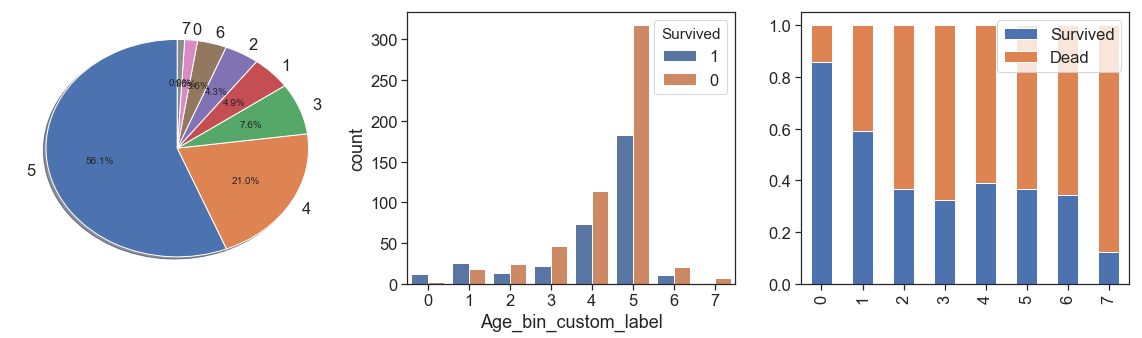

In [50]:
charts('Age_bin_custom_label', data[(data.Survived>=0)])

### 2.4.  One hot encode and drop provisory and unseless features
One hot encode categorical and non ordinal data and drop useless features.

In [51]:
data['genre'] = data.Sex.apply(lambda x: 1 if x=='male' else 0)
data.drop(['Name', 'Cabin', 'Ticket', 'Sex', 'same_tckt', 'qtd_same_ticket', 'parent_alone', 'grandparents', 
           'grandparent_alone', 'Age_bin_custom_range'], axis=1, inplace=True) # , 'Age', 'Parch', 'SibSp',
data = pd.get_dummies(data, columns = ['Cabin_Letter', 'Personal_Titles', 'Embarked', 'distinction_in_tikect'])

data = pd.get_dummies(data, columns = ['surname']) # 'Age_bin_custom_label'
data.drop(['surname_Exclude'], axis=1, inplace=True)

Scipy‘s pearsonr method computes both the correlation and p-value for the correlation, roughly showing the probability of an uncorrelated system creating a correlation value of this magnitude.
import numpy as np
from scipy.stats import pearsonr
pearsonr(data.loc[:, 'Pclass'], data.Survived)

## 3. Select Features
All of the features we find in the dataset might not be useful in building a machine learning model to make the necessary prediction. Using some of the features might even make the predictions worse. 
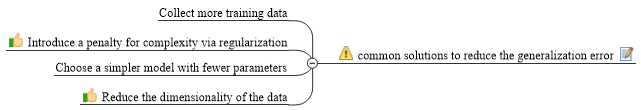
Often in data science we have hundreds or even millions of features and we want a way to create a model that only includes the most important features. This has three benefits. 
 1. It reduces the variance of the model, and therefore overfitting. 
 2. It reduces the complexity of a model and makes it easier to interpret.
 3. It improves the accuracy of a model if the right subset is chosen.
 4. Finally, it reduces the computational cost (and time) of training a model. 

So, an alternative way to reduce the complexity of the model and avoid overftting is dimensionality reduction via feature selection, which is especially useful for unregularized models. There are two main categories of dimensionality reduction techniques: feature selection and feature extraction. Using feature selection, we select a subset of the original features. In feature extraction, we derive information from the feature set to construct a new feature subspace. 

Exist various methodologies and techniques that you can use to subset your feature space and help your models perform better and efficiently. So, let’s get started.

### 3.1. First check for any correlations between features
Correlation is a statistical term which in common usage refers to how close two features are to having a linear relationship with each other. The  Pearson's correlation which measures linear correlation between two features, the resulting value lies in [-1;1], with -1 meaning perfect negative correlation (as one feature increases, the other decreases), +1 meaning perfect positive correlation and 0 meaning no linear correlation between the two features. 

Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, ***when two features have high correlation, we can drop one of the two features***.

There are five assumptions that are made with respect to Pearson's correlation:
- The feature must be either interval or ratio measurements.
- The variables must be approximately normally distributed.
- There is a linear relationship between the two variables.
- Outliers are either kept to a minimum or are removed entirely
- There is homoscedasticity of the data. Homoscedasticity basically means that the variances along the line of best fit remain similar as you move along the line.

One obvious drawback of Pearson correlation as a feature ranking mechanism is that it is only sensitive to a linear relationship. If the relation is non-linear, Pearson correlation can be close to zero even if there is a 1-1 correspondence between the two variables. For example, correlation between x and x2 is zero, when x is centered on 0.

Furthermore, relying only on the correlation value on interpreting the relationship of two variables can be highly misleading, so it is always worth plotting the data as we did on the EDA phase.

The following guidelines interpreting Pearson's correlation coefficient (r):

| Strength of Association | r Positive | r Negative |
|-------------------------|------------|------------|
| Small	                  | .1 to  .3  |-0.1 to -0.3|
| Medium	              | .3 to  .5  |-0.3 to -0.5|
| Large	                  | .5 to 1.0  |-0.5 to -1.0|

The correlation matrix is identical to a covariance matrix computed from standardized data. The correlation matrix is a square matrix that contains the Pearson product-moment correlation coefficients (often abbreviated as Pearson's r), which measure the linear dependence between pairs of features. Pearson's correlation coefficient can simply be calculated as the covariance between two features x and y (numerator) divided by the product of their standard deviations (denominator):

The covariance between standardized features is in fact equal to their linear correlation coefficient.

Let's check what are the highest correlations with survived, I will now create a correlation matrix to quantify the linear relationship between the features. To do this I use NumPy's corrcoef and seaborn's heatmap function to plot the correlation matrix array as a heat map.

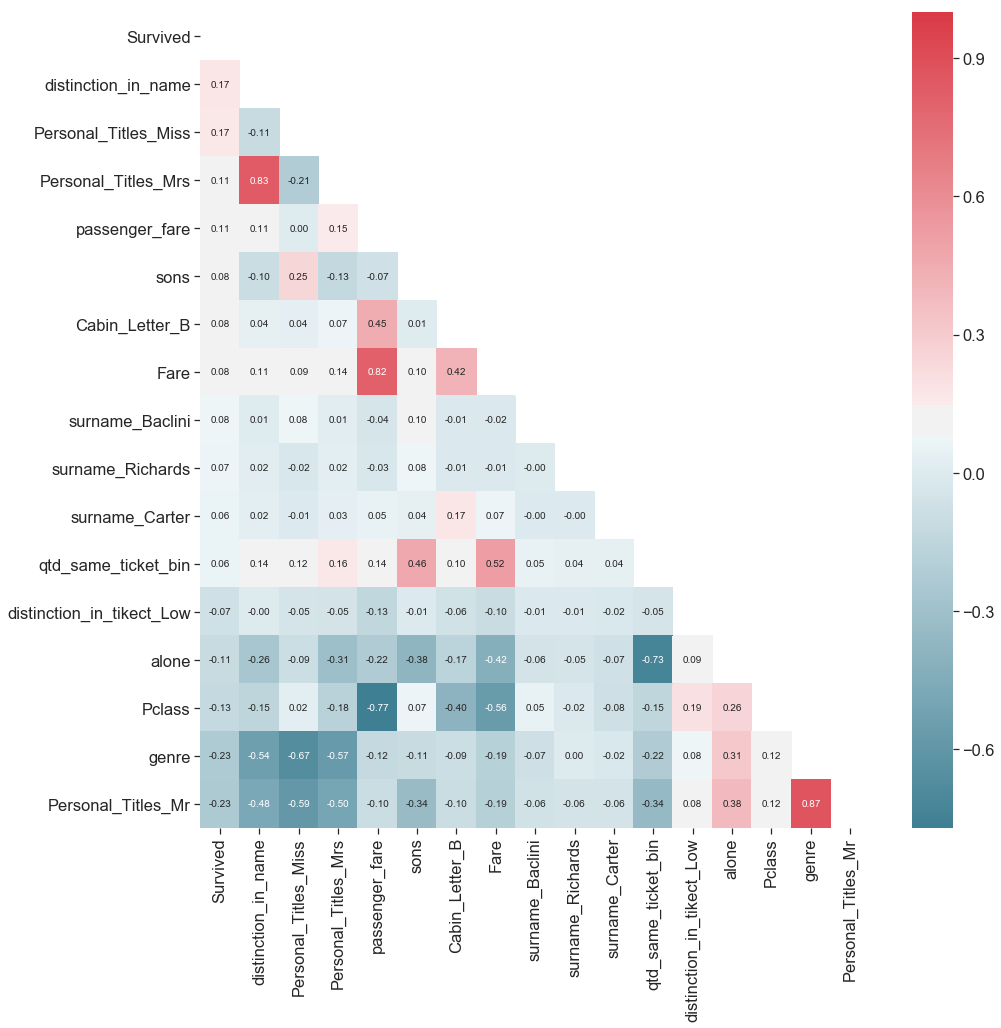

In [52]:
corr = data.loc[:, 'Survived':].corr()
top_corr_cols = corr[abs(corr.Survived)>=0.06].Survived.sort_values(ascending=False).keys()
top_corr = corr.loc[top_corr_cols, top_corr_cols]
dropSelf = np.zeros_like(top_corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
plt.figure(figsize=(15, 15))
sns.heatmap(top_corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)
sns.set(font_scale=0.8)
plt.show()
del corr, dropSelf, top_corr

#### 3.1.1. Drop the features with highest correlations to other Features:

**Colinearity** is the state where two variables are highly correlated and contain similiar information about the variance within a given dataset. And as you see above, it is easy to find ***higest colinearities*** (***Personal_Titles_Mrs***, ***Personal_Titles_Mr*** and ***Fare***.

You should always be concerned about the collinearity, regardless of the model/method being linear or not, or the main task being prediction or classification.

Assume a number of linearly correlated covariates/features present in the data set and Random Forest as the method. Obviously, random selection per node may pick only (or mostly) collinear features which may/will result in a poor split, and this can happen repeatedly, thus negatively affecting the performance.

Now, the collinear features may be less informative of the outcome than the other (non-collinear) features and as such they should be considered for elimination from the feature set anyway. However, assume that the features are ranked high in the 'feature importance' list produced by RF. As such they would be kept in the data set unnecessarily increasing the dimensionality. So, in practice, I'd always, as an exploratory step (out of many related) check the pairwise association of the features, including linear correlation.

#### 3.1.2. Identify  and treat Multicolinearity:
**Multicolinearity** is more troublesome to detect because it emerges when three or more variables, which are highly correlated, are included within a model, leading to unreliable and unstable estimates of regression coefficients. To make matters worst multicolinearity can emerge even when isolated pairs of variables are not colinear.

To identify, we need start with the coefficient of determination, r<sup>2</sup>, is the square of the Pearson correlation coefficient r. The coefficient of determination, with respect to correlation, is the proportion of the variance that is shared by both variables. It gives a measure of the amount of variation that can be explained by the model (the correlation is the model). It is sometimes expressed as a percentage (e.g., 36% instead of 0.36) when we discuss the proportion of variance explained by the correlation. However, you should not write r2 = 36%, or any other percentage. You should write it as a proportion (e.g., r2 = 0.36).

Already the **Variance Inflation Factor** (**VIF**) is a measure of colinearity among predictor variables within a multiple regression.  It is may be calculated for each predictor by doing a linear regression of that predictor on all the other predictors, and then obtaining the R<sup>2</sup> from that regression.  It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone [1/(1-R<sup>2</sup>)]. Thus, a VIF of 1.8 tells us that the variance (the square of the standard error) of a particular coefficient is 80% larger than it would be if that predictor was completely uncorrelated with all the other predictors. The VIF has a lower bound of 1 but no upper bound. Authorities differ on how high the VIF has to be to constitute a problem (e.g.: 2.50 (R<sup>2</sup> equal to 0.6), sometimes 5 (R<sup>2</sup> equal to .8), or greater than 10 (R<sup>2</sup> equal to 0.9) and so on). 

But there are several situations in which multicollinearity can be safely ignored:

 - ***Interaction terms*** and ***higher-order terms*** (e.g., ***squared*** and ***cubed predictors***) ***are correlated*** with main effect terms because they include the main effects terms. **Ops!** Sometimes we use ***polynomials*** to solve problems, **indeed!** But keep calm, in these cases,  **standardizing** the predictors can **removed the multicollinearity**. 
 - ***Indicator***, like ***dummy*** or ***onde-hot-encode***, that represent a ***categorical variable with three or more categories***. If the proportion of cases in the reference category is small, the indicator will necessarily have high VIFs, even if the categorical is not associated with other variables in the regression model. But, you need check if some dummy is collinear or has multicollinearity with other features outside of their dummies.
 - ***Control feature** if the ***feature of interest*** **do not have high VIFs**. Here’s the thing about multicollinearity: it’s only a problem for the features that are **collinear**. It increases the standard errors of their coefficients, and it may make those coefficients unstable in several ways. But so long as the collinear feature are only used as control feature, and they are not collinear with your feature of interest, there’s no problem. The coefficients of the features of interest are not affected, and the performance of the control feature as controls is not impaired.

So, generally, we could run the same model twice, once with severe multicollinearity and once with moderate multicollinearity. This provides a great head-to-head comparison and it reveals the classic effects of multicollinearity. However, when standardizing your predictors doesn’t work, you can try other solutions such as:
- removing highly correlated predictors
- linearly combining predictors, such as adding them together
- running entirely different analyses, such as partial least squares regression or principal components analysis

When considering a solution, keep in mind that all remedies have potential drawbacks. If you can live with less precise coefficient estimates, or a model that has a high R-squared but few significant predictors, doing nothing can be the correct decision because it won't impact the fit.

Given the potential for correlation among the predictors, we’ll have display the variance inflation factors (VIF), which indicate the extent to which multicollinearity is present in a regression analysis. Hence such variables need to be removed from the model. Deleting one variable at a time and then again checking the VIF for the model is the best way to do this.

So, I start the analysis removed the 3 features with he higest colinearities and the surnames different from my control surname_Alone, run VIF.Note that when the data set has a significant outlier the VIF is Inf and code emit a message: `outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars`.

In [53]:
#Step 1: Remove the higest correlations and run a multiple regression
cols = [ 'surname_Alone',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 #'Fare',
 'qtd_same_ticket_bin',
 'passenger_fare',
 #'SibSp_bin',
 #'Parch_bin',
 'distinction_in_name',
 'Cabin_Number',
 'sons',
 'parents',
 'relatives',
 'companions',
 'alone',
 'Without_Age',
 'Age_bin_custom_label',
 'genre',
 'Cabin_Letter_A',
 'Cabin_Letter_B',
 'Cabin_Letter_C',
 'Cabin_Letter_D',
 'Cabin_Letter_E',
 'Cabin_Letter_F',
 'Cabin_Letter_G',
 'Personal_Titles_Kid',
 'Personal_Titles_Miss',
 #'Personal_Titles_Mr',
 #'Personal_Titles_Mrs',
 'Personal_Titles_Royalty',
 'Personal_Titles_Technical',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'distinction_in_tikect_High',
 'distinction_in_tikect_Low',
 'distinction_in_tikect_Others',
 'distinction_in_tikect_PC'
]

y_train = data.Survived[data.Survived>=0]
scale = StandardScaler(with_std=False)
df = pd.DataFrame(scale.fit_transform(data.loc[data.Survived>=0, cols]), columns= cols)
features = "+".join(cols)
df2 = pd.concat([y_train, df], axis=1)

# get y and X dataframes based on this regression:
y, X = dmatrices('Survived ~' + features, data = df2, return_type='dataframe')

#Step 2: Calculate VIF Factors
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

#Step 3: Inspect VIF Factors
vif.sort_values('VIF Factor')

,VIF Factor,features
0,1.000000,Intercept
27,1.088094,Personal_Titles_Royalty
28,1.096391,Personal_Titles_Technical
15,1.367430,Without_Age
9,1.459206,Cabin_Number
25,1.985728,Personal_Titles_Kid
1,2.186115,surname_Alone
4,2.575579,SibSp
8,2.931421,distinction_in_name
7,3.590918,passenger_fare


From the results, I conclude that can safe maintain the dummies of Embarked, but need work in the remaining features where's the VIF stated as inf. You can see that surname Alone has a VIF of 2.2, let´s try remove the dummy alone, that is pretty similar, and check if it solves the other dummies from its category:

In [54]:
#Step 1: Remove one feature with VIF on Inf from the same category and run a multiple regression
cols.remove('alone')

y_train = data.Survived[data.Survived>=0]
scale = StandardScaler(with_std=False)
df = pd.DataFrame(scale.fit_transform(data.loc[data.Survived>=0, cols]), columns= cols)
features = "+".join(cols)
df2 = pd.concat([y_train, df], axis=1)

# get y and X dataframes based on this regression:
y, X = dmatrices('Survived ~' + features, data = df2, return_type='dataframe')

#Step 2: Calculate VIF Factors
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

#Step 3: Inspect VIF Factors
vif.sort_values('VIF Factor')

,VIF Factor,features
0,1.000000,Intercept
26,1.088094,Personal_Titles_Royalty
27,1.096391,Personal_Titles_Technical
14,1.367430,Without_Age
9,1.459206,Cabin_Number
24,1.985728,Personal_Titles_Kid
13,2.148731,companions
1,2.186115,surname_Alone
12,2.468465,relatives
4,2.575579,SibSp


To solve Cabin Letter, we can try remove only the lowest frequency 'A', and see if we can accept the VIFs of others Cabins:

In [55]:
#Step 1: Remove one feature with VIF on Inf from the same category and run a multiple regression
cols.remove('Cabin_Letter_A')

y_train = data.Survived[data.Survived>=0]
scale = StandardScaler(with_std=False)
df = pd.DataFrame(scale.fit_transform(data.loc[data.Survived>=0, cols]), columns= cols)
features = "+".join(cols)
df2 = pd.concat([y_train, df], axis=1)

# get y and X dataframes based on this regression:
y, X = dmatrices('Survived ~' + features, data = df2, return_type='dataframe')

#Step 2: Calculate VIF Factors
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

#Step 3: Inspect VIF Factors
vif.sort_values('VIF Factor')

,VIF Factor,features
0,1.000000,Intercept
25,1.088094,Personal_Titles_Royalty
26,1.096391,Personal_Titles_Technical
14,1.367430,Without_Age
9,1.459206,Cabin_Number
23,1.985728,Personal_Titles_Kid
13,2.148731,companions
1,2.186115,surname_Alone
12,2.468465,relatives
4,2.575579,SibSp


Now our focus is on distinct in name, since "High" has less observations, let's try dropped it and drop the bins of Parch and SibSp.

In [56]:
cols.remove('distinction_in_tikect_High')

y_train = data.Survived[data.Survived>=0]
scale = StandardScaler(with_std=False)
df = pd.DataFrame(scale.fit_transform(data.loc[data.Survived>=0, cols]), columns= cols)
features = "+".join(cols)
df2 = pd.concat([y_train, df], axis=1)

# get y and X dataframes based on this regression:
y, X = dmatrices('Survived ~' + features, data = df2, return_type='dataframe')

#Step 2: Calculate VIF Factors
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

#Step 3: Inspect VIF Factors
vif.sort_values('VIF Factor')

,VIF Factor,features
0,1.000000,Intercept
25,1.088094,Personal_Titles_Royalty
26,1.096391,Personal_Titles_Technical
14,1.367430,Without_Age
9,1.459206,Cabin_Number
23,1.985728,Personal_Titles_Kid
13,2.148731,companions
1,2.186115,surname_Alone
12,2.468465,relatives
4,2.575579,SibSp


Yea, we can accept, and we can proceed to the next step.

### 3.2. Feature Selection by Filter Methods
Filter methods use statistical methods for evaluation of a subset of features, they are generally used as a preprocessing step. These methods are also known as **univariate feature selection**, they examines each feature individually to determine the strength of the relationship of the feature with the dependet variable. These methods are **simple to run and understand** and are in general particularly **good for gaining a better understanding** of data, but **not necessarily for optimizing the feature set for better generalization**.

So, the features are selected on the basis of their scores in various statistical tests for their correlation with the outcome variable. The correlation is a subjective term here. For basic guidance, you can refer to the following table for defining correlation co-efficients.

| Feature/Response |       Continuous      | Categorical
|------------------|-----------------------|------------
| Continuous       | Pearson's Correlation | LDA
| Categorical      | Anova                 | Chi-Square

One thing that should be kept in mind is that filter methods do not remove multicollinearity. So, you must deal with multicollinearity of features as well before training models for your data.

There are lot of different options for univariate selection. Some exaples are:
- Model Based Ranking
- Mutual information and maximal information coefficient (MIC).

I did not approach the latter, becouse there has been some critique about MIC’s statistical power, i.e. the ability to reject the null hypothesis when the null hypothesis is false. This may or may not be a concern, depending on the particular dataset and its noisiness. If you have intterest on this, in python, MIC is available in the [minepy](http://minepy.sourceforge.net/docs/1.0.0/cpp.html?highlight=mic#MINE::MINE::mic) library.

#### 3.2.1. Feature Selection by Model based ranking
We can use an arbitrary machine learning method to build a predictive model for the response variable using each individual feature, and measure the performance of each model.

In fact, this is already put to use with Pearson’s correlation coefficient, since it is equivalent to standardized regression coefficient that is used for prediction in linear regression. But this method it is not good to select features with non-linear relation to dependent variable. For this, there are a number of alternatives, for example tree based methods (decision trees, random forest), linear model with basis expansion etc. Tree based methods are probably among the easiest to apply, since they can model non-linear relations well and don’t require much tuning. The main thing to avoid is overfitting, so the depth of tree(s) should be relatively small, and cross-validation should be applied.

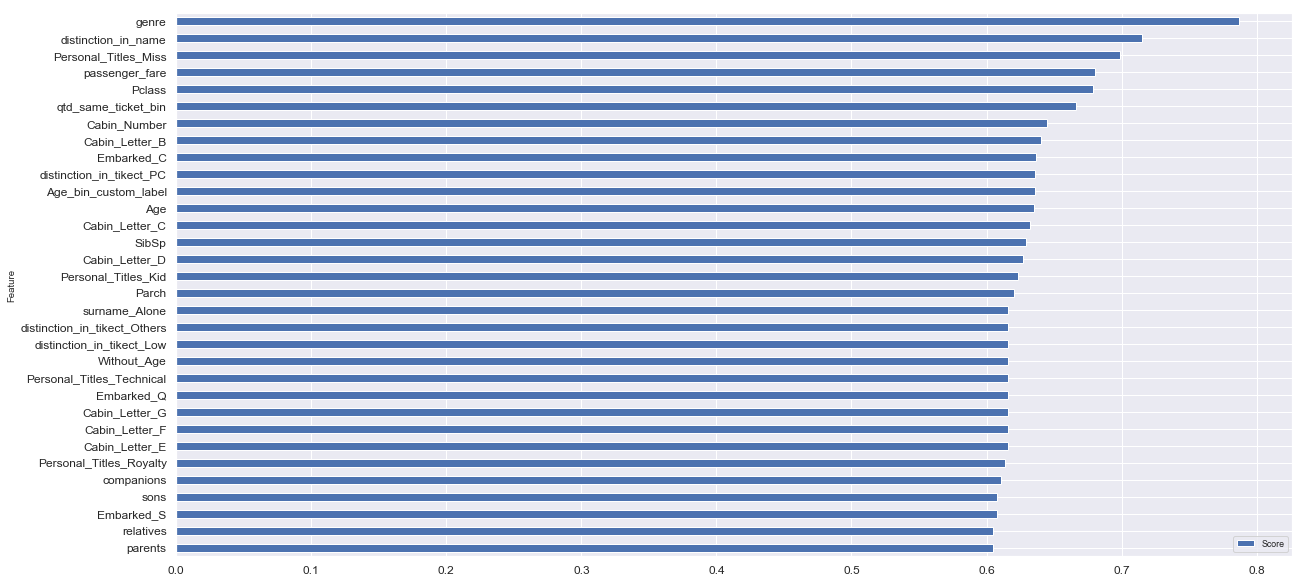

In [57]:
rf = RandomForestClassifier(n_estimators=20, max_depth=4, random_state=101)
scores = []
for i in range(df.shape[1]):
     score = cross_val_score(rf, df.iloc[:, i:i+1], y_train, scoring="accuracy", cv=10)
     scores.append((round(np.mean(score), 3), cols[i]))
MBR = pd.DataFrame(sorted(scores, reverse=False), columns=['Score', 'Feature'])
g = MBR.plot(x='Feature', kind='barh', figsize=(20,10), fontsize=12, grid=True)
plt.show()
MBR = MBR.iloc[:10, 1]

#### 3.2.2. Feature Selection by [SelectKBest](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html):
On scikit-learn we find variety of implementation oriented to classifications taks to select features according to the k highest scores, see below some of that:
- [f_classif](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif) compute the ANOVA F-value for the provided sample.
- [chi2](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2) compute chi-squared stats between each non-negative feature and class. 
- [mutual_info_classif](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif) estimate mutual information for a discrete target variable.

The methods based on F-test estimate the degree of linear dependency between two random variables. On the other hand, mutual information methods can capture any kind of statistical dependency, but being nonparametric, they require more samples for accurate estimation.

Other important point is if you use sparse data, for example if we continue concider hot-encode of surnames, chi2  and mutual_info_classif will deal with the data without making it dense.

Let´s see the SelectKBest of f_classif and chi2 for our data:

Total features slected by f_classif Statistical Methods 10
Total features slected by chi2 Statistical Methods 10
Extra features select by f_class:
 {'passenger_fare', 'Embarked_S'} 

Extra features select by chi2:
 {'Cabin_Letter_C', 'distinction_in_tikect_PC'} 

Intersection features select by f_class and chi2:
 {'Pclass', 'Cabin_Letter_E', 'distinction_in_name', 'distinction_in_tikect_Low', 'Personal_Titles_Miss', 'Embarked_C', 'genre', 'Cabin_Letter_B'} 

Total number of features selected: 12
{'Pclass', 'passenger_fare', 'distinction_in_name', 'Cabin_Letter_E', 'Embarked_S', 'distinction_in_tikect_Low', 'Personal_Titles_Miss', 'distinction_in_tikect_PC', 'Cabin_Letter_C', 'Embarked_C', 'genre', 'Cabin_Letter_B'}


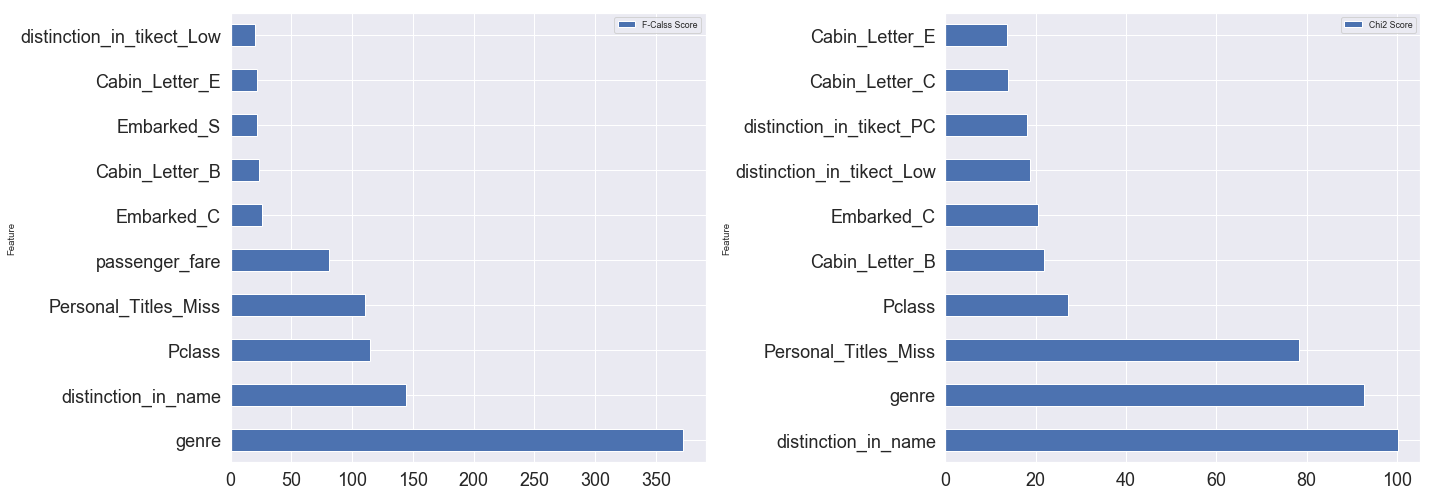

In [58]:
cols = pd.Index(cols)

skb = SelectKBest(score_func=f_classif, k=10)
skb.fit(df, y_train)

select_features_kbest = skb.get_support()
feature_f_clas = cols[select_features_kbest]
feature_f_clas_scores = [(item, score) for item, score in zip(cols, skb.scores_)]
print('Total features slected by f_classif Statistical Methods',len(feature_f_clas))
fig = plt.figure(figsize=(20,7))
f1 = fig.add_subplot(121)
g = pd.DataFrame(sorted(feature_f_clas_scores, key=lambda x: -x[1])[:len(feature_f_clas)], columns=['Feature','F-Calss Score']).\
plot(x='Feature', kind='barh', fontsize=18, ax=f1, grid=True)

scale = MinMaxScaler()
df2 = scale.fit_transform(data.loc[data.Survived>=0, cols])
skb = SelectKBest(score_func=chi2, k=10)
skb.fit(df2, y_train)
select_features_kbest = skb.get_support()
feature_chi2 = cols[select_features_kbest]
feature_chi2_scores = [(item, score) for item, score in zip(cols, skb.scores_)]
print('Total features slected by chi2 Statistical Methods',len(feature_chi2))
f2 = fig.add_subplot(122)
g = pd.DataFrame(sorted(feature_chi2_scores, key=lambda x: -x[1])[:len(feature_chi2)], columns=['Feature','Chi2 Score']).\
plot(x='Feature', kind='barh', fontsize=18, ax=f2, grid=True)

SMcols = set(feature_f_clas).union(set(feature_chi2))
print("Extra features select by f_class:\n", set(feature_f_clas).difference(set(feature_chi2)), '\n')
print("Extra features select by chi2:\n", set(feature_chi2).difference(set(feature_f_clas)), '\n')
print("Intersection features select by f_class and chi2:\n",set(feature_f_clas).intersection(set(feature_chi2)), '\n')
print('Total number of features selected:', len(SMcols))
print(SMcols)

plt.tight_layout(); plt.show()

## 3.3. Wrapper Methods
In wrapper methods, we try to use a subset of features and train a model using them. Based on the inferences that we draw from the previous model, we decide to add or remove features from your subset. The problem is essentially reduced to a search problem. These methods are usually computationally very expensive.

### 3.3.1. Backward Elimination
In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

We will see below row implementation of backward elimination, one to select by P-values and other based on the accuracy of a model the we submitted to it.

#### 3.3.1.1.  Backward Elimination By P-values

The **P-value**, or probability value, or asymptotic significance, is a **probability** value for a given **statistical model** that, ***if the null hypothesis is true***, a set of statistical observations more commonly known as **the statistical summary** <i>is greater than or equal in magnitude to</i> **the observed results**.

The **null hypothesis** is a general statement that **there is no relationship between two measured phenomena**.

For example, if the correlation is very small and furthermore, the p-value is high meaning that it is very likely to observe such correlation on a dataset of this size purely by chance.

But you need to be careful how you interpret the statistical significance of a correlation. If your correlation coefficient has been determined to be statistically significant this does not mean that you have a strong association. It simply tests the null hypothesis that there is no relationship. By rejecting the null hypothesis, you accept the alternative hypothesis that states that there is a relationship, but with no information about the strength of the relationship or its importance.

Since removal of different features from the dataset will have different effects on the p-value for the dataset, we can remove different features and measure the p-value in each case. These measured p-values can be used to decide whether to keep a feature or not.

Next we make the test of a ***logit regression*** to check the result and **select features** based on its the **P-value**:

In [59]:
logit_model=sm.Logit(y_train,df)
result=logit_model.fit(method='bfgs', maxiter=2000)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.386934
         Iterations: 257
         Function evaluations: 260
         Gradient evaluations: 260
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      859
Method:                           MLE   Df Model:                           31
Date:                Wed, 19 Sep 2018   Pseudo R-squ.:                  0.4189
Time:                        21:05:05   Log-Likelihood:                -344.76
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 1.918e-85
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

As expect, **P-values** of dummies is high. Like before, I excluded one by one of the features with the highest P-value and run again until get only **P-values below to 0.075**, but here I use a backward elimination process.

In [60]:
pv_cols = cols.values

def backwardElimination(x, Y, sl, columns):
    numVars = x.shape[1]
    for i in range(0, numVars):
        regressor = sm.Logit(Y, x).fit(method='bfgs', maxiter=2000, disp=False)
        maxVar = max(regressor.pvalues) #.astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor.pvalues[j].astype(float) == maxVar):
                    columns = np.delete(columns, j)
                    x = x.loc[:, columns]
                    
    print(regressor.summary())
    print('\nSelect {:d} features from {:d} by best p-values.'.format(len(columns), len(pv_cols)))
    print('The max p-value from the features selecte is {:.3f}.'.format(maxVar))
    return columns

SL = 0.1
df2 = scale.fit_transform(data.loc[data.Survived>=0, pv_cols])
df2 = pd.DataFrame(df2, columns = pv_cols)

pv_cols = backwardElimination(df2, y_train, SL, pv_cols)

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      875
Method:                           MLE   Df Model:                           15
Date:                Wed, 19 Sep 2018   Pseudo R-squ.:                  0.4096
Time:                        21:05:07   Log-Likelihood:                -350.31
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 5.054e-94
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Pclass                       -1.6396      0.407     -4.025      0.000      -2.438      -0.841
Age                          -1.9095      0.696     -2.744      0.006      -3.273     

#### 3.3.1.2.  Backward Elimination By Accuracy - A Sequential Backward Selection

**Sequential feature selection algorithms** are a family of **greedy search algorithms** that are used to reduce an initial d-dimensional feature space to a k-dimensional feature subspace where k < d. The motivation behind feature selection algorithms is to automatically select a subset of features that are most relevant to the problem to improve computational effciency or reduce the generalization error of the model by removing irrelevant features or noise, ***which can be useful for algorithms that don't
support regularization***.

Greedy algorithms make locally optimal choices at each stage of a combinatorial search problem and generally yield a suboptimal solution to the problem in contrast to exhaustive search algorithms, which evaluate all possible combinations and are guaranteed to find the optimal solution. However, in practice, an exhaustive search is often computationally not feasible, whereas greedy algorithms allow for a less complex, computationally more efficient solution.

SBS aims to reduce the dimensionality of the initial feature subspace with a minimum decay in performance of the classifier to improve upon computational efficiency. In certain cases, SBS can even improve the predictive power of the model if a model suffers from overfitting.

SBS sequentially removes features from the full feature subset until the new feature subspace contains the desired number of features. In order to determine which feature is to be removed at each stage, we need to define criterion function J that we want to minimize. The criterion calculated by the criterion function can simply be the difference in performance of the classifier after and before the removal of a particular feature. Then the feature to be removed at each stage can simply be defined as the feature that maximizes this criterion.

So, let's see a exemple of SBS in our data:

Best Score: 0.8026905829596412


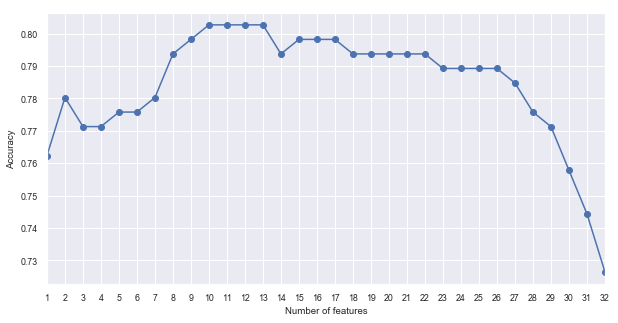

First best accuracy with:
 ['Age', 'qtd_same_ticket_bin', 'passenger_fare', 'distinction_in_name', 'sons', 'companions', 'Without_Age', 'Age_bin_custom_label', 'genre', 'Cabin_Letter_C', 'Personal_Titles_Kid', 'Personal_Titles_Miss', 'Embarked_C']

Best accuracy with less features:
 ['Age', 'qtd_same_ticket_bin', 'passenger_fare', 'distinction_in_name', 'Without_Age', 'Age_bin_custom_label', 'genre', 'Personal_Titles_Kid', 'Personal_Titles_Miss', 'Embarked_C']


In [61]:
class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=101):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = list(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]
        
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, X_test, y_test, list(p))
                scores.append(score)
                subsets.append(list(p))
                
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
            
        self.k_score_ = self.scores_[-1]
        return self

    def transform(self, X):
        return X.iloc[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train.iloc[:, indices], y_train)
        y_pred = self.estimator.predict(X_test.iloc[:, indices])
        score = self.scoring(y_test, y_pred)
        return score
    
knn = KNeighborsClassifier(n_neighbors=3)
sbs = SBS(knn, k_features=1)
sbs.fit(df, y_train)

print('Best Score:',max(sbs.scores_))

k_feat = [len(k) for k in sbs.subsets_]
fig = plt.figure(figsize=(10,5))
plt.plot(k_feat, sbs.scores_, marker='o')
#plt.ylim([0.7, max(sbs.scores_)+0.01])
plt.xlim([1, len(sbs.subsets_)])
plt.xticks(np.arange(1, len(sbs.subsets_)+1))
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid(b=1)
plt.show()

print('First best accuracy with:\n',list(df.columns[sbs.subsets_[np.argmax(sbs.scores_)]]))

SBS = list(df.columns[list(sbs.subsets_[max(np.arange(0, len(sbs.scores_))[(sbs.scores_==max(sbs.scores_))])])])

print('\nBest accuracy with less features:\n',SBS)

### 3.3.2 Select Features by Recursive Feature Elimination
The goal of [Recursive Feature Elimination](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html) (RFE) is to select features by recursively considering smaller and smaller sets of features.

RFE is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. 

In [62]:
from sklearn.feature_selection import RFE

lr = LogisticRegression()
rfe = RFE(estimator=lr,  step=1)
rfe.fit(df, y_train)

FRFE = cols[rfe.ranking_==1]
print('\nFeatures selected:\n',FRFE)
print('\n Total Features selected:',len(FRFE))


Features selected:
 Index(['Pclass', 'SibSp', 'Parch', 'distinction_in_name', 'sons', 'relatives',
       'Age_bin_custom_label', 'genre', 'Cabin_Letter_F',
       'Personal_Titles_Kid', 'Personal_Titles_Miss', 'Embarked_C',
       'Embarked_S', 'distinction_in_tikect_Low',
       'distinction_in_tikect_Others', 'distinction_in_tikect_PC'],
      dtype='object')

 Total Features selected: 16


## 3.4. Select Features by Embedded Methods
In addition to the return of the performance itself, some models has in their internal process some step to features select that best fit their proposal, and returns the features importance too. Thus, they provide two straightforward methods for feature selection and combine the qualities’ of filter and wrapper methods. 

Some of the most popular examples of these methods are LASSO, RIDGE, SVM, Regularized trees, Memetic algorithm, and Random multinomial logit.

In the case of Random Forest, some other models base on trees, we have two basic approaches implemented in the packages:
1. Gini/Entropy Importance or Mean Decrease in Impurity (MDI)
2. Permutation Importance or Mean Decrease in Accuracy 
3. Permutation with Shadow Features
4. Gradient Boosting

Others models has concerns om **multicollinearity** problem and adding additional **constraints** or **penalty** to **regularize**. When there are multiple correlated features, as is the case with very many real life datasets, the model becomes unstable, meaning that small changes in the data can cause large changes in the model, making model interpretation very difficult on the regularization terms. 

This applies to regression models like LASSO and RIDGE. In classifier cases, you can use SGDClassifier where you can set the loss parameter to 'log' for Logistic Regression or 'hinge' for SVM. In SGDClassifier you can set the penalty to either of 'l1', 'l2' or 'elasticnet' which is a combination of both.

Let's start with more details and examples:

### 3.4.1. Feature Selection by Mean Decrease Impurity
There are a two things to keep in mind when using the impurity based ranking:
- Feature selection based on impurity reduction is biased towards preferring variables with more categories.
- It can lead to the incorrect conclusion that one of the features is a strong predictor while the others in the same group are unimportant, while actually they are very close in terms of their relationship with the independet variable.

The second one reffers to when the dataset has two or more correlated features, then from the point of view of the model, any of these correlated features can be used as the predictor, with no concrete preference of one over the others. But once one of them is used, the importance of others is significantly reduced since effectively the impurity they can remove is already removed by the first feature. As a consequence, they will have a lower reported importance. This is not an issue when we want to use feature selection to reduce overfitting, since it makes sense to remove features that are mostly duplicated by other features. But when interpreting the data. The effect of this phenomenon is somewhat reduced thanks to random selection of features at each node creation, but in general the effect is not removed completely. 

The Random Forests is one of them, the reason is because the tree-based strategies used by random forests naturally ranks by how well they improve the purity of the node. This mean decrease in impurity over all trees, wheres for **classification**, it is typically either **Gini impurity** or **information gain/entropy** and for ***regression** it is ***variance***. Thus when training a tree, it can be computed how much each feature decreases the weighted impurity in a tree. For a forest, the impurity decrease from each feature can be averaged and the features are ranked according to this measure.

Random forests are a popular method for feature ranking, since they are so easy to apply: in general they require very little feature engineering and parameter tuning and mean decrease impurity is exposed in most random forest libraries. But they come with their own gotchas, especially when data interpretation is concerned. With correlated features, strong features can end up with low scores and the method can be biased towards variables with many categories. As long as the gotchas are kept in mind, there really is no reason not to try them out on your data.

Them, we run a quick Random Forest to select the features most importantes:

Total features slected by Random Forest: 12


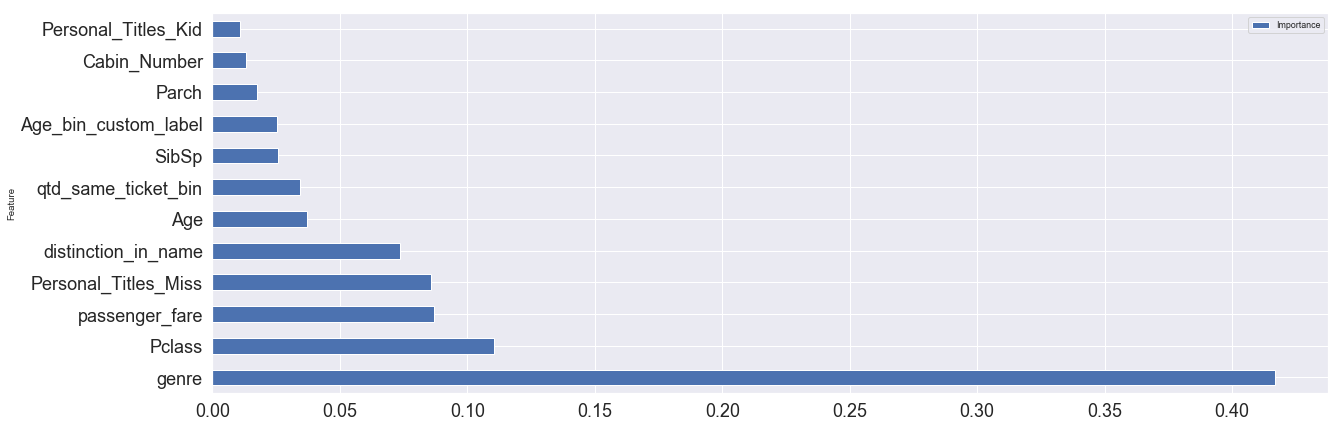

In [63]:
rfc = RandomForestClassifier(n_estimators=20, max_depth=4, random_state=101)
rfc.fit(df, y_train)

feature_importances = [(feature, score) for feature, score in zip(cols, rfc.feature_importances_)]

MDI = cols[rfc.feature_importances_>0.010]
print('Total features slected by Random Forest:',len(MDI))

g = pd.DataFrame(sorted(feature_importances, key=lambda x: -x[1])[:len(MDI)], columns=['Feature','Importance']).\
plot(x='Feature', kind='barh', figsize=(20,7), fontsize=18, grid=True)
plt.show()

### 3.4.2. Feature Selection by Mean Decrease Accuracy
The general idea is to permute the values of each feature and measure how much the permutation decreases the accuracy of the model. Clearly, for unimportant feature, the permutation should have little to no effect on model accuracy, while permuting important feature should significantly decrease it.

This method is not directly exposed in sklearn, but it is straightforward to implement it. Start record a baseline accuracy (classifier) or R2 score (regressor) by passing a validation set or the out-of-bag (OOB) samples through the random forest. Permute the column values of a single predictor feature and then pass all test samples back through the random forest and recompute the accuracy or R2. The importance of that feature is the difference between the baseline and the drop in overall accuracy or R2 caused by permuting the column. The permutation mechanism is much more computationally expensive than the mean decrease in impurity mechanism, but the results are more reliable.

The rfpimp package in the src dir provided it For Random Florest, let´s see:

17 features are selected.


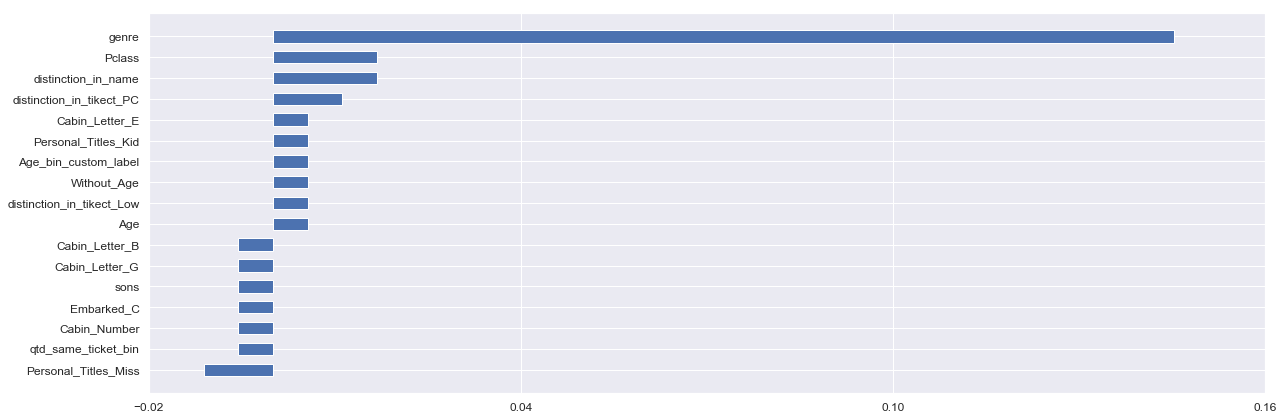

In [64]:
X_train, X_test, y, y_test = train_test_split(df, y_train , test_size=0.20,  random_state=101)

# Add column of random numbers
X_train['random'] = np.random.random(size=len(X_train))
X_test['random'] = np.random.random(size=len(X_test))

rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=5, n_jobs=-1, oob_score=True, random_state=101)
rf.fit(X_train, y)

imp = importances(rf, X_test, y_test, n_samples=-1) # permutation
MDA = imp[imp!=0].dropna().index
MDA = MDA.drop('random')
print('%d features are selected.' % len(MDA))
plot_importances(imp[imp!=0].dropna().drop('random'), figsize=(20,7))

### 3.4.3. Feature Selection by Permutation with Shadow Features
Boruta randomly permutes variables like Permutation Importance does, but performs on all variables at the same time and concatenates the shuffled features with the original ones. The concatenated result is used to fit the model.

Daniel Homola, who also wrote the Python version of Boruta, [BorutaPy](https://github.com/scikit-learn-contrib/boruta_py/blob/master/boruta/boruta_py.py), gave an wonderful overview of the Boruta algorithm in his blog post
"The shuffled features (a.k.a. shadow features) are basically noises with identical marginal distribution w.r.t the original feature. We count the times a variable performs better than the “best” noise and calculate the confidence towards it being better than noise (the p-value) or not. Features which are confidently better are marked “confirmed”, and those which are confidently on par with noises are marked “rejected”. Then we remove those marked features and repeat the process until all features are marked or a certain number of iteration is reached."

Although Boruta is a feature selection algorithm, we can use the order of confirmation/rejection as a way to rank the importance of features.

In [65]:
# NOTE BorutaPy accepts numpy arrays only, hence the .values attribute
X = df.values
y = y_train.values.ravel()

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
#rf = RandomForestClassifier(n_estimators=10, min_samples_leaf=5, n_jobs=-1, oob_score=True, random_state=101)
rf = ExtraTreesClassifier(n_estimators=100, max_depth=4, n_jobs=-1, oob_score=True, bootstrap=True, random_state=101)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=0, random_state=101)

# find all relevant features - 5 features should be selected
feat_selector.fit(X, y)

shadow = cols[feat_selector.support_]
# check selected features - first 5 features are selected
print('Features selected:',shadow)

# call transform() on X to filter it down to selected features
print('Data transformaded has %d features' % feat_selector.n_features_) #feat_selector.transform(X).shape[1])
print('Check the selector ranking:')
pd.concat([pd.DataFrame(cols, columns=['Columns']), 
           pd.DataFrame(feat_selector.ranking_, columns=['Rank'])], axis=1).sort_values(by=['Rank'])

Features selected: Index(['surname_Alone', 'Pclass', 'Age', 'SibSp', 'Parch',
       'qtd_same_ticket_bin', 'passenger_fare', 'distinction_in_name', 'sons',
       'relatives', 'Without_Age', 'Age_bin_custom_label', 'genre',
       'Cabin_Letter_B', 'Cabin_Letter_C', 'Cabin_Letter_E', 'Cabin_Letter_G',
       'Personal_Titles_Kid', 'Personal_Titles_Miss', 'Embarked_C',
       'Embarked_S', 'distinction_in_tikect_Low', 'distinction_in_tikect_PC'],
      dtype='object')
Data transformaded has 23 features
Check the selector ranking:


,Columns,Rank
0,surname_Alone,1
29,distinction_in_tikect_Low,1
28,Embarked_S,1
26,Embarked_C,1
23,Personal_Titles_Miss,1
22,Personal_Titles_Kid,1
21,Cabin_Letter_G,1
19,Cabin_Letter_E,1
17,Cabin_Letter_C,1
16,Cabin_Letter_B,1


### 3.4.4. Feature Selection by Gradient Boosting
For Kagglers, this part should be familiar due to the extreme popularity of XGBoost and LightGBM. Both packages implement more of the same measures (XGBoost has one more):

On the LightGBM model the importance is calculed from, if “split”, result contains numbers of times the feature is used in a model, if “gain”, result contains total gains of splits which use the feature.

On the [XGBoost](https://xgboost.readthedocs.io/en/latest/python/python_api.html) model the importance is calculed by:
- ‘weight’: the number of times a feature is used to split the data across all trees.
- ‘gain’: the average gain across all splits the feature is used in.
- ‘cover’: the average coverage across all splits the feature is used in.
- ‘total_gain’: the total gain across all splits the feature is used in.
- ‘total_cover’: the total coverage across all splits the feature is used in.

First measure is split-based and is very similar with the one given by for Gini Importance. But it doesn’t take the number of samples into account.

The second measure is gain-based. It’s basically the same as the Gini Importance implemented in R packages and in scikit-learn with Gini impurity replaced by the objective used by the gradient boosting model.

The cover, implemented exclusively in XGBoost, is counting the number of samples affected by the splits based on a feature.

get_score(fmap='', importance_type='weight')
Get feature importance of each feature. Importance type can be defined as:

The default measure of both XGBoost and LightGBM is the split-based one. I think this measure will be problematic if there are one or two feature with strong signals and a few features with weak signals. The model will exploit the strong features in the first few trees and use the rest of the features to improve on the residuals. The strong features will look not as important as they actually are. While setting lower learning rate and early stopping should alleviate the problem, also checking gain-based measure may be a good idea.

Note that these measures are purely calculated using training data, so there’s a chance that a split creates no improvement on the objective in the holdout set. This problem is more severe than in the random forest since gradient boosting models are more prone to over-fitting. 

Feature importance scores can be used for feature selection in scikit-learn.

This is done using the SelectFromModel class that takes a model and can transform a dataset into a subset with selected features.

This class can take a pre-trained model, such as one trained on the entire training dataset. It can then use a threshold to decide which features to select. This threshold is used when you call the transform() method on the SelectFromModel instance to consistently select the same features on the training dataset and the test dataset.

Thresh=0.000, n=32, Accuracy: 82.46%
Thresh=0.002, n=25, Accuracy: 82.46%
Thresh=0.003, n=24, Accuracy: 82.84%
Thresh=0.005, n=21, Accuracy: 82.84%
Thresh=0.007, n=20, Accuracy: 83.21%
Thresh=0.010, n=17, Accuracy: 83.21%
Thresh=0.011, n=14, Accuracy: 82.84%
Thresh=0.013, n=13, Accuracy: 83.58%
Thresh=0.016, n=12, Accuracy: 83.21%
Thresh=0.023, n=10, Accuracy: 82.84%
Thresh=0.028, n=9, Accuracy: 82.09%
Thresh=0.036, n=8, Accuracy: 82.09%
Thresh=0.039, n=7, Accuracy: 82.46%
Thresh=0.051, n=6, Accuracy: 82.09%
Thresh=0.062, n=5, Accuracy: 82.09%
Thresh=0.065, n=4, Accuracy: 83.21%
Thresh=0.080, n=3, Accuracy: 70.15%
Thresh=0.223, n=2, Accuracy: 69.03%
Thresh=0.270, n=1, Accuracy: 63.06%


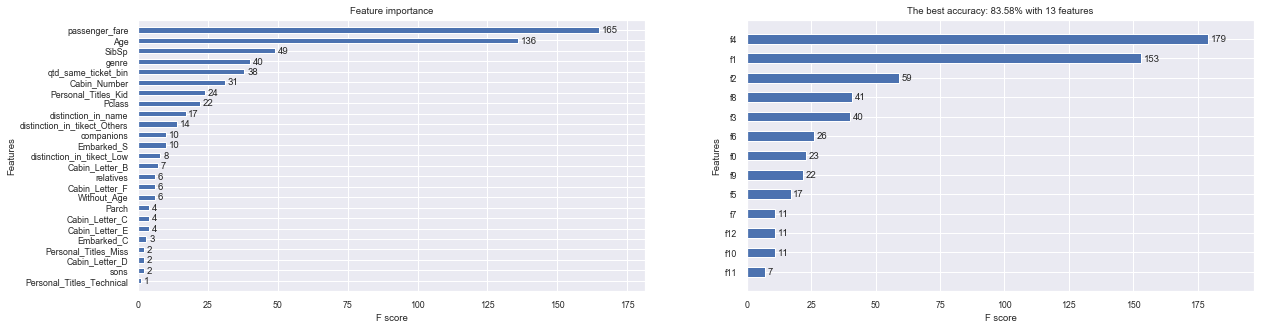

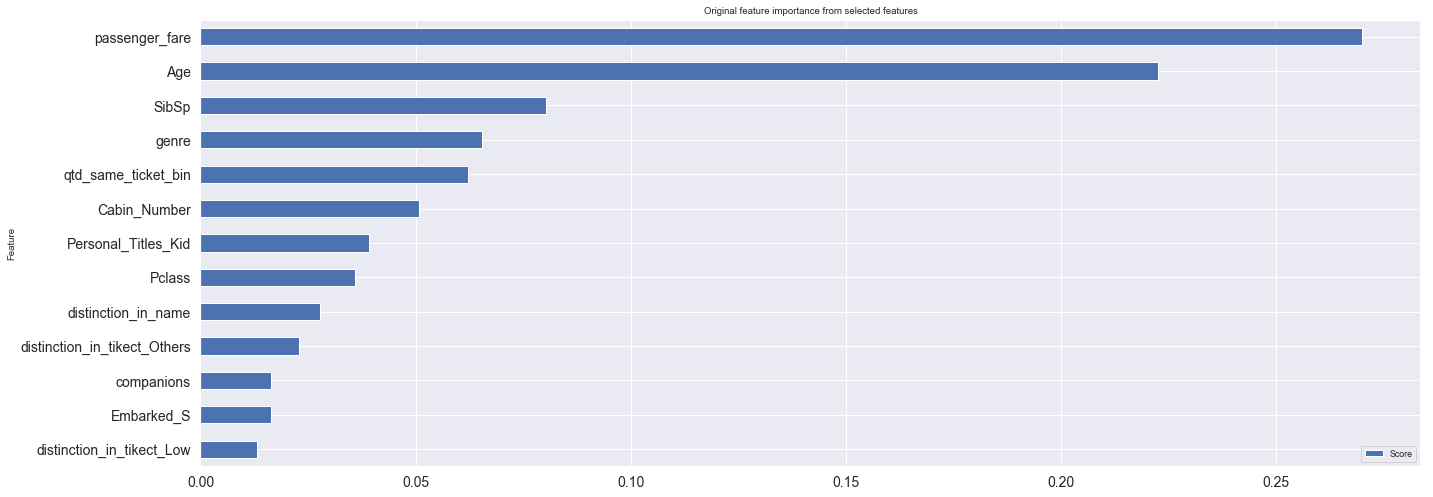

In [66]:
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

# split data into train and test sets
X_train, X_test, y, y_test = train_test_split(df, y_train, test_size=0.30, random_state=101)

# fit model on all training data
model = XGBClassifier(importance_type='gain', scale_pos_weight=((len(y)-y.sum())/y.sum()))
model.fit(X_train, y)
fig=plt.figure(figsize=(20,5))
ax = fig.add_subplot(121)
g = plot_importance(model, height=0.5, ax=ax)

# Using each unique importance as a threshold
thresholds = np.sort(np.unique(model.feature_importances_)) #np.sort(model.feature_importances_[model.feature_importances_>0])
best = 0
colsbest = 31
my_model = model
threshold = 0

for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier(importance_type='gain', scale_pos_weight=((len(y)-y.sum())/y.sum()))
    selection_model.fit(select_X_train, y)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh={:1.3f}, n={:d}, Accuracy: {:2.2%}".format(thresh, select_X_train.shape[1], accuracy))
    if (best <= accuracy):
        best = accuracy
        colsbest = select_X_train.shape[1]
        my_model = selection_model
        threshold = thresh
        
ax = fig.add_subplot(122)
g = plot_importance(my_model,height=0.5, ax=ax, 
                    title='The best accuracy: {:2.2%} with {:d} features'.\
                    format(best, colsbest))

feature_importances = [(score, feature) for score, feature in zip(model.feature_importances_, cols)]
XGBest = pd.DataFrame(sorted(sorted(feature_importances, reverse=True)[:colsbest]), columns=['Score', 'Feature'])
g = XGBest.plot(x='Feature', kind='barh', figsize=(20,7), fontsize=14, grid= True,
     title='Original feature importance from selected features')
plt.tight_layout(); plt.show()
XGBestCols = XGBest.iloc[:, 1].tolist()

### 3.4.5. Feature Selection by Regularized Models
Regularization is a method for adding additional constraints or penalty to a model, with the goal of preventing overfitting and improving generalization. Instead of minimizing a loss function E(X,Y), the loss function to minimize becomes E(X,Y)+α∥w∥, where w is the vector of model coefficients, ∥⋅∥ is typically L1 or L2 norm and α is a tunable free parameter, specifying the amount of regularization (so α=0 implies an unregularized model). The two widely used regularization methods are L1 and L2 regularization, also called lasso and ridge.

Regularized models are a powerful set of tool for feature interpretation and selection. Lasso produces sparse solutions and as such is very useful selecting a strong subset of features for improving model performance. Ridge on the other hand can be used for data interpretation due to its stability and the fact that useful features tend to have non-zero coefficients. Since the relationship between the response variable and features in often non-linear, basis expansion can be used to convert features into a more suitable space, while keeping the simple linear models fully applicable.

Let's see the SGDClassifier that have this concept implemented for classifications cases, and to address the skewness of our dataset in terms of labels we use the class_weight parameter of SGDCassifier and set it to "balanced":

17 features are selected.


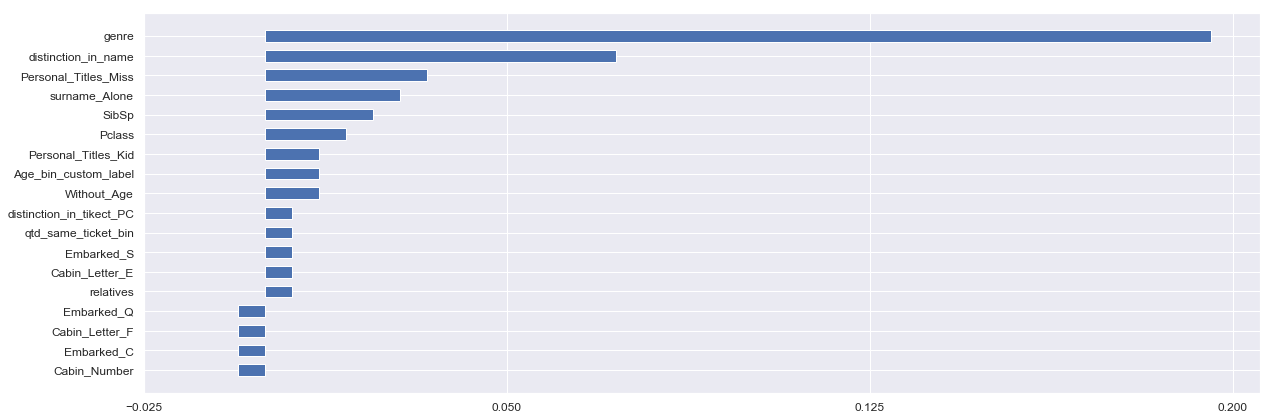

In [68]:
X_train, X_test, y, y_test = train_test_split(df, y_train , test_size=0.20,  random_state=101)

# Add column of random numbers
X_train['random'] = np.random.random(size=len(X_train))
X_test['random'] = np.random.random(size=len(X_test))

svm = SGDClassifier(penalty='elasticnet', class_weight='balanced', n_jobs = - 1, random_state=101)
svm.fit(X_train, y)

imp = importances(svm, X_test, y_test, n_samples=-1) # permutation
RM = imp[imp!=0].dropna().index
if 'random' in RM:
    RM.drop('random')
    
print('%d features are selected.' % len(MDA))
plot_importances(imp[imp!=0].dropna(), figsize=(20,7))

## 3.5. Combine Features Selection Methods:
As each machine learning model benefits from one or another set of features selected, depending on its own method, and our dataset does in fact present few features, since we first removed the collinear and multilinear with the highest correlation and the highest degree of FIV that represents risk for our model, now we can union all selected features in a unique set, and check what features are elected exclusively by a unique method.  

In [69]:
bcols = set(pv_cols).union(set(FRFE)).union(set(MDI)).union(set(MDA)).union(set(MBR)).union(set(SMcols)).union(set(RM)).\
        union(set(XGBestCols)).union(set(SBS))
print("Extra features select by RFE:", set(FRFE).difference(set(pv_cols).union(set(MDI)).union(set(MDA)).union(set(MBR)).union(set(RM)).\
                                                            union(set(SMcols)).union(set(XGBestCols)).union(set(SBS))), '\n')
print("Extra features select by pv_cols:", set(pv_cols).difference(set(FRFE).union(set(MDI)).union(set(MDA)).union(set(MBR)).union(set(SMcols)).\
                                              union(set(RM)).union(set(XGBestCols)).union(set(SBS))), '\n')
print("Extra features select by Statistical Methods:", set(SMcols).difference(set(pv_cols).union(set(FRFE)).union(set(MDI)).\
                                                         union(set(MDA)).union(set(MBR)).union(set(RM)).\
                                                        union(set(XGBestCols)).union(set(SBS))), '\n')
print("Extra features select by MDI:", set(MDI).difference(set(pv_cols).union(set(FRFE)).union(set(MDA)).union(set(MBR)).\
                                          union(set(SMcols)).union(set(RM)).union(set(XGBestCols)).union(set(SBS))), '\n')
print("Extra features select by MDA:", set(MDA).difference(set(pv_cols).union(set(FRFE)).union(set(MDI)).union(set(MBR)).\
                                          union(set(SMcols)).union(set(RM)).union(set(XGBestCols)).union(set(SBS))), '\n')
print("Extra features select by MBR:", set(MBR).difference(set(pv_cols).union(set(FRFE)).union(set(MDI)).union(set(MDA)).\
                                          union(set(SMcols)).union(set(RM)).union(set(XGBestCols)).union(set(SBS))), '\n')
print("Extra features select by RM:", set(RM).difference(set(pv_cols).union(set(FRFE)).union(set(MDI)).union(set(MDA)).\
                                          union(set(SMcols)).union(set(MBR)).union(set(XGBestCols)).union(set(SBS))), '\n')
print("Extra features select by XGBestCols:", set(XGBestCols).difference(set(pv_cols).union(set(FRFE)).union(set(MDI)).union(set(MDA)).\
                                          union(set(SMcols)).union(set(MBR)).union(set(RM)).union(set(SBS))), '\n')
print("Extra features select by SBS:", set(SBS).difference(set(pv_cols).union(set(FRFE)).union(set(MDI)).union(set(MDA)).\
                                          union(set(SMcols)).union(set(MBR)).union(set(RM)).union(set(XGBestCols))), '\n')
print("Intersection features:",set(MDI).intersection(set(SMcols)).intersection(set(FRFE)).intersection(set(pv_cols)).\
                                  intersection(set(RM)).intersection(set(MDA)).intersection(set(MBR)).\
                                  intersection(set(XGBestCols)).intersection(set(SBS)), '\n')
print('Total number of features selected:', len(bcols))
print(bcols)
print('\nFeatures removed if use the union of selections:',cols.difference(bcols))

Extra features select by RFE: set() 

Extra features select by pv_cols: {'Cabin_Letter_D'} 

Extra features select by Statistical Methods: {'Cabin_Letter_C'} 

Extra features select by MDI: set() 

Extra features select by MDA: set() 

Extra features select by MBR: {'parents', 'Personal_Titles_Royalty'} 

Extra features select by RM: {'surname_Alone'} 

Extra features select by XGBestCols: set() 

Extra features select by SBS: set() 

Intersection features: set() 

Total number of features selected: 31
{'distinction_in_name', 'Parch', 'companions', 'distinction_in_tikect_Others', 'Personal_Titles_Miss', 'Cabin_Number', 'Cabin_Letter_F', 'relatives', 'Embarked_C', 'surname_Alone', 'Age_bin_custom_label', 'Cabin_Letter_D', 'genre', 'sons', 'qtd_same_ticket_bin', 'Personal_Titles_Kid', 'Cabin_Letter_G', 'passenger_fare', 'parents', 'distinction_in_tikect_PC', 'Embarked_Q', 'Pclass', 'Cabin_Letter_E', 'distinction_in_tikect_Low', 'Embarked_S', 'Cabin_Letter_C', 'SibSp', 'Age', 'Cabin_Lette

## 3.6. Chose The Features From The Selection Methods:

As you can saw the methods chose some different features that,if we consider the intersection, there is nothing left, and if the union only removes one resource.As expected, we can made a unique strategy, the right chose depends on your proposal and the respective model that you will run. 

Since, we have few features, by the reason of don't consider the results of hot encode of surnames, we can try some models with different sets and check the influence in the results, llike we did on the methods that selecting based on accuracy of the model. In the other hand, we can make the feature selection as parte of the pipeline of the model and select features based on the best for the respective model. This is allows different strategies, including the use of methods for sparse data and thus evaluate the surnames, or methods that apply regularization in data to submit to models that don't have regularization terms.

For the submission, I already run multiple times and made choices to submit. Here for simplicity, I chose the results from the XGB to proceed.

I will public a new version, when I have include the features selections as part of the pipeline.

In [70]:
bcols = set(XGBestCols)

## 4. Additional Feature Engineering: Feature transformation
**Feature transformation** ([FT](http://scikit-learn.org/stable/data_transforms.html)) refers to family of algorithms that create new features using the existing features. These new features may not have the same interpretation as the original features, but they may have more discriminatory power in a different space than the original space. This can also be used for feature reduction. FT may happen in many ways, by simple/linear combinations of original features or using non-linear functions. Some common techniques for FT are:
- [Scaling](http://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling) or normalizing features (e.g.: StandardScaler, RobustSacaler and MinMaxScaler)
- Principle Component Analysis
- [Random Projection](http://scikit-learn.org/stable/modules/random_projection.html)
- Neural Networks
- SVM also transforms features internally.
- Transforming [categorical](http://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) features to numerical.

https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-6-feature-engineering-and-feature-selection-8b94f870706a


### 4.1. [Polynomial Features](http://scikit-learn.org/stable/modules/preprocessing.html#generating-polynomial-features) - Create Degree 3 of some Features
Often it’s useful to add complexity to the model by considering nonlinear features of the input data. A simple and common method to use is polynomial features, which can get features’ high-order and interaction terms. 

In [71]:
pf = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
res = pf.fit_transform(data[['Pclass', 'passenger_fare']])

#display(pd.DataFrame(pf.powers_, columns=['Pclass', 'passenger_fare']))
del res 

# We can contact the new res with data, but we need treat the items without interactions and power, 
# or if is few features it can generate and incorporate to data manually.
data['Pclass^2'] = data.Pclass**2
data['Plcass_X_p_fare'] = data.Pclass * data.passenger_fare
data['p_fare^2'] = data.passenger_fare**2

bcols.add('Pclass^2')
bcols.add('Plcass_X_p_fare')
bcols.add('p_fare^2')

### 4.2 Converting an existing column to a [category dtype](https://pandas.pydata.org/pandas-docs/stable/categorical.html)

In [72]:
data.Pclass = data.Pclass.astype('category')
data.genre = data.genre.astype('category')
data.distinction_in_tikect_Low = data.distinction_in_tikect_Low.astype('category')
data.distinction_in_tikect_Others = data.distinction_in_tikect_Others.astype('category')
data.Cabin_Letter_B = data.Cabin_Letter_B.astype('category')
data.Cabin_Letter_C = data.Cabin_Letter_C.astype('category')
data.Cabin_Letter_D = data.Cabin_Letter_D.astype('category')
data.Cabin_Letter_E = data.Cabin_Letter_E.astype('category')
data.Cabin_Letter_F = data.Cabin_Letter_F.astype('category')
data.Embarked_C = data.Embarked_C.astype('category')
data.Embarked_S = data.Embarked_S.astype('category')
data.Personal_Titles_Royalty = data.Personal_Titles_Royalty.astype('category')
data.Personal_Titles_Technical = data.Personal_Titles_Technical.astype('category')
data.Personal_Titles_Kid = data.Personal_Titles_Kid.astype('category')
data.Personal_Titles_Mrs = data.Personal_Titles_Mrs.astype('category')
data.Personal_Titles_Mr = data.Personal_Titles_Mr.astype('category')
data.Personal_Titles_Miss = data.Personal_Titles_Miss.astype('category')
data.Without_Age = data.Without_Age.astype('category')
data.distinction_in_name = data.distinction_in_name.astype('category')
data.relatives = data.relatives.astype('category')
data.sons = data.sons.astype('category')
data.companions = data.companions.astype('category')
data.surname_Alone = data.surname_Alone.astype('category')

### 4.3 Box cox transformation of highly skewed features
A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. 

Why does this matter?
- **Model bias and spurious interactions**: If you are performing a regression or any statistical modelling, this asymmetrical behavior may lead to a bias in the model. If a factor has a significant effect on the average, because the variability is much larger, many factors will seem to have a stronger effect when the mean is larger. This is not due, however, to a true factor effect but rather to an increased amount of variability that affects all factor effect estimates when the mean gets larger. This will probably generate spurious interactions due to a non-constant variation, resulting in a **very complex model** with many **spurious** and **unrealistic** interactions.
- **Normality is an important assumption for many statistical techniques**: such as individuals control charts, Cp/Cpk analysis, t-tests and analysis of variance (ANOVA). A substantial departure from normality will bias your capability estimates.

One solution to this is to transform your data into normality using a [Box-Cox transformation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html) means that you are able to run a broader number of tests.

At the core of the Box Cox transformation is an exponent, lambda (λ), which varies from -5 to 5. All values of λ are considered and the optimal value for your data is selected; The “optimal value” is the one which results in the best approximation of a normal distribution curve. The transformation of Y has the form:
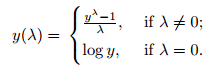

This test only works for positive data. However, Box and Cox did propose a second formula that can be used for negative y-values:
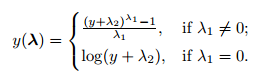
The formulae are deceptively simple. Testing all possible values by hand is unnecessarily labor intensive.

<p align='center'> Common Box-Cox Transformations 
</p>

| Lambda value (λ) | Transformed data (Y’) |
|------------------|-----------------------|
|        -3	       | Y-3 = 1/Y3            |
|        -2        | Y-2 = 1/Y2            |
|        -1        | Y-1 = 1/Y1            |
|       -0.5       | Y-0.5 = 1/(√(Y))      |
|         0        | log(Y)**              |
|        0.5       | Y0.5 = √(Y)           |
|         1        | Y1 = Y                |
|         2        | Y2                    |
|         3        | Y3                    |

\**Note: the transformation for zero is log(0), otherwise all data would transform to Y0 = 1.
The transformation doesn’t always work well, so make sure you check your data after the transformation with a normal probability plot or if the skew are reduced, tending to zero.

There are 6 higest skewed numerical features to box cox transform


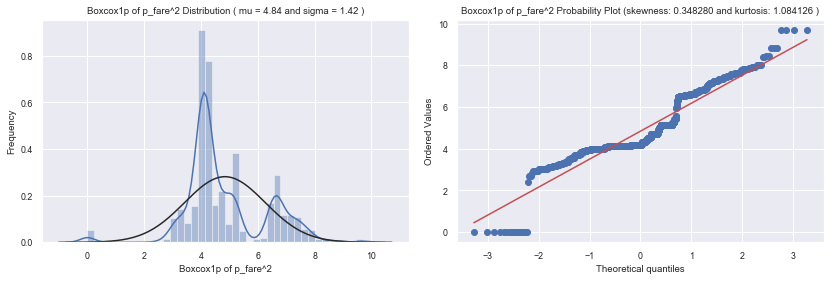

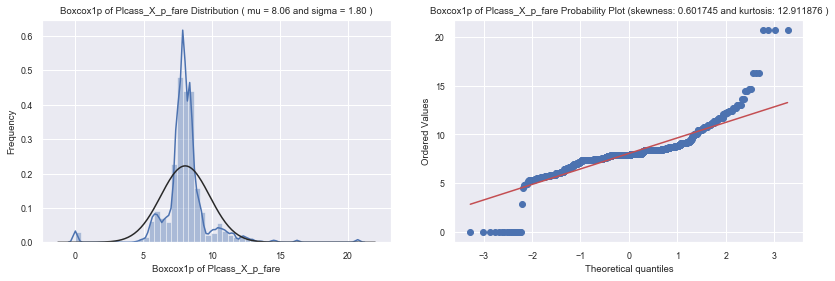

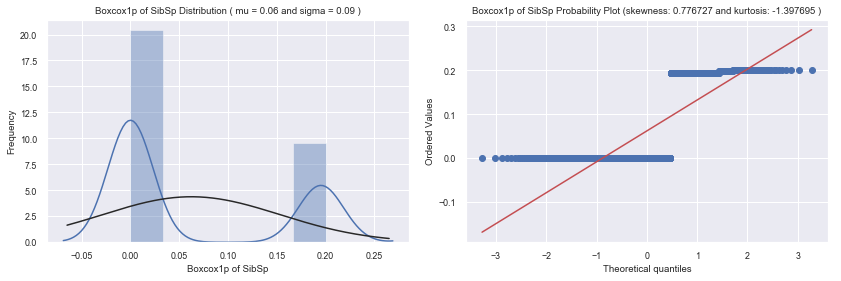

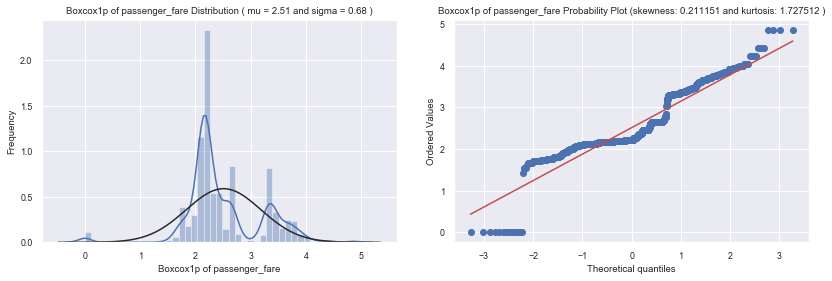

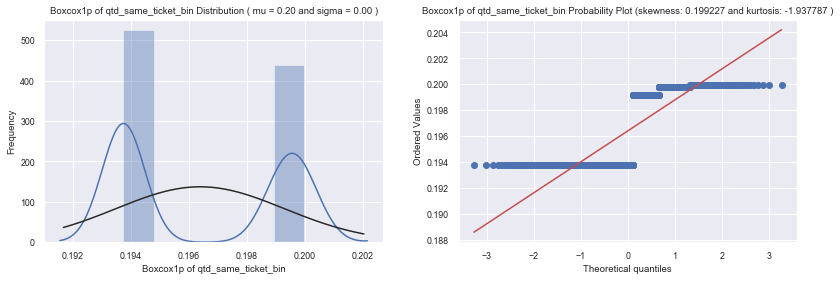

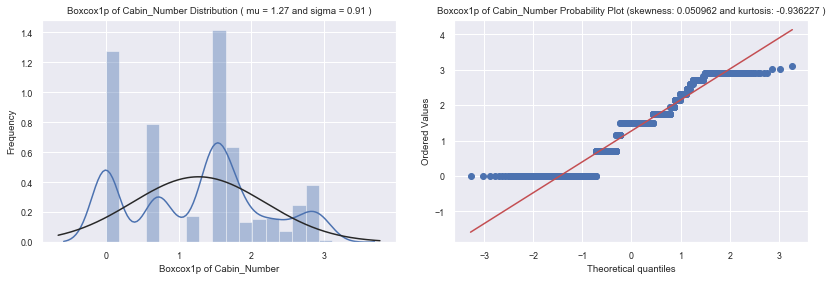

,Skew,New Skew
p_fare^2,10.198854,0.347880
Plcass_X_p_fare,4.275970,0.601055
SibSp,3.839814,0.775836
passenger_fare,3.041171,0.210909
qtd_same_ticket_bin,1.378407,0.198998
Cabin_Number,1.253198,0.050904


In [73]:
def QQ_plot(data, measure):
    fig = plt.figure(figsize=(12,4))

    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    #Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')

    #QQ plot
    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.\
                   format(data.skew(), data.kurt()), loc='center')

    plt.tight_layout()
    plt.show()

numeric_features = data.loc[:, bcols].dtypes[data.dtypes != "category"].index

skewed_features = data[numeric_features].apply(lambda x : skew (x.dropna())).sort_values(ascending=False)

#compute skewness
skewness = pd.DataFrame({'Skew' :skewed_features})   


# Get only higest skewed features
skewness = skewness[abs(skewness) > 0.7]
skewness = skewness.dropna()

print ("There are {} higest skewed numerical features to box cox transform".format(skewness.shape[0]))

l_opt = {}
for i, feat in enumerate(skewness.index):
    if feat=='Parch':
        l_opt[feat] = 0
    elif feat=='Cabin_Number':
        l_opt[feat] = 0.15
    if feat=='Plcass_X_p_fare':
        l_opt[feat] = 0.5
    elif feat=='SibSp':
        l_opt[feat] = -5
    elif feat=='p_fare^2':
        l_opt[feat] = 0.0001
    elif feat=='passenger_fare':
        l_opt[feat] = 0.0001
    elif feat=='qtd_same_ticket_bin':
        l_opt[feat] = -5
    else:
        l_opt[feat] = 0.1
        
    
for i, feat in enumerate(skewness.index):
    data[feat] = boxcox1p(data[feat], l_opt[feat])

skewed_features2 = data[numeric_features].apply(lambda x : skew (x.dropna())).sort_values(ascending=False)

#compute skewness
skewness2 = pd.DataFrame({'New Skew' :skewed_features2})   

for feat in skewness.index:
    QQ_plot(data[feat], ('Boxcox1p of {}'.format(feat)))

pd.concat([skewness, skewness2], axis=1).dropna().sort_values(by=['Skew'], ascending=False)

### 4.4. Compressing Data via Dimensionality Reduction
##### 4.4.1. PCA evaluetion:
**Principal component analysis** ([PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. If there are n observations with p variables, then the number of distinct principal components is `min(n-1,p)`. This transformation is defined in such a way that the first principal component has the largest possible variance, and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors are an uncorrelated orthogonal basis set. PCA is sensitive to the relative scaling of the original variables.
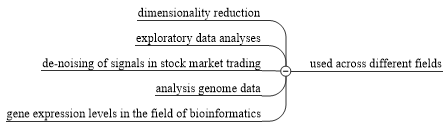

Let's see how PCA can reduce the dimensionality of our dataset with minimum of lose information:

In [74]:
pca = PCA(random_state=101, whiten=True).fit(df) # whiten=True

for i in np.arange(df.shape[1], 0, -1):
    variance_ratio = sum(pca.explained_variance_ratio_[:i])*100
    if variance_ratio >= 98.0:
        print('{:6.4f}% from {:3}'.format(variance_ratio, i))
    else: 
        break

#del df, explorator, all_data

100.0000% from  32
99.9998% from  31
99.9991% from  30
99.9977% from  29
99.9958% from  28
99.9926% from  27
99.9885% from  26
99.9839% from  25
99.9784% from  24
99.9716% from  23
99.9618% from  22
99.9508% from  21
99.9380% from  20
99.9237% from  19
99.9072% from  18
99.8886% from  17
99.8685% from  16
99.8425% from  15
99.8098% from  14
99.7747% from  13
99.7335% from  12
99.6791% from  11
99.6129% from  10
99.5398% from   9
99.4533% from   8
99.3607% from   7
99.2649% from   6
99.1478% from   5
98.9846% from   4
98.3320% from   3


From the results, we can see that PCA with 4 features lose only 0.8522% of variance of our original dataset. Let's see how much we can obtain with only three features:

3 fatures explaim: 98.33%


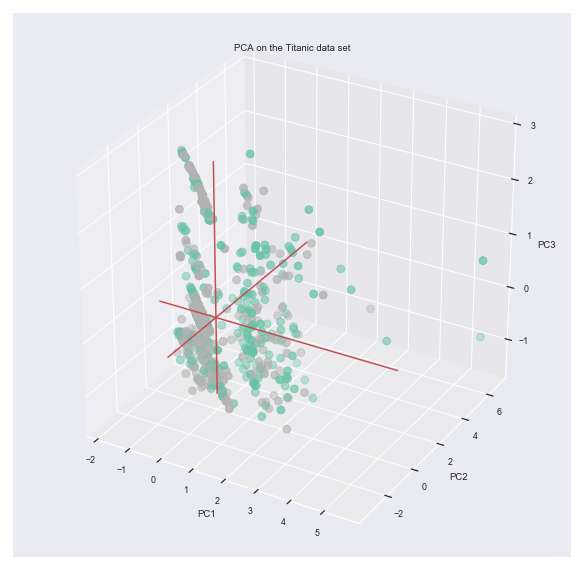

In [75]:
print('3 fatures explaim: {:2.2%}'.format(sum(pca.explained_variance_ratio_[:3])))
#sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=y_train)
my_color=y_train.astype('category').cat.codes

# Store results of PCA in a data frame
result=pd.DataFrame(pca.transform(df), columns=['PCA%i' % i for i in range(df.shape[1])], index=df.index)

# Plot initialisation
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=my_color, cmap="Set2_r", s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the Titanic data set")
plt.show()

In that case, although we can see some separation in planes, you can see that we lose too much information if we consider only the 3 first PCAs.

##### 4.4.2. Linear Discriminant Analysis (LDA):

As a supervised dimensionality reduction technique for maximizing class separability. LDA can be used as a technique for feature extraction to increase the computational efficiency and reduce the degree of over-fitting due to the curse of dimensionality in nonregularized models. 

So, the goal is to find the feature subspace that optimizes class separability.
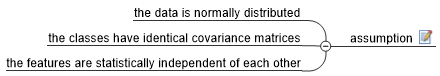
However, even if one or more of those assumptions are slightly violated, LDA for dimensionality reduction can still work reasonably well.


**Some Important Parameters:**
solver : string, optional
    Solver to use, possible values:
      - 'svd': Singular value decomposition (default).
        Does not compute the covariance matrix, therefore this solver is
        recommended for data with a large number of features.
      - 'eigen': Eigenvalue decomposition, can be combined with shrinkage.

shrinkage : string or float, optional
    Shrinkage parameter, possible values:
      - None: no shrinkage (default).
      - 'auto': automatic shrinkage using the Ledoit-Wolf lemma.
      - float between 0 and 1: fixed shrinkage parameter.

    Note that shrinkage works only with 'lsqr' and 'eigen' solvers.

LR Training Accuracy: 84.11%
LR Accuracy: 82.84%
________________________________________

Apply LDA:

Number of features after LDA: 1
LR Training Accuracy With LDA: 83.63%
LR Accuracy With LDA: 82.46%


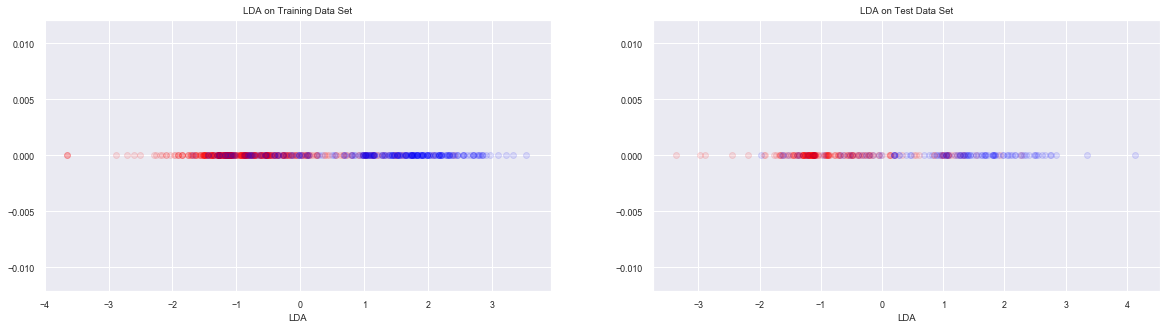

In [76]:
X_train , X_test, y, y_test = train_test_split(df , y_train, test_size=0.3, random_state=0)

lr = LogisticRegression(class_weight='balanced', random_state=101)
lr = lr.fit(X_train, y)
print('LR Training Accuracy: {:2.2%}'.format(accuracy_score(y, lr.predict(X_train))))
y_pred = lr.predict(X_test)
print('LR Accuracy: {:2.2%}'.format(accuracy_score(y_test, y_pred)))
print('_' * 40)
print('\nApply LDA:\n')
lda = LDA(store_covariance=True)
X_train_lda = lda.fit_transform(X_train, y)
#X_train_lda = pd.DataFrame(X_train_lda)

print('Number of features after LDA:',X_train_lda.shape[1])
lr = LogisticRegression(class_weight='balanced', random_state=101)
lr = lr.fit(X_train_lda, y)
print('LR Training Accuracy With LDA: {:2.2%}'.format(accuracy_score(y, lr.predict(X_train_lda))))
X_test_lda = lda.transform(X_test)
y_pred = lr.predict(X_test_lda)
print('LR Accuracy With LDA: {:2.2%}'.format(accuracy_score(y_test, y_pred)))

fig = plt.figure(figsize=(20,5))
fig.add_subplot(121)
plt.scatter(X_train_lda[y==0, 0], np.zeros((len(X_train_lda[y==0, 0]),1)), color='red', alpha=0.1)
plt.scatter(X_train_lda[y==1, 0], np.zeros((len(X_train_lda[y==1, 0]),1)), color='blue', alpha=0.1)
plt.title('LDA on Training Data Set')
plt.xlabel('LDA')
fig.add_subplot(122)
plt.scatter(X_test_lda[y_test==0, 0], np.zeros((len(X_test_lda[y_test==0, 0]),1)), color='red', alpha=0.1)
plt.scatter(X_test_lda[y_test==1, 0], np.zeros((len(X_test_lda[y_test==1, 0]),1)), color='blue', alpha=0.1)
plt.title('LDA on Test Data Set')
plt.xlabel('LDA')

plt.show()

As you can saw, in this data set we can get basically the same results after LDA, with lose only 0.48% at training and 0.38% at test, but reduce the difference in 0.10%. 

The LDA returns a total of components equal to the number of class minus 1, or less if you define the n_components less than the number of classes. Since our case is binary classification, we only have one column after applying the LDA. 

For we can have another visualization, a small trick to having two componets as a return is to fit some rows to X with a not common in their training observations, in theat case with -0.1 for example, and the same number of rows with -1 to y. Let's see it:

Artficial training 20 observations
LR Training Accuracy: 83.98%
LR Accuracy: 81.72%
________________________________________

Apply LDA:

Number of features after LDA: 2
Number test observations predit as -1: 0
LR Training Accuracy With LDA: 84.60%
LR Accuracy With LDA: 82.09%


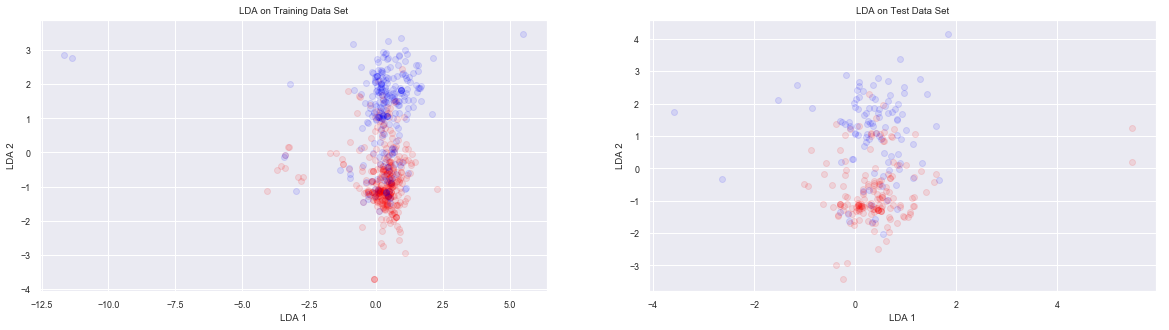

In [77]:
X_train , X_test, y, y_test = train_test_split(df , y_train, test_size=0.3, random_state=0)

X_train = X_train.append(pd.DataFrame(-np.ones((20,32))/10, columns = X_train.columns), ignore_index=True)
y = y.append(pd.Series(-np.ones((20))), ignore_index=True)

lr = LogisticRegression(class_weight='balanced', random_state=101)
lr = lr.fit(X_train, y)

print('Artficial training %d observations' % X_train.Age[y==-1].count())
print('LR Training Accuracy: {:2.2%}'.format(accuracy_score(y, lr.predict(X_train))))
y_pred = lr.predict(X_test)
print('LR Accuracy: {:2.2%}'.format(accuracy_score(y_test, y_pred)))

print('_' * 40)
print('\nApply LDA:\n')
lda = LDA(store_covariance=True)
X_train_lda = lda.fit_transform(X_train, y)

print('Number of features after LDA:',X_train_lda.shape[1])
print('Number test observations predit as -1:', len(X_test_lda[y_test==-1, :]))
lr = LogisticRegression(class_weight='balanced', random_state=101)
lr = lr.fit(X_train_lda, y)
print('LR Training Accuracy With LDA: {:2.2%}'.format(accuracy_score(y, lr.predict(X_train_lda))))
X_test_lda = lda.transform(X_test)
y_pred = lr.predict(X_test_lda)
print('LR Accuracy With LDA: {:2.2%}'.format(accuracy_score(y_test, y_pred)))

fig = plt.figure(figsize=(20,5))
fig.add_subplot(121)
plt.scatter(x=X_train_lda[y==0, 0], y=X_train_lda[y==0, 1], color='red', alpha=0.1)
plt.scatter(x=X_train_lda[y==1, 0], y=X_train_lda[y==1, 1], color='blue', alpha=0.1)
plt.title('LDA on Training Data Set')
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')

fig.add_subplot(122)
plt.scatter(x=X_test_lda[y_test==0, 0], y=X_test_lda[y_test==0, 1], color='red', alpha=0.1)
plt.scatter(x=X_test_lda[y_test==1, 0], y=X_test_lda[y_test==1, 1], color='blue', alpha=0.1)
plt.title('LDA on Test Data Set')
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')

plt.show()

##### 4.4.3. Nonlinear dimensionality reduction via kernel principal component analysis:

Many machine learning algorithms make assumptions about the linear separability of the input data. If we are dealing with nonlinear problems, which is more common in real cases, linear transformation techniques for dimensionality reduction like PCA and LDA, may not be the best choice. Using kernel PCA to transform nonlinear data onto a new, lower-dimensional subspace that is suitable for linear classifiers.

In what way, with ***kernel PCA*** we perform a **nonlinear mapping** that transforms the data onto a **higher-dimensional space** and use **standard PCA** in this higher-dimensional space to **project** the data **back onto a lower-dimensional space** where the samples can be separated by a linear classifier. However, one downside of this approach is that it is ***computationally very expensive***.

Using the ***kernel trick***, we can compute the similarity between two high-dimension feature vectors in the original feature space. In other words, what we obtain after kernel PCA are the samples already projected onto the respective components.

The most commonly used kernels
  - The polynomial kernel.
  - The hyperbolic tangent (sigmoid) kernel.
  - The Radial Basis Function (RBF) or Gaussian kernel.

Scikit-learn implements a **[kernel PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html) class** and also implements **[manifold](http://scikit-learn.org/stable/modules/manifold.html)**, a class with advanced techniques for nonlinear dimensionality reduction. 

Let's start and see if kernel PCA can help with our data:

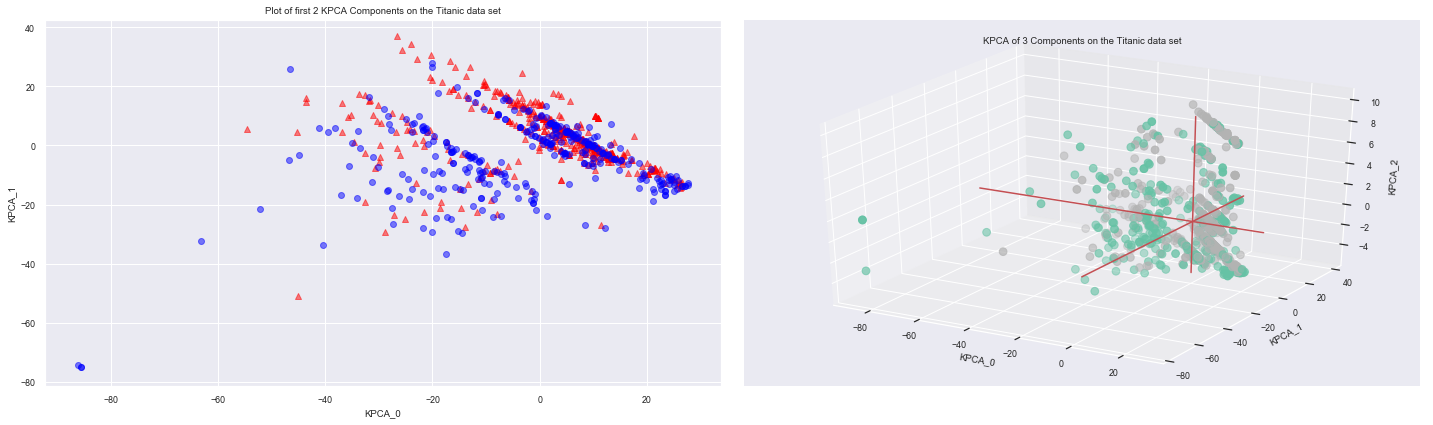


Logistic Regression over data without transformation:
_____________________________________________________

LR Training Accuracy: 84.11%
LR Test Accuracy: 82.84%

Apply KPCA:
_____________________________________________________
Number of features after KPCA: 338
LR Training Accuracy: 84.11%
LR Test Accuracy: 82.84%


In [78]:
'''
Some important parameters:
--------------------------
n_components : int, default=None. Number of components. If None, all non-zero components are kept.

eigen_solver : string ['auto'|'dense'|'arpack'], default='auto'
    Select eigensolver to use. If n_components is much less than the number of training samples, arpack may be more efficient
    than the dense eigensolver.
    
kernel : "linear" | "poly" | "rbf" | "sigmoid" | "cosine" | "precomputed". Kernel. Default="linear".

gamma : float, default=1/n_features. Kernel coefficient for rbf, poly and sigmoid kernels. Ignored by other kernels.

degree : int, default=3. Degree for poly kernels. Ignored by other kernels.

coef0 : float, default=1. Independent term in poly and sigmoid kernels. Ignored by other kernels.
'''
import plotly.graph_objs as go

n_components = 3
kernel = 'linear' 
degree = 3
kpca = KernelPCA(n_components = n_components, degree = degree, random_state = 101, 
                kernel = kernel, eigen_solver='arpack')
X_kpca = kpca.fit_transform(df)

# Plot first two KPCA components
fig = plt.figure(figsize=(20,6))
ax  = fig.add_subplot(121)
plt.scatter(x = X_kpca[y_train==0, 0], y = X_kpca[y_train==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(x = X_kpca[y_train==1, 0], y = X_kpca[y_train==1, 1], color='blue', marker='o', alpha=0.5)
ax.set_xlabel("KPCA_0")
ax.set_ylabel("KPCA_1")
ax.set_title("Plot of first 2 KPCA Components on the Titanic data set")

my_color=y_train.astype('category').cat.codes

# Store results of PCA in a data frame
result=pd.DataFrame(X_kpca, columns=['KPCA%i' % i for i in range(n_components)], index=df.index)

# Plot initialisation
ax = fig.add_subplot(122, projection='3d')
ax.scatter(result['KPCA0'], result['KPCA1'], result['KPCA2'], c=my_color, cmap="Set2_r", s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result['KPCA0']), max(result['KPCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['KPCA1']), max(result['KPCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['KPCA2']), max(result['KPCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("KPCA_0")
ax.set_ylabel("KPCA_1")
ax.set_zlabel("KPCA_2")
ax.set_title("KPCA of 3 Components on the Titanic data set")
plt.tight_layout(); plt.show()

X_train , X_test, y, y_test = train_test_split(df , y_train, test_size=0.3, random_state=0)

lr = LogisticRegression(class_weight='balanced', random_state=101)
lr = lr.fit(X_train, y)
print('\nLogistic Regression over data without transformation:\n' + '_' * 53 + '\n')
print('LR Training Accuracy: {:2.2%}'.format(accuracy_score(y, lr.predict(X_train))))
y_pred = lr.predict(X_test)
print('LR Test Accuracy: {:2.2%}'.format(accuracy_score(y_test, y_pred)))

print('\nApply KPCA:\n' + '_' * 53)
kpca = KernelPCA(kernel = kernel, random_state = 101, degree = degree, eigen_solver='arpack')#, n_components = 25)
X_train_kpca = kpca.fit_transform(X_train)
print('Number of features after KPCA:', X_train_kpca.shape[1])
lr = LogisticRegression(class_weight='balanced', random_state=101)
lr = lr.fit(X_train_kpca, y)
print('LR Training Accuracy: {:2.2%}'.format(accuracy_score(y, lr.predict(X_train_kpca))))
X_test_kpca = kpca.transform(X_test)
y_pred = lr.predict(X_test_kpca)
print('LR Test Accuracy: {:2.2%}'.format(accuracy_score(y_test, y_pred)))

Although the algorithm is admittedly exhaustive, as we have few data it runs very well, even using a single core.

So, instead of proceeding with a hyper parameterization via grid search, I chose to run manually with some variations to see the graphs and results on acuricity. I leave the best result I got, but if you want you can proceed with play it and check for yourself.

My conclusions are:
- With liner solver we don't see difference in accuracy, but it is possible to reduce the number of features to 25.
- With poly solver with 3rd degree I saw some improvement of accuracy in training and a small worsening in test, but this without defining the number of components. From the 4th grade we have overfitting.
- With rbf solver we have overfitting.
- With sigmoid or cosine the accuracy is the worst.

So applying nonlinear transformations to all of these data may not be the best, and it's important checked it against your model's performance. Also, as you may notice these transformations are subject to hyperparametrization, then, you should not ignore this if your case is computationally costs

Since we have a very different selection of resource selection methods, from the results it may be interesting keeping only the removal of collinear, multicolinear and one-hot encode results from surnames, and apply the LDA to linear models, and we can still improve the results through hyperparameterization and cross-validation.

In [79]:
Test_ID = data.PassengerId[data.Survived<0]
y_train = data.Survived[data.Survived>=0]
train = data.loc[data.Survived>=0, list(cols)]
test = data.loc[data.Survived<0, list(cols)]

## 5.  Modeling - Hiperparametrization
First, we strat to looking at different approaches to implement classifiers models, and use hiperparametrization, cross validattion and compare the results between diferents erros measures.

The standard error of the coefficient (std err) indicates the precision of the coefficient estimates. Smaller values represent more reliable estimates.

When you run two models to chek the effects of multicollinearity, ever compare the Summary of Model statistics between the two models and you’ll notice that Pseudo R-squ. and the others are all identical, if the effects is None or minimal. In that case multicollinearity doesn’t affect how well the model fits. In fact, if you want to use the model to make predictions, both models produce identical results for fitted values and prediction intervals!

### 5.1. Simplify Get Results:

In [80]:
def get_results(model, name, results=None, data=train, reasume=False):
    gs = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=3)

    gs = gs.fit(data, y_train)
    print('Mean Best Accuracy: {:2.2%}'.format(gs.best_score_))
    print(gs.best_params_,'\n')
    best = gs.best_estimator_

    y_pred = best.predict(data)
    meu.display_model_performance_metrics(true_labels=y_train, predicted_labels=y_pred)

    print('\n\n              ROC AUC Score: {:2.2%}'.format(roc_auc_score(y_true=y_train, y_score=y_pred)))
    if hasattr(best, 'predict_proba'):
            prob = best.predict_proba(data)
            score_roc = prob[:, prob.shape[1]-1] 
            prob = True
    elif hasattr(best, 'decision_function'):
            score_roc = best.decision_function(data)
            prob = False
    else:
            raise AttributeError("Estimator doesn't have a probability or confidence scoring system!")
    fpr, tpr, thresholds = roc_curve(y_true=y_train, y_score=score_roc)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.plot(fpr, tpr, 'b', label='AUC = {:2.2%}'.format(roc_auc))
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.show()

    r1 = pd.DataFrame([(name, prob, gs.best_score_, np.round(accuracy_score(y_train, y_pred), 4), 
                        roc_auc_score(y_true=y_train, y_score=y_pred), roc_auc)], 
                      columns = ['Model', 'Prob', 'CV Accuracy', 'Acc All', 'ROC AUC Score', 'ROC Area'])
    
    if reasume:
        results = r1
    else:
        results = pd.concat([results, r1], axis=0)

    return results, gs

 
### 5.2 [Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
This class implements regularized logistic regression using the 'liblinear' library, 'newton-cg', 'sag' and 'lbfgs' solvers. It can handle both dense and sparse input. 

**Adtional Parameters**
 - class_weight : dict or 'balanced', default: None
   The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as ``n_samples / (n_classes * np.bincount(y))``.

   For how class_weight works: It penalizes mistakes in samples of class[i] with class_weight[i] instead of 1. So higher class-weight means you want to put more emphasis on a class. For example, our class 0 is 1.24 times more frequent than class 1. So you should increase the class_weight of class 1 relative to class 0, say {1: 0.6, 0: 0.4}. If the class_weight doesn't sum to 1, it will basically change the regularization parameter.

   "balanced" basically means replicating the smaller class until you have as many samples as in the larger one, but in an implicit way.
   

 - warm_start : bool, default: False. Useless for liblinear solver.
 - ``'clf__multi_class' : ['ovr', 'multinomial']`` for ``'clf__solver': ['newton-cg', 'sag', 'lbfgs']``

**Attributes:**
 - coef_ : array, shape (1, n_features) or (n_classes, n_features)
 - intercept_ : array, shape (1,) or (n_classes,)
 - n_iter_ : array, shape (n_classes,) or (1, )

**See also:**
 - SGDClassifier : incrementally trained logistic regression (when given the parameter ``loss="log"``).
 - sklearn.svm.LinearSVC : learns SVM models using the same algorithm.

Fitting 5 folds for each of 304 candidates, totalling 1520 fits


[Parallel(n_jobs=3)]: Done 110 tasks      | elapsed:    4.1s
[Parallel(n_jobs=3)]: Done 1010 tasks      | elapsed:   17.3s
[Parallel(n_jobs=3)]: Done 1520 out of 1520 | elapsed:   24.2s finished


Mean Best Accuracy: 81.48%
{'clf__C': 0.008, 'clf__class_weight': 'balanced', 'clf__max_iter': 4, 'clf__penalty': 'l2', 'clf__solver': 'sag', 'clf__tol': 0.001} 

Model Performance metrics:
------------------------------
Accuracy:  80.92% 
Precision: 81.30% 
Recall:    80.92% 
F1 Score:  81.04% 

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          1       0.73      0.79      0.76       342
          0       0.86      0.82      0.84       549

avg / total       0.81      0.81      0.81       891


Prediction Confusion Matrix:
------------------------------
          Predicted:     
                   1    0
Actual: 1        270   72
        0         98  451


              ROC AUC Score: 80.55%


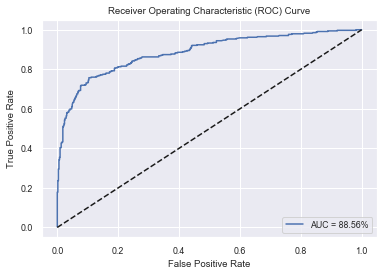

In [81]:
p_lr = Pipeline([
        ('scl', StandardScaler()), 
        ('lda', LDA(store_covariance=True)),
        ('clf', LogisticRegression(random_state=101))])  

# a list of dictionaries to specify the parameters that we'd want to tune
C =  [0.008, 0.007, 0.009, 0.01]#, 0.1, 1.0, 10.0, 100.0, 1000.0]
tol = [0.001, 0.003, 0.002, 0.005] # [1e-06, 5e-07, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01]

param_grid =\
    [{'clf__C': C
     ,'clf__solver': ['liblinear', 'saga'] 
     ,'clf__penalty': ['l1', 'l2']
     ,'clf__tol' : tol 
     ,'clf__class_weight': ['balanced']
},
    {'clf__C': C
     ,'clf__max_iter': [3, 9, 2, 7, 4]
     ,'clf__solver': ['newton-cg', 'sag', 'lbfgs']
     ,'clf__penalty': ['l2']
     ,'clf__tol' : tol 
     ,'clf__class_weight': ['balanced'] 
}]

results, lr = get_results(p_lr, 'LR', reasume=True)

### 5.3. [SGDClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)

This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate). SGD allows minibatch (online/out-of-core) learning, see the partial_fit method. For best results using the default learning rate schedule, the data should have zero mean and unit variance.

This implementation works with data represented as dense or sparse arrays of floating point values for the features. The model it fits can be controlled with the loss parameter; by default, it fits a linear support vector machine (SVM).

The regularizer is a penalty added to the loss function that shrinks model parameters towards the zero vector using either the squared euclidean norm L2 or the absolute norm L1 or a combination of both (Elastic Net). If the parameter update crosses the 0.0 value because of the regularizer, the update is truncated to 0.0 to allow for learning sparse models and achieve online feature selection.

**Parameters:**

***loss:*** 
 - Classifier: hinge, log, modified_huber, squared_hinge, perceptron
   - Defaults to ‘hinge’, which gives a linear SVM. 
   - The ‘log’ loss gives logistic regression, a probabilistic classifier. 
   - ‘modified_huber’ is another smooth loss that brings tolerance to outliers as well as probability estimates. 
   - ‘squared_hinge’ is like hinge but is quadratically penalized. 
   - ‘perceptron’ is the linear loss used by the perceptron algorithm. 
 - regression: squared_loss, huber, epsilon_insensitive, squared_epsilon_insensitive

***penalty***: The penalty (aka regularization term) to be used. Defaults to ‘l2’ which is the standard regularizer for linear SVM models. ‘l1’ and ‘elasticnet’ might bring sparsity to the model (feature selection) not achievable with ‘l2’.

***alpha***: Constant that multiplies the regularization term. Defaults to 0.0001 Also used to compute learning_rate when set to 'optimal'.

***l1_ratio***: The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1. l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1. Defaults to 0.15.

***tol***: The stopping criterion. If it is not None, the iterations will stop when (loss > previous_loss - tol).Defaults to 1e-3 from 0.21.

***learning_rate***:
- ‘constant’: eta = eta0
- ‘optimal’: eta = 1.0 / (alpha * (t + t0)) [default]
- ‘invscaling’: eta = eta0 / pow(t, power_t)
  where t0 is chosen by a heuristic proposed by Leon Bottou.

***eta0***: The initial learning rate for the ***constant*** or ***invscaling*** schedules. The default value is 0.0 as eta0 is not used by the default schedule ‘optimal’.

***power_t***: The exponent for inverse scaling learning rate [default 0.5].

***class_weight***: dict, {class_label: weight} or “balanced” or None, optional
 - The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))


Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=3)]: Done 110 tasks      | elapsed:    3.8s
[Parallel(n_jobs=3)]: Done 1010 tasks      | elapsed:   16.1s
[Parallel(n_jobs=3)]: Done 1500 out of 1500 | elapsed:   22.6s finished


Mean Best Accuracy: 81.93%
{'clf__alpha': 0.004, 'clf__class_weight': 'balanced', 'clf__loss': 'hinge', 'clf__penalty': 'l1', 'clf__tol': 1e-08} 

Model Performance metrics:
------------------------------
Accuracy:  80.47% 
Precision: 81.23% 
Recall:    80.47% 
F1 Score:  80.65% 

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          1       0.72      0.81      0.76       342
          0       0.87      0.80      0.83       549

avg / total       0.81      0.80      0.81       891


Prediction Confusion Matrix:
------------------------------
          Predicted:     
                   1    0
Actual: 1        277   65
        0        109  440


              ROC AUC Score: 80.57%


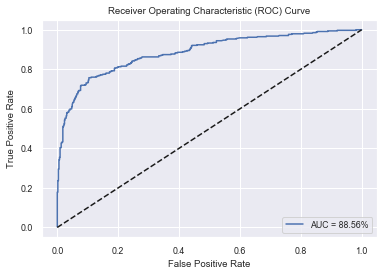

In [83]:
# train and tune a support vector machine (SVM) pipeline
p_svm = Pipeline([
        ('scl', StandardScaler()), 
        ('lda', LDA(store_covariance=True)),
        ('clf', SGDClassifier(random_state=101))])

# a list of dictionaries to specify the parameters that we'd want to tune
alpha = [4e-03, 5e-03, 6e-03, 1e-03]
tol = [1e-08, 1e-07, 5e-09]

param_grid =\
    [{'clf__loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']
     ,'clf__tol': tol
     ,'clf__alpha': alpha
     ,'clf__penalty': ['l2', 'l1']
     ,'clf__class_weight' : ['balanced'] 
     },
    {'clf__loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron']
     ,'clf__tol': tol
     ,'clf__alpha': alpha
     ,'clf__penalty': ['elasticnet']
     ,'clf__l1_ratio' : [0.3, 0.5, 0.1]
     ,'clf__class_weight' : ['balanced'] 
     }]

results, svm = get_results(p_svm, 'svm', results)

### 5.4. [Linear Support Vector Classification](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)
Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

This class supports both dense and sparse input and the multiclass support is handled according to a one-vs-the-rest scheme.

The combination of penalty='l1' and loss='hinge' is not supported, and penalty='l2' and loss='hinge' needs dual=True.

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=3)]: Done 115 tasks      | elapsed:    3.7s
[Parallel(n_jobs=3)]: Done 535 out of 540 | elapsed:    9.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done 540 out of 540 | elapsed:    9.0s finished


Mean Best Accuracy: 80.47%
{'clf__C': 0.5, 'clf__class_weight': 'balanced', 'clf__dual': True, 'clf__loss': 'hinge', 'clf__max_iter': 15, 'clf__penalty': 'l2', 'clf__tol': 1e-06} 

Model Performance metrics:
------------------------------
Accuracy:  81.71% 
Precision: 81.84% 
Recall:    81.71% 
F1 Score:  81.76% 

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          1       0.75      0.78      0.77       342
          0       0.86      0.84      0.85       549

avg / total       0.82      0.82      0.82       891


Prediction Confusion Matrix:
------------------------------
          Predicted:     
                   1    0
Actual: 1        266   76
        0         87  462


              ROC AUC Score: 80.97%


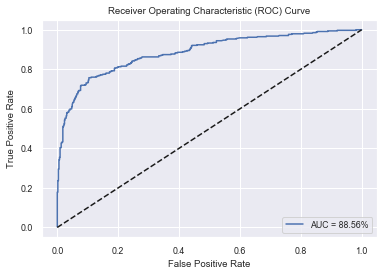

In [84]:
p_lsvc = Pipeline([
        ('scl', StandardScaler()), 
        ('lda', LDA(store_covariance=True)),
        ('clf', LinearSVC(random_state=101))])

# a list of dictionaries to specify the parameters that we'd want to tune
C =  [0.5, 0.3, 0.05, 0.1] #, 1.0, 10.0, 100.0, 1000.0]
tol = [1e-06, 3e-06, 5e-07]
max_iter = [9, 15, 7]

param_grid =\
    [{'clf__loss': ['hinge']
     ,'clf__tol': tol
     ,'clf__C': C
     ,'clf__penalty': ['l2']
     ,'clf__class_weight' : ['balanced'] 
     ,'clf__max_iter' : max_iter
     ,'clf__dual' : [True]
     }
    ,{'clf__loss': ['squared_hinge']
     ,'clf__tol': tol
     ,'clf__C': C
     ,'clf__penalty': ['l2', 'l1']
     ,'clf__class_weight' : ['balanced'] 
     ,'clf__max_iter' : max_iter
     ,'clf__dual' : [False]
     }]

results, lsvc = get_results(p_lsvc, 'LinearSVC', results)

### 5.5. [Gaussian Process Classifier (GPC)](http://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessClassifier.html#sklearn.gaussian_process.GaussianProcessClassifier)
Internally, the Laplace approximation is used for approximating the non-Gaussian posterior by a Gaussian.

Currently, the implementation is restricted to using the logistic link function. For multi-class classification, several binary one-versus rest classifiers are fitted. Note that this class thus does not implement a true multi-class Laplace approximation.

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:   52.9s finished


Mean Best Accuracy: 81.93%
{'clf__max_iter_predict': 10} 

Model Performance metrics:
------------------------------
Accuracy:  83.61% 
Precision: 83.57% 
Recall:    83.61% 
F1 Score:  83.35% 

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          1       0.83      0.72      0.77       342
          0       0.84      0.91      0.87       549

avg / total       0.84      0.84      0.83       891


Prediction Confusion Matrix:
------------------------------
          Predicted:     
                   1    0
Actual: 1        246   96
        0         50  499


              ROC AUC Score: 81.41%


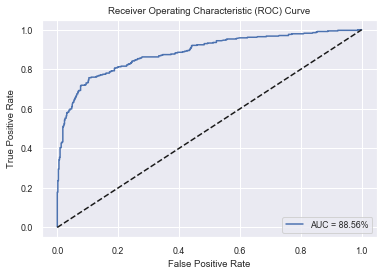

In [85]:
p_gpc = Pipeline([
        ('scl', StandardScaler()), 
        ('lda', LDA(store_covariance=True)),
        ('clf', GaussianProcessClassifier(1.0 * RBF(1.0), random_state=101))])

# max_iter_predict=500, n_restarts_optimizer=5
# a list of dictionaries to specify the parameters that we'd want to tune
max_iter_predict = [5, 10, 15, 20]

param_grid =\
    [{'clf__max_iter_predict':  max_iter_predict
     }]

results, gpc = get_results(p_gpc, 'GaussianProcessClassifier', results)

### 5.6. [Random Forest Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  1.2min
[Parallel(n_jobs=3)]: Done 180 out of 180 | elapsed:  5.1min finished


Mean Best Accuracy: 83.61%
{'clf__class_weight': 'balanced', 'clf__criterion': 'entropy', 'clf__min_impurity_split': 0.07, 'clf__min_samples_split': 5, 'clf__n_estimators': 3000} 

Model Performance metrics:
------------------------------
Accuracy:  95.17% 
Precision: 95.17% 
Recall:    95.17% 
F1 Score:  95.17% 

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          1       0.94      0.93      0.94       342
          0       0.96      0.97      0.96       549

avg / total       0.95      0.95      0.95       891


Prediction Confusion Matrix:
------------------------------
          Predicted:     
                   1    0
Actual: 1        318   24
        0         19  530


              ROC AUC Score: 94.76%


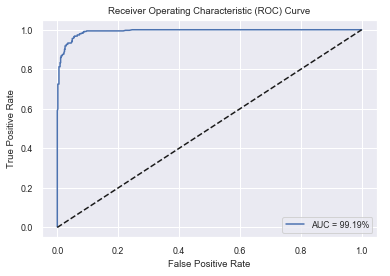

Total features with more than 0.025 of importance: 9


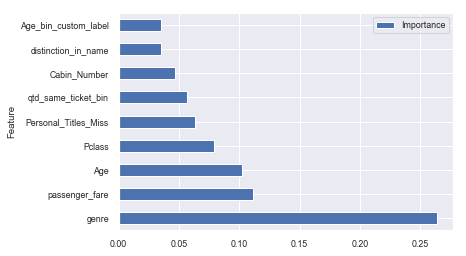

In [86]:
p_rfc = Pipeline([
        ('clf', RandomForestClassifier(random_state=101))])

# a list of dictionaries to specify the parameters that we'd want to tune
param_grid =\
    [{'clf__n_estimators' : [500, 3000]
      ,'clf__criterion': ['gini', 'entropy']
      ,'clf__min_samples_split': [4, 3, 5]
      ,'clf__min_impurity_split': [0.05, 0.03, 0.07]
      #,'clf__max_depth': [5, 10]
      #,'clf__min_impurity_decrease': [0.0003]
      #,'clf__min_samples_leaf': [1,2,3,4]
      ,'clf__class_weight': ['balanced']
      #,'clf__bootstrap': [True, False]
     }]

results, rfc = get_results(p_rfc, 'RandomForestClassifier', results)

cols = train.columns
rf = RandomForestClassifier(n_estimators=13, max_depth=10, random_state=101)
rf = rf.fit(train, y_train)

feature_importances = [(feature, score) for feature, score in zip(cols, rf.feature_importances_)]

sfm = cols[rf.feature_importances_>0.025]
print('Total features with more than 0.025 of importance:',len(sfm))
g = pd.DataFrame(sorted(feature_importances, key=lambda x: -x[1])[:len(sfm)], columns=['Feature','Importance']).\
plot(x='Feature', kind='barh')

### 5.7. [AdaBoost classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier)

Is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

This class implements the algorithm known as AdaBoost-SAMME.

**Parametrs:**

 - ***n_estimators***: The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.

 - ***learning_rate***: Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

 - ***algorithm***: {‘SAMME’, ‘SAMME.R’}. If ‘SAMME.R’ then use the SAMME.R real boosting algorithm. base_estimator must support calculation of class probabilities. If ‘SAMME’ then use the SAMME discrete boosting algorithm. The SAMME.R algorithm typically converges faster than SAMME, achieving a lower test error with fewer boosting iterations.

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   14.5s
[Parallel(n_jobs=3)]: Done 120 out of 120 | elapsed:   39.3s finished


Mean Best Accuracy: 82.04%
{'clf__algorithm': 'SAMME', 'clf__learning_rate': 0.003, 'clf__n_estimators': 300} 

Model Performance metrics:
------------------------------
Accuracy:  84.40% 
Precision: 84.49% 
Recall:    84.40% 
F1 Score:  84.09% 

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          1       0.85      0.72      0.78       342
          0       0.84      0.92      0.88       549

avg / total       0.84      0.84      0.84       891


Prediction Confusion Matrix:
------------------------------
          Predicted:     
                   1    0
Actual: 1        245   97
        0         42  507


              ROC AUC Score: 81.99%


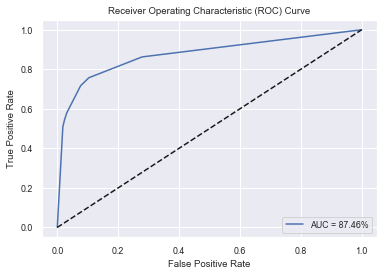

In [87]:
p_AdaB = Pipeline([
        ('scl', StandardScaler()), 
        ('lda', LDA(store_covariance=True)),
        ('clf', AdaBoostClassifier(random_state=101))])
# , max_iter_predict=500, n_restarts_optimizer=5

# a list of dictionaries to specify the parameters that we'd want to tune

param_grid =\
    [{'clf__learning_rate': [3e-03, 15e-02, 5e-02]
     ,'clf__n_estimators': [300, 350, 400, 500] # np.arange(96,115)
     ,'clf__algorithm' : ['SAMME', 'SAMME.R']
     }]

results, AdaB = get_results(p_AdaB, 'AdaBoostClassifier', results)

### 5.8. [K-Nearest Neighbors](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=3)]: Done 115 tasks      | elapsed:    3.8s
[Parallel(n_jobs=3)]: Done 475 out of 480 | elapsed:    9.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done 480 out of 480 | elapsed:    9.0s finished


Mean Best Accuracy: 81.37%
{'clf__algorithm': 'ball_tree', 'clf__leaf_size': 12, 'clf__n_neighbors': 8, 'clf__p': 1, 'clf__weights': 'uniform'} 

Model Performance metrics:
------------------------------
Accuracy:  85.63% 
Precision: 85.72% 
Recall:    85.63% 
F1 Score:  85.38% 

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          1       0.87      0.74      0.80       342
          0       0.85      0.93      0.89       549

avg / total       0.86      0.86      0.85       891


Prediction Confusion Matrix:
------------------------------
          Predicted:     
                   1    0
Actual: 1        253   89
        0         39  510


              ROC AUC Score: 83.44%


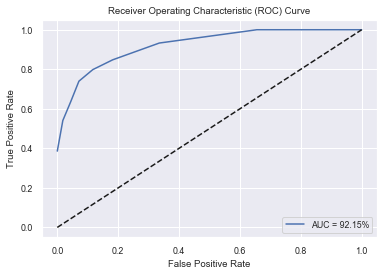

In [88]:
p_KNNC = Pipeline([
        ('scl', StandardScaler()), 
        ('lda', LDA(store_covariance=True)),
        ('clf', KNeighborsClassifier())])

#max_iter_predict=500, n_restarts_optimizer=5
# a list of dictionaries to specify the parameters that we'd want to tune
n_components = [21, 24, 26, 27, 28]
param_grid =\
    [{'clf__n_neighbors': [7, 8, 9] #
     ,'clf__weights': ['uniform', 'distance'] 
     ,'clf__algorithm' : ['ball_tree', 'kd_tree'] # ['auto', 'ball_tree', 'kd_tree', 'brute']
     ,'clf__leaf_size': [12, 15, 16, 20]
     ,'clf__p': [1, 2] 
     }]

results, KNNC = get_results(p_KNNC, 'KNeighborsClassifier', results)

### 5.9.  [Multi-layer Perceptron classifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

This model optimizes the log-loss function using LBFGS or stochastic gradient descent.

MLPClassifier trains iteratively since at each time step the partial derivatives of the loss function with respect to the model parameters are computed to update the parameters.

It can also have a regularization term added to the loss function that shrinks model parameters to prevent overfitting.

This implementation works with data represented as dense numpy arrays or sparse scipy arrays of floating point values.

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=3)]: Done  25 out of  25 | elapsed:  1.6min finished


Mean Best Accuracy: 81.82%
{'clf__alpha': 1e-06, 'clf__batch_size': 64, 'clf__hidden_layer_sizes': (512, 256, 128, 64), 'clf__learning_rate': 'constant', 'clf__learning_rate_init': 0.0003, 'clf__solver': 'sgd', 'clf__tol': 0.0005} 

Model Performance metrics:
------------------------------
Accuracy:  83.50% 
Precision: 83.44% 
Recall:    83.50% 
F1 Score:  83.26% 

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          1       0.83      0.72      0.77       342
          0       0.84      0.91      0.87       549

avg / total       0.83      0.84      0.83       891


Prediction Confusion Matrix:
------------------------------
          Predicted:     
                   1    0
Actual: 1        247   95
        0         52  497


              ROC AUC Score: 81.38%


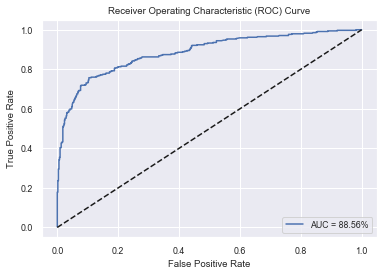

In [89]:
p_mlpc = Pipeline([
        ('scl', StandardScaler()), 
        ('lda', LDA(store_covariance=True)),
        ('clf', MLPClassifier(random_state=101))])

# a list of dictionaries to specify the parameters that we'd want to tune
param_grid =\
    [{#'clf__activation': ['identity', 'logistic', 'tanh', 'relu'],
      'clf__solver': ['adam'] # , 'lbfgs', 'sgd'
     ,'clf__tol': [5e-04] #, 3e-04, 7e-04]
     #,'clf__max_iter': [200, 1000]
     ,'clf__alpha': [1e-06] #, 1e-07, 1e-08] 
     ,'clf__learning_rate_init': [3e-04]
     ,'clf__hidden_layer_sizes': [(512, 256, 128, 64, )]#, (1024, 512, 256, 128, 64, )]
     ,'clf__batch_size': [64]
     ,'clf__epsilon': [1e-08] 
     },
     {'clf__solver': ['sgd'] 
     ,'clf__tol': [5e-04]
     ,'clf__learning_rate_init': [3e-04]
     ,'clf__learning_rate': ['constant', 'adaptive']
     ,'clf__alpha': [1e-06] #, 1e-07, 1e-08] #, 1e-03, 1e-02, 1e-01]
     ,'clf__hidden_layer_sizes': [(512, 256, 128, 64, )]#, (1024, 512, 256, 128, 64, )]
     ,'clf__batch_size': [64]
    },
     {'clf__solver': ['sgd'] 
     ,'clf__tol': [5e-04]
     ,'clf__learning_rate_init': [3e-04]
     ,'clf__learning_rate': ['invscaling']
     ,'clf__power_t' : [ 0.25, 0.5]
     ,'clf__alpha': [1e-06]
     ,'clf__hidden_layer_sizes': [(256, 128, 64, 32, )]
     ,'clf__batch_size': [64]
    }]
    

results, mlpc = get_results(p_mlpc, 'MLPClassifier', results)

### 5.10.  [Gradient Boosting for Classification](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced.

- loss: loss function to be optimized. ‘deviance’ refers to deviance (= logistic regression) for classification with probabilistic outputs. For loss ‘exponential’ gradient boosting recovers the AdaBoost algorithm.

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    4.5s
[Parallel(n_jobs=3)]: Done  60 out of  60 | elapsed:    6.2s finished


Mean Best Accuracy: 82.04%
{'clf__learning_rate': 0.01, 'clf__max_depth': 2, 'clf__n_estimators': 140} 

Model Performance metrics:
------------------------------
Accuracy:  84.40% 
Precision: 84.49% 
Recall:    84.40% 
F1 Score:  84.09% 

Model Classification report:
------------------------------
             precision    recall  f1-score   support

          1       0.85      0.72      0.78       342
          0       0.84      0.92      0.88       549

avg / total       0.84      0.84      0.84       891


Prediction Confusion Matrix:
------------------------------
          Predicted:     
                   1    0
Actual: 1        245   97
        0         42  507


              ROC AUC Score: 81.99%


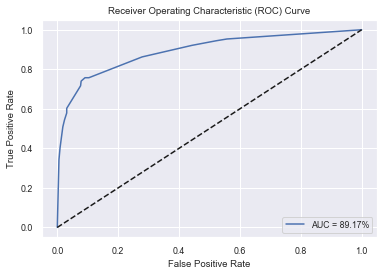

In [90]:
p_gbc = Pipeline([
        ('scl', StandardScaler()), 
        ('lda', LDA(store_covariance=True)),
        ('clf', GradientBoostingClassifier(random_state=101))])  

# a list of dictionaries to specify the parameters that we'd want to tune
#cv=None, dual=False,  scoring=None, refit=True,  multi_class='ovr'
learning_rate =  [1e-02] #, 5e-03, 2e-02]
n_estimators= [140, 150, 160, 145]
max_depth = [2, 3, 5]

param_grid =\
    [{'clf__learning_rate': learning_rate
     ,'clf__max_depth': max_depth
     ,'clf__n_estimators' : n_estimators 
}]

results, GBC = get_results(p_gbc, 'GBC', results)

### 5.11.  [XGBoost (eXtreme Gradient Boosting)](https://xgboost.readthedocs.io/en/latest/)

XGBoost is an advanced implementation of gradient boosting algorithm. It’s a highly sophisticated algorithm, powerful enough to deal with all sorts of irregularities of data.

- Standard GBM implementation has no **regularization** like XGBoost, therefore it also helps to reduce overfitting.
- XGBoost implements **parallel processing** to making a tree using all cores and is blazingly faster as compared to GBM.
- XGBoost also supports implementation on Hadoop.
- **High flexibility**, it allow users to define custom optimization objectives and evaluation criteria.
- XGBoost has an **in-built routine to handle missing values**.
- It make splits upto the max_depth specified and then start **pruning the tree backwards** and remove splits beyond which there is no positive gain.
- Sometimes a split of negative loss say -2 may be followed by a split of positive loss +10. GBM would stop as it encounters -2. But XGBoost will go deeper and it will see a **combined effect** of +8 of the split and keep both.
- XGBoost **allows user to run a cross-validation** at each iteration of the boosting process and thus it is easy to get the exact optimum number of boosting iterations in a single run. Ypu don´t need use grid search.
- User can **start training** an XGBoost model **from** its last iteration of **previous run**. 

The overall parameters have been divided into 3 categories by XGBoost authors, let's see the most importants:
1. General Parameters: Guide the overall functioning:
 - booster: default is gbtree fom ['gbtree', 'gblinear']
<p><p>
2. Booster Parameters: Guide the individual booster (tree/regression) at each step:
 - learning_rate (eta): default is 0.3. Makes the model more robust by shrinking the weights on each step. Typical final values to be used: 0.01-0.2
 - **min_child_weight**: default is 1. Defines the minimum sum of weights of all observations required in a child. Used to control over-fitting. Higher values prevent aover-fitting, but too high values can lead to under-fitting hence, it should be **tuned** using CV.
 - **max_depth**: default is 6. The maximum depth of a tree used to control over-fitting and should be **tuned** using CV. Typical values: 3-10
 - max_leaf_nodes: The maximum number of terminal nodes or leaves in a tree. Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves. If this is defined, GBM will ignore max_depth.
 - **gamma**: default is 0. A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split. Makes the algorithm conservative. **The values can vary depending on the loss function** and should be **tuned**.
 - max_delta_step: default is 0. In maximum delta step we allow each tree’s weight estimation to be. If the value is set to 0, it means there is no constraint. If it is set to a positive value, it can help making the update step more conservative. Usually this parameter is not needed, but **it might help in logistic regression when class is extremely imbalanced**.
 - subsample: default is 1. Denotes the fraction of observations to be randomly samples for each tree. Lower values make the algorithm more conservative and prevents overfitting but too small values might lead to under-fitting. Typical values: 0.5-1
 - colsample_bytree: default is 1. Denotes the fraction of columns to be randomly samples for each tree. Typical values: 0.5-1
 - colsample_bylevel: default is 1. Denotes the subsample ratio of columns for each split, in each level.
 - reg_lambda (lambda): default is 1. L2 regularization term on weights, analogous to Ridge regression, it should be explored to reduce overfitting.
 - reg_alpha (alpha): default is 0. L1 regularization term on weight, analogous to Lasso regression, Can be used in case of very high dimensionality so that the algorithm runs faster when implemented.
 - **scale_pos_weight**: default is 1. A value greater than 0 should be used in case of high class imbalance as it helps in faster convergence. **To balance use** `sum(negative cases)/sum(positive cases)` and Use AUC for evaluation.
<p><p>
3. Learning Task Parameters: These parameters are used to define the optimization objective the metric to be calculated at each step: 
 - objective: default is reg:linear and binary:logistic for XGBClassifier. This defines the loss function to be minimized. Mostly used values are: <p>
       - binary:logistic –logistic regression for binary classification, returns predicted probability (not class)
       - multi:softmax –multiclass classification using the softmax objective, returns predicted class (not probabilities). You also need to set an additional num_class (number of classes) parameter defining the number of unique classes
       - multi:softprob –same as softmax, but returns predicted probability of each data point belonging to each class.
 - eval_metric: The default values are rmse for regression and error for classification. The metric to be used for validation data. Typical values are: 
       - rmse – root mean square error
       - mae – mean absolute error
       - logloss – negative log-likelihood
       - error – Binary classification error rate (0.5 threshold)
       - merror – Multiclass classification error rate
       - mlogloss – Multiclass logloss
       - auc: Area under the curve
seed: The random number seed. Can be used for generating reproducible results and also for parameter tuning.
<p><p>

Before proceeding further, since cgb don't accept categorical let's change it to boolean or intenger, and define a function which will help us create XGBoost models and perform cross-validation. 

In [91]:
def categorical_change_back(df):
    categorical_features = list(df.dtypes[df.dtypes == "category"].index)
    for feat in categorical_features:
        if len(df[feat].unique())==2:
            df[feat] = df[feat].astype(bool)
        else:
            df[feat] = df[feat].astype(int)
    return df

trainXGB = data.loc[data.Survived>=0, cols].copy()
trainXGB = categorical_change_back(trainXGB)
testXGB = data.loc[data.Survived<0, cols].copy()
testXGB = categorical_change_back(testXGB)

In [92]:
def modelfit(alg, train, target, results=None, name='xgb', useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(data=train.values, label=target.values, silent=True) # , feature_names=None, feature_types=None
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, verbose_eval=1)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(train, target,eval_metric='auc')
        
    #Predict training set:
    predictions = alg.predict(train)
    predprob = alg.predict_proba(train)[:,1]
            
    meu.display_model_performance_metrics(true_labels=y_train, predicted_labels=predictions)

    print('\n\n              ROC AUC Score: %.4f' % roc_auc_score(y_true=y_train, y_score=predictions))
    prob = alg.predict_proba(train)
    score_roc = prob[:, prob.shape[1]-1] 
    fpr, tpr, thresholds = roc_curve(y_true=y_train, y_score=score_roc)
    roc_auc = auc(fpr, tpr)
    fig = plt.figure(figsize=(20,7))
    ax = fig.add_subplot(121)
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.4f' % roc_auc)
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.plot([0, 1], [0, 1], 'k--')

    feature_importances = [(score, feature) for score, feature in zip(alg.feature_importances_, cols)]
    feat_imp = pd.DataFrame(sorted(sorted(feature_importances, reverse=True)), columns=['Score', 'Feature'])
    ax = fig.add_subplot(122)
    g = feat_imp.plot(x='Feature', kind='barh', figsize=(20,7), fontsize=14, grid= True, title='Feature Importance Score', ax=ax)
    plt.tight_layout(); plt.show()
    r1 = pd.DataFrame([(name,  np.round(accuracy_score(target.values, predictions), 4),
                        np.round(accuracy_score(target.values, predictions), 4), roc_auc_score(target, predprob), roc_auc)], 
                      columns = ['Model', 'CV Accuracy', 'Acc All', 'ROC AUC Score', 'ROC Area'])
    
    results = pd.concat([results, r1], axis=0)
    return results

General Approach for Parameter Tuning:
- Choose a relatively high learning rate. Generally a learning rate of 0.1 works but somewhere between 0.05 to 0.3 should work for different problems. Determine the optimum number of trees for this learning rate. XGBoost has a very useful function called as “cv” which performs cross-validation at each boosting iteration and thus returns the optimum number of trees required.
- Tune tree-specific parameters ( max_depth, min_child_weight, gamma, subsample, colsample_bytree) for decided learning rate and number of trees. Note that we can choose different parameters to define a tree and I’ll take up an example here.
- Tune regularization parameters (lambda, alpha) for xgboost which can help reduce model complexity and enhance performance.
- Lower the learning rate and decide the optimal parameters .
- Let us look at a more detailed step by step approach.

Step 1: Fix learning rate and number of estimators for tuning tree-based parameters
In order to decide on boosting parameters, we need to set some initial values of other parameters. Lets take the following values:

max_depth = 5 : This should be between 3-10. I’ve started with 5 but you can choose a different number as well. 4-6 can be good starting points.
min_child_weight = 1 : A smaller value is chosen because it is a highly imbalanced class problem and leaf nodes can have smaller size groups.
gamma = 0 : A smaller value like 0.1-0.2 can also be chosen for starting. This will anyways be tuned later.
subsample, colsample_bytree = 0.8 : This is a commonly used used start value. Typical values range between 0.5-0.9.
scale_pos_weight = balance to ((len(y_train)-y_train.sum())/y_train.sum()).
Please note that all the above are just initial estimates and will be tuned later. Lets take the default learning rate of 0.1 here and check the optimum number of trees using cv function of xgboost. The function defined above will do it for us.

[0]	train-auc:0.896896+0.00645932	test-auc:0.85845+0.0128587
[1]	train-auc:0.908245+0.00535889	test-auc:0.870516+0.0132655
[2]	train-auc:0.910588+0.00588233	test-auc:0.870108+0.0128584
[3]	train-auc:0.911991+0.00646244	test-auc:0.870568+0.0157787
[4]	train-auc:0.915335+0.00511028	test-auc:0.87714+0.0176355
[5]	train-auc:0.916289+0.00673477	test-auc:0.87857+0.0208076
[6]	train-auc:0.920241+0.00330635	test-auc:0.878233+0.0230265
[7]	train-auc:0.921159+0.00319979	test-auc:0.879738+0.0221798
[8]	train-auc:0.921779+0.00267326	test-auc:0.880179+0.020463
[9]	train-auc:0.922164+0.00227521	test-auc:0.879809+0.0203369
[10]	train-auc:0.922168+0.00249051	test-auc:0.879912+0.0199788
[11]	train-auc:0.924161+0.00270347	test-auc:0.880131+0.0204688
[12]	train-auc:0.92502+0.00278851	test-auc:0.879566+0.0219315
[13]	train-auc:0.925439+0.00261775	test-auc:0.878488+0.0218302
[14]	train-auc:0.926192+0.00272048	test-auc:0.87841+0.0206886
[15]	train-auc:0.926322+0.00267791	test-auc:0.877928+0.0208931
[16]	tra

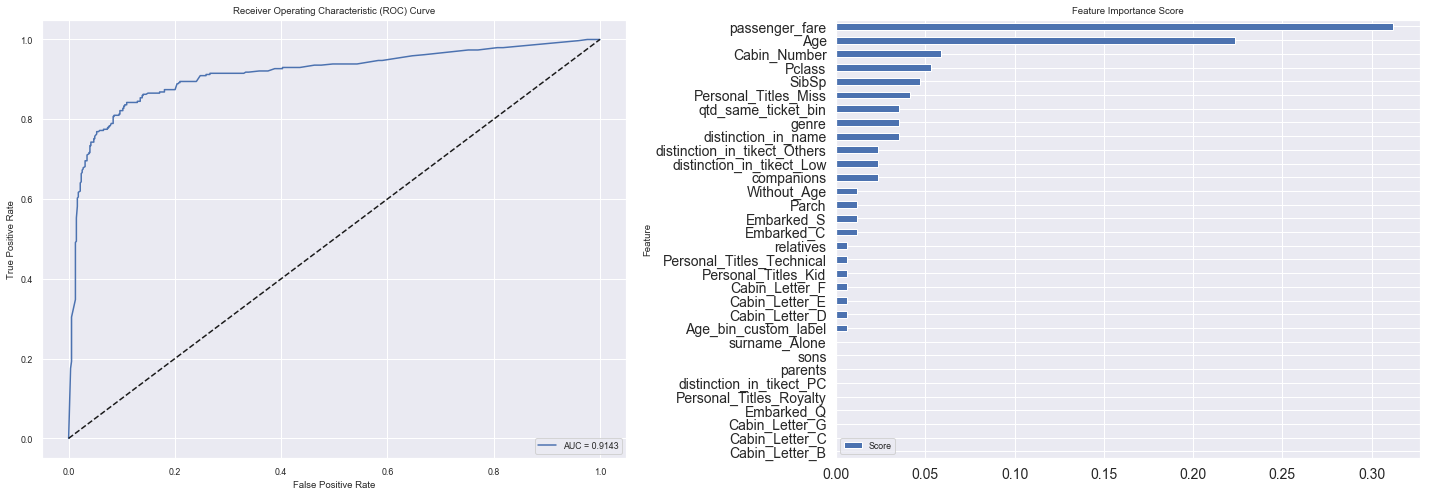

In [93]:
scale = ((len(y_train)-y_train.sum())/y_train.sum())

xgb1 = XGBClassifier(learning_rate =0.04, n_estimators=176, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8,
                     colsample_bytree=0.8, objective= 'binary:logistic', importance_type='gain', n_jobs=3,
                     scale_pos_weight=scale, seed=101, random_state=101)

results = modelfit(xgb1, trainXGB, y_train, results)

As you can see that here we got 58 as the optimal estimators for 0.04 learning rate.

Step 2: Tune max_depth and min_child_weight
We tune these first as they will have the highest impact on model outcome. To start with, let’s set wider ranges and then we will perform another iteration for smaller ranges.

In [94]:
param_test1 = {
 'max_depth': [5, 8, 9, 10],
 'min_child_weight':range(1,10),
 'gamma': [0, 1, 0.5]
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.04, n_estimators=58, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, importance_type='gain',
 objective= 'binary:logistic', n_jobs=4, scale_pos_weight=scale, seed=101, random_state=101), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch1.fit(trainXGB,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.86848, std: 0.03436, params: {'gamma': 0, 'max_depth': 5, 'min_child_weight': 1},
  mean: 0.87093, std: 0.03464, params: {'gamma': 0, 'max_depth': 5, 'min_child_weight': 2},
  mean: 0.86823, std: 0.03318, params: {'gamma': 0, 'max_depth': 5, 'min_child_weight': 3},
  mean: 0.86623, std: 0.03062, params: {'gamma': 0, 'max_depth': 5, 'min_child_weight': 4},
  mean: 0.86317, std: 0.02966, params: {'gamma': 0, 'max_depth': 5, 'min_child_weight': 5},
  mean: 0.86474, std: 0.02781, params: {'gamma': 0, 'max_depth': 5, 'min_child_weight': 6},
  mean: 0.86364, std: 0.02807, params: {'gamma': 0, 'max_depth': 5, 'min_child_weight': 7},
  mean: 0.86092, std: 0.02828, params: {'gamma': 0, 'max_depth': 5, 'min_child_weight': 8},
  mean: 0.85830, std: 0.02764, params: {'gamma': 0, 'max_depth': 5, 'min_child_weight': 9},
  mean: 0.87239, std: 0.03565, params: {'gamma': 0, 'max_depth': 8, 'min_child_weight': 1},
  mean: 0.87698, std: 0.03483, params: {'gamma': 0, 'max_depth': 8, 'min_child_w

Step 4: Tune subsample and colsample_bytree
The next step would be try different subsample and colsample_bytree values. Lets do this in 2 stages as well and take values 0.6,0.7,0.8,0.9 for both to start with.

In [95]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.04, n_estimators=58, max_depth=8,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8, importance_type='gain',
 objective= 'binary:logistic', n_jobs=4, scale_pos_weight=scale, seed=101, random_state=101), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch4.fit(trainXGB,y_train)

gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.87498, std: 0.03231, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: 0.87630, std: 0.03348, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: 0.87423, std: 0.03524, params: {'colsample_bytree': 0.6, 'subsample': 0.8},
  mean: 0.87340, std: 0.03621, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: 0.87477, std: 0.03175, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: 0.87531, std: 0.03297, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: 0.87444, std: 0.03727, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: 0.87023, std: 0.03878, params: {'colsample_bytree': 0.7, 'subsample': 0.9},
  mean: 0.87619, std: 0.03352, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: 0.87458, std: 0.03456, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: 0.87698, std: 0.03483, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: 0.86746, std: 0.03730, params: {'colsample_bytree': 0.8, 'subsample'

Here, we found 0.8 as the optimum value for both subsample and colsample_bytree.

Step 5: Tuning Regularization Parameters
Next step is to apply regularization to reduce overfitting. Though many people don’t use this parameters much as gamma provides a substantial way of controlling complexity. But we should always try it. I’ll tune ‘reg_alpha’ value here and leave it upto you to try different values of ‘reg_lambda’.

In [96]:
param_test6 = { 'reg_alpha':[4e-4, 3e-4, 2e-4, 1e-5, 5e-5] }

gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.04, n_estimators=58, max_depth=8,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8, importance_type='gain',
 objective= 'binary:logistic', n_jobs=4, scale_pos_weight=scale, seed=101, random_state=101), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch6.fit(trainXGB,y_train)

gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: 0.87698, std: 0.03490, params: {'reg_alpha': 0.0004},
  mean: 0.87695, std: 0.03487, params: {'reg_alpha': 0.0003},
  mean: 0.87695, std: 0.03487, params: {'reg_alpha': 0.0002},
  mean: 0.87698, std: 0.03483, params: {'reg_alpha': 1e-05},
  mean: 0.87698, std: 0.03483, params: {'reg_alpha': 5e-05}],
 {'reg_alpha': 0.0004},
 0.876980573822886)

[0]	train-auc:0.902153+0.00321345	test-auc:0.864479+0.0161005
[1]	train-auc:0.915644+0.00630403	test-auc:0.872786+0.0223994
[2]	train-auc:0.923144+0.00665788	test-auc:0.87554+0.0198408
[3]	train-auc:0.924826+0.00466881	test-auc:0.875371+0.019695
[4]	train-auc:0.927783+0.00275563	test-auc:0.880377+0.0216931
[5]	train-auc:0.928107+0.0035876	test-auc:0.878014+0.0204835
[6]	train-auc:0.932713+0.00252344	test-auc:0.880207+0.0244452
[7]	train-auc:0.933377+0.00323669	test-auc:0.879145+0.023115
[8]	train-auc:0.933705+0.00359159	test-auc:0.880292+0.0231834
[9]	train-auc:0.934555+0.00358426	test-auc:0.881788+0.0208576
[10]	train-auc:0.934502+0.00382076	test-auc:0.8808+0.0190906
[11]	train-auc:0.934482+0.00363877	test-auc:0.881606+0.017697
[12]	train-auc:0.935547+0.00238404	test-auc:0.879822+0.0179559
[13]	train-auc:0.935934+0.00196495	test-auc:0.880676+0.0172856
[14]	train-auc:0.936322+0.00135957	test-auc:0.882041+0.0187225
[15]	train-auc:0.936782+0.00138042	test-auc:0.882519+0.0193374
[16]	trai

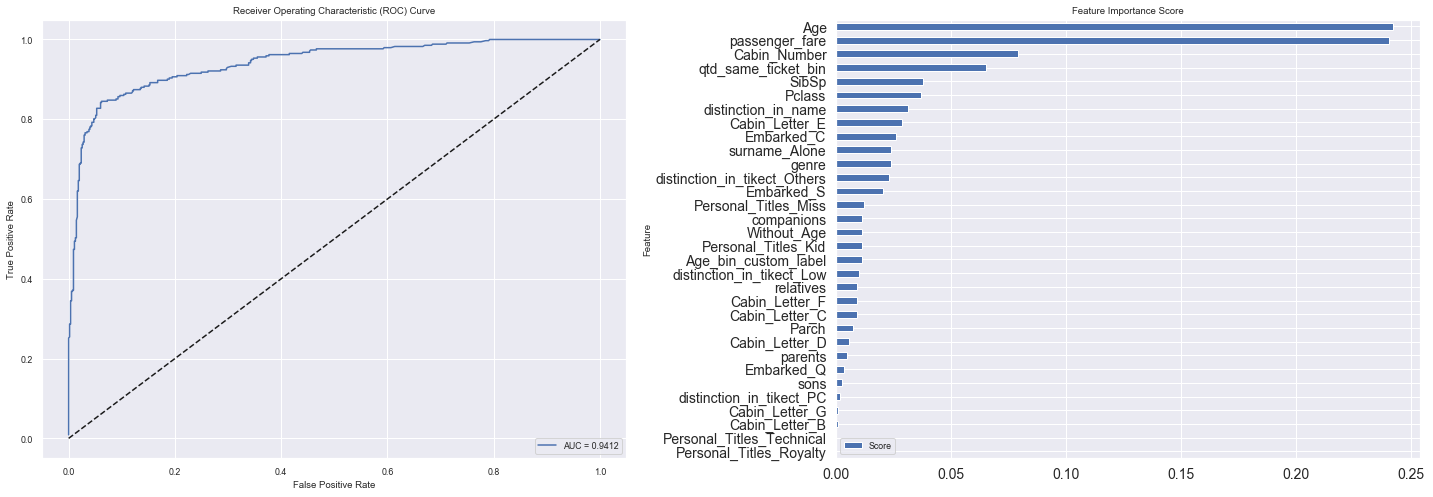

In [97]:
#predictors = [x for x in train.columns if x not in [target, IDcol]]
scale = ((len(y_train)-y_train.sum())/y_train.sum())
xgbF = XGBClassifier(learning_rate =0.01, n_estimators=2000, max_depth=8, min_child_weight=2, gamma=0, subsample=0.8,
                     colsample_bytree=0.8, objective= 'binary:logistic', importance_type='gain', reg_alpha = 0.0004,
                     n_jobs=4, scale_pos_weight=scale, seed=101, random_state=101)
results = modelfit(xgbF, trainXGB, y_train, results, name='xgbF')

## 6. Finalize The Model: Stacking the Models

### 6.1. Validation Function

In [98]:
n_folds = 10

def cvscore(model):
    kf = KFold(n_folds, shuffle=True, random_state=101).get_n_splits(train.values)
    score= cross_val_score(estimator=model, X=train.values, y=y_train, scoring="accuracy", verbose=1, n_jobs=3, cv = kf)
    return(score)

### 6.2. Check the best results from the models hiperparametrization 

In [99]:
display(results.sort_values(by='CV Accuracy', ascending=False))

,Acc All,CV Accuracy,Model,Prob,ROC AUC Score,ROC Area
0,0.8956,0.895600,xgbF,NaN,0.941150,0.941150
0,0.8709,0.870900,xgb,NaN,0.914334,0.914334
0,0.9517,0.836139,RandomForestClassifier,True,0.947608,0.991907
0,0.8440,0.820426,AdaBoostClassifier,True,0.819936,0.874605
0,0.8440,0.820426,GBC,True,0.819936,0.891658
0,0.8047,0.819304,svm,False,0.805699,0.885616
0,0.8361,0.819304,GaussianProcessClassifier,True,0.814112,0.885595
0,0.8350,0.818182,MLPClassifier,True,0.813752,0.885616
0,0.8092,0.814815,LR,True,0.805484,0.885616
0,0.8563,0.813692,KNeighborsClassifier,True,0.834364,0.921489


### 6.3. Make Voting Classifier:
Create an ensemble model by voting with models without probabilities output.

In [105]:
staked_v = VotingClassifier(estimators=[('lsvc', lsvc.best_estimator_), ('svm', svm.best_estimator_), ], voting='hard')
staked_v.fit(train.values, y_train) 
score = cvscore(staked_v)
print('Mean score for Voting:',score.mean())

stacked_v_train_pred = staked_v.predict(train)
print('Accuracy score: {:.6%}'.format(staked_v.score(train, y_train)))

stacked_v_pred = staked_v.predict(test)

# Preper Submission File of Voting Classifier
ensemble = stacked_v_pred *1
submit = pd.DataFrame()
submit['PassengerId'] = Test_ID
submit['Survived'] = ensemble
# ----------------------------- Create File to Submit --------------------------------
submit.to_csv('Titanic_Voting_submission.csv', index = False)
print('Sample of Voting Submit:')
display(submit.head())

Mean score for Voting: 0.8036783565997048
Accuracy score: 81.705948%
Sample of Voting Submit:


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    2.1s finished


,PassengerId,Survived
891,892,0
892,893,1
893,894,0
894,895,0
895,896,1


### 6.4. Make Staked Classifier:
Create an ensemble model by staked models with mean probabilities.

In [122]:
models = (xgbF, rfc.best_estimator_, GBC.best_estimator_, AdaB.best_estimator_,
          mlpc.best_estimator_, gpc.best_estimator_, lr.best_estimator_, KNNC.best_estimator_ )

trained_models = []
for model in models:
    #model.fit(train, targets) models all ready fited
    trained_models.append(model)

predictions = []
for i, model in enumerate(trained_models):
    if i < 1:
         predictions.append(model.predict_proba(testXGB)[:, 1])
    else:
        predictions.append(model.predict_proba(test)[:, 1])

# Preper Submission File of Probabilities Classifier
predictions_df = pd.DataFrame(predictions).T

ensemble = predictions_df.mean(axis=1).map(lambda s: 1 if s >= 0.5 else 0)
submit = pd.DataFrame()
submit['PassengerId'] = Test_ID.values
submit['Survived'] = ensemble

# ----------------------------- Create File to Submit --------------------------------
submit.to_csv('Titanic_Probabilities_submission.csv', index = False)
print('Sample of Probabilities Submit:')
display(submit.head())

Sample of Probabilities Submit:


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## 9. Conclusion:

As you saw from the results of the models, ...

This is a interesting case to training techniques, because it is not easy to obtain a high score without risk of some overfitting, since it really have some cases wheres too specifique. If you try submit to the competition, you discover that you can find some models that have high score, and you use cross validation and take other actions to dealing with overfitting, but your score is worse than other with minor score that you had submitted. Don't give up!

For next steps, you can try:
- Use other features selection results
- Include the feature selection on the pipeline
- Try other models like Tensorflow
- Try others configurations of stacked models (Voting or Mean Probabilities)
- Not apply boxcox1p on discret data, or apply on all numeric but before the selection features
- Create others features and make other transformations